# Data Overview

In [1]:
import pandas as pd
dftr = pd.read_csv('Train/train_action_history.csv')
dftrcd = pd.read_csv('Train/train_cdna_data.csv')
dfte = pd.read_csv('Test/test_action_history.csv')
dftecd = pd.read_csv('Test/test_cdna_data.csv')
dfev = pd.read_csv('Test/test_customers.csv')

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_23949/1239050725.py:3: DtypeWarning: Columns (7,12,13,15,16,17,18,19,29,37,45,46,47,56,58,66,69,71,74,228) have mixed types. Specify dtype option on import or set low_memory=False.
  dftrcd = pd.read_csv('Train/train_cdna_data.csv')
/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_23949/1239050725.py:5: DtypeWarning: Columns (15,16,17,18,19,45,46,47,56,58,71,228) have mixed types. Specify dtype option on import or set low_memory=False.
  dftecd = pd.read_csv('Test/test_cdna_data.csv')


In [2]:
l1 = set(list(dftr['customer_code']))
l1cd = set(list(dftrcd['CUSTOMER_CODE'].unique()))
l2 = set(list(dfte['customer_code'].unique()))
l2cd = set(list(dftecd['CUSTOMER_CODE'].unique()))
evcd = set(list(dfev['CUSTOMER_CODE'].unique()))

In [44]:
len(evcd - l2cd.intersection(evcd))  #Cold Start Customers

526

In [32]:
#Convert timestamps to slots

from datetime import datetime
def get_slot(timestamp):
    # Extract day of the week (Monday=0, Sunday=6)
    day_of_week = timestamp.weekday()
    
    # Extract hour
    hour = timestamp.hour
    
    # Determine the time slot for the day
    if 9 <= hour < 12:
        slot_of_the_day = 1
    elif 12 <= hour < 15:
        slot_of_the_day = 2
    elif 15 <= hour < 18:
        slot_of_the_day = 3
    elif 18 <= hour < 21:
        slot_of_the_day = 4
    else:
        return None  # Outside defined time slots
    
    # Compute overall slot index
    overall_slot = (day_of_week * 4) + slot_of_the_day
    return overall_slot

# Apply the function to create the slot column
dftr['send_timestamp'] = pd.to_datetime(dftr['send_timestamp'])
dftr['open_timestamp'] = pd.to_datetime(dftr['open_timestamp'])
dftr['send_slot'] = dftr['send_timestamp'].apply(get_slot)
dftr['open_slot'] = dftr['open_timestamp'].apply(get_slot)

# Display the resulting DataFrame
dftr

,customer_code,Offer_id,Offer_subid,batch_id,product_category,product_sub_category,send_timestamp,open_timestamp,send_slot,open_slot
0,00199d3467a7191db5bfa4e5f9a62eeb96fb0b602c3ec5...,AC_100044882,VR_200098111,70000078,CC_ACQ_SECURED,SECURED_ACQ,2024-10-22 17:35:27+00:00,NaT,7.0,NaN
1,001f2abab1bccc25d00bba68fea57a81cab1c76d485515...,AC_100048426,VR_200108485,10000253,SIP / MF,ACQUISITION,2024-08-09 18:20:18+00:00,NaT,20.0,NaN
2,00298fc11fb6924004c041f141f92c3c74e209d9a737d9...,AC_100052603,VR_200127708,70000074,CC_INORGANIC,EMI,2024-09-20 10:45:20+00:00,2024-09-20 10:45:31+00:00,17.0,17.0
3,0038a46221c0175fc8938ebc8aef8d0f83b3ac1ad84662...,AC_100047006,VR_200105035,70000072,CC_ACQ_SECURED,SECURED_ACQ,2024-09-06 12:37:16+00:00,NaT,18.0,NaN
4,00409395a831af7fd41d0ec70a5be3bda13d64cb3e4be9...,AC_100046122,VR_200100845,10000246,RURAL,BALANCE BUILD UP,2024-06-23 11:03:13+00:00,NaT,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...
8797906,ffbb0f79f0b56f62675e2016f9a11073be3ca5ae6be72d...,AC_100046183,VR_200104587,70000074,CC_UPGRADE,UPI,2024-09-19 12:01:21+00:00,2024-09-19 17:46:10+00:00,14.0,15.0
8797907,ffc6625f95b58a9630a15ca4986bbf0ae64b2924de057d...,AC_100049404,VR_200114038,70000058,CC_INORGANIC,MERCHANT_EMI,2024-06-07 12:46:17+00:00,2024-06-07 21:14:38+00:00,18.0,NaN
8797908,ffc9a211ad7a2f349a6382197ad5b68b8a6c4f53ed0632...,AC_100032341,VR_200074702,50074776,PL X-SELL,ACEPL,2024-08-02 11:41:57+00:00,NaT,17.0,NaN
8797909,ffd2dea5044a994e3403afbf9717ffec6b643162021084...,AC_100051373,VR_200121627,10000254,SIP / MF,ACQUISITION,2024-08-17 11:19:41+00:00,2024-08-17 16:01:53+00:00,21.0,23.0


In [50]:
dftrcd['CUSTOMER_CODE'].value_counts().value_counts() #No of occurrences of datapoints for each customer in train - corresponding to monthly updated data

count
6    207184
5      3978
2      3750
3      2210
1      2010
4      1567
Name: count, dtype: int64

In [51]:
dftecd['CUSTOMER_CODE'].value_counts().value_counts() #No of occurrences of datapoints for each customer in test

count
1    68450
Name: count, dtype: int64

In [54]:
dftecd

,CUSTOMER_CODE,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v294,v295,v296,v297,v298,v299,v300,v301,v302,batch_date
0,635c3a7b6c89528607944fa312096e48c9f54dfaf821f5...,40-44,NaN,NaN,99,THANE,99999,NaN,INDIA,IN,...,250,107,267,213,136,334,227,233,309,2024-11-29
1,970ef77e5a753f82ed9ee1e4446db1dd29d237ed0f64c7...,40-44,NaN,NaN,99,KOLKATA,99999,NaN,INDIA,IN,...,250,107,267,213,136,334,227,233,309,2024-11-29
2,ccc36bb7c74601863c7328faa90ade2d806bccea2a3c51...,35-39,NaN,NaN,99,KOLAR,95013,NaN,INDIA,IN,...,250,107,267,213,136,334,227,233,309,2024-11-29
3,3c34d39288675fb3033d5f24bfccf427f1ee97e8c4bbb3...,30-34,NaN,NaN,ZZ,BUNDI,ZZ,NaN,INDIA,IN,...,250,107,267,213,136,334,227,233,309,2024-11-29
4,cb353c7e0419b7b9194979ba250e0dfd1fa19a41b01cb1...,25-29,NaN,NaN,99,HAPUR,95013,NaN,INDIA,IN,...,250,107,267,213,136,334,227,233,309,2024-11-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68445,4cde59d5b42a2d221037cb2fca0de4b017b92486881c72...,35-39,NaN,NaN,99,RAIGAD,99999,NaN,India,IN,...,250,107,267,213,136,334,227,233,309,2024-11-29
68446,537705bf6fab6b290248264b5b34cc3f59352740d98964...,40-44,NaN,NaN,99,BARPETA,99999,NaN,INDIA,IN,...,250,107,267,213,136,334,227,233,309,2024-11-29
68447,48d22d3e52065cb6d54e1b88ec4d5a41b99f19be0427a2...,20-24,NaN,NaN,99,GHAZIABAD,95013,NaN,INDIA,IN,...,250,107,267,213,136,334,227,233,309,2024-11-29
68448,5d8e50df07ecaeb2da40b588aab824e9d33a705e005a2b...,45-49,NaN,NaN,99,SURAT,95013,NaN,INDIA,IN,...,250,107,267,213,136,334,227,233,309,2024-11-29


In [61]:
train_customers = list(set(list(dftr['customer_code'].values))) #all unique customers in train

# Data Cleaning

In [3]:
file_path = 'train_cdna_data.csv'

try:
  dfcd = pd.read_csv(file_path)
  print("File imported successfully!")
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
  print(f"Error: Could not parse the CSV file at {file_path}")
  print("Please check the file's format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

/var/folders/33/nkg26qs951n84mllpxnq71hm0000gn/T/ipykernel_35517/100862135.py:4: DtypeWarning: Columns (7,12,13,15,16,17,18,19,29,37,45,46,47,56,58,66,69,71,74,228) have mixed types. Specify dtype option on import or set low_memory=False.
  dfcd = pd.read_csv(file_path)


File imported successfully!


In [4]:
file_path = 'train_action_history.csv'

try:
  dfah = pd.read_csv(file_path)
  print("File imported successfully!")
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
  print(f"Error: Could not parse the CSV file at {file_path}")
  print("Please check the file's format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

File imported successfully!


In [5]:
dfah.shape

(8797911, 8)

In [6]:
dfcd.shape

(1285402, 303)

In [7]:
dfah.head()

,customer_code,Offer_id,Offer_subid,batch_id,product_category,product_sub_category,send_timestamp,open_timestamp
0,00199d3467a7191db5bfa4e5f9a62eeb96fb0b602c3ec5...,AC_100044882,VR_200098111,70000078,CC_ACQ_SECURED,SECURED_ACQ,2024-10-22T17:35:27.000Z,NaN
1,001f2abab1bccc25d00bba68fea57a81cab1c76d485515...,AC_100048426,VR_200108485,10000253,SIP / MF,ACQUISITION,2024-08-09T18:20:18.000Z,NaN
2,00298fc11fb6924004c041f141f92c3c74e209d9a737d9...,AC_100052603,VR_200127708,70000074,CC_INORGANIC,EMI,2024-09-20T10:45:20.000Z,2024-09-20T10:45:31.000Z
3,0038a46221c0175fc8938ebc8aef8d0f83b3ac1ad84662...,AC_100047006,VR_200105035,70000072,CC_ACQ_SECURED,SECURED_ACQ,2024-09-06T12:37:16.000Z,NaN
4,00409395a831af7fd41d0ec70a5be3bda13d64cb3e4be9...,AC_100046122,VR_200100845,10000246,RURAL,BALANCE BUILD UP,2024-06-23T11:03:13.000Z,NaN


In [8]:
dfcd.head()

,CUSTOMER_CODE,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v294,v295,v296,v297,v298,v299,v300,v301,v302,batch_date
0,ab617a6a0a8582f4aaa1aeda38fd73377cb911e6096a98...,50-54,NaN,NaN,99,THANE,99999,NaN,INDIA,IN,...,187,44,204,150,73,271,164,170,246,2024-09-27
1,6e8e3227297409f3f33578400302825263cadc2ed0d1a0...,35-39,NaN,NaN,ZZ,Pune,ZZ,NaN,INDIA,411,...,187,44,204,150,73,271,164,170,246,2024-09-27
2,1b42f270aba756b64d7ae4e2409313097b0c91f7c2f2c7...,20-24,NaN,NaN,99,BHIWANI,95013,NaN,INDIA,IN,...,187,44,204,150,73,271,164,170,246,2024-09-27
3,06a4aae9b531a518260c7d0d88811cc202fd0d3e46d9ea...,20-24,NaN,NaN,NaN,CHIKMAGALUR,NaN,NaN,INDIA,NaN,...,187,44,204,150,73,271,164,170,246,2024-09-27
4,0e4fa92b7a41dc019c9f40457e180e94ca60d0b5c7128e...,30-34,NaN,NaN,NaN,NASIK,NaN,NaN,INDIA,NaN,...,187,44,204,150,73,271,164,170,246,2024-09-27


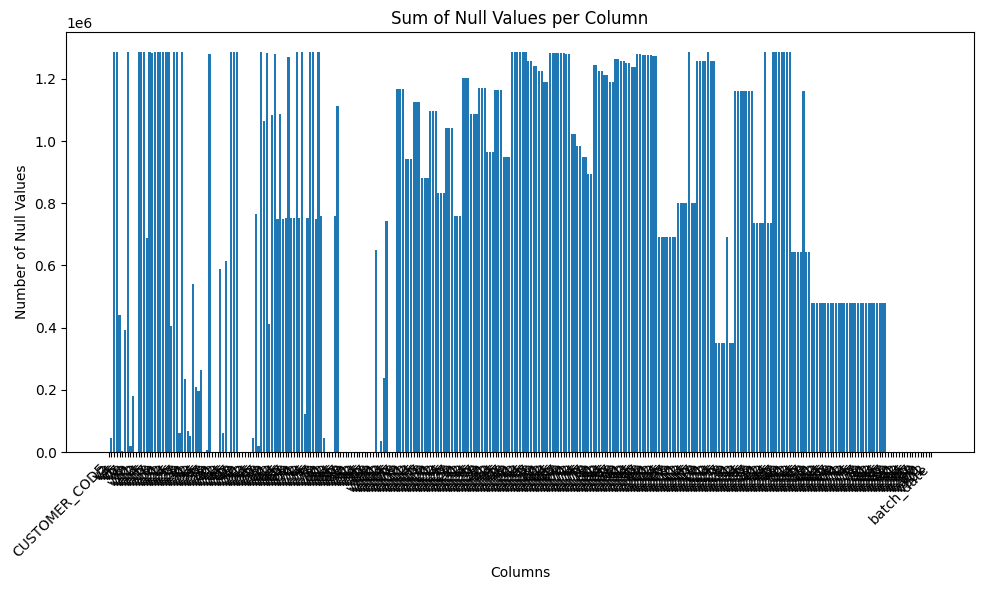

In [9]:
# prompt: make a graph to show sum of all null values in a column for all columns in dfcd

import pandas as pd
import matplotlib.pyplot as plt

# Assuming dfcd is your DataFrame
# Replace dfcd with your actual DataFrame name

# Calculate the sum of null values for each column
null_counts = dfcd.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(null_counts.index, null_counts.values)
plt.xlabel("Columns")
plt.ylabel("Number of Null Values")
plt.title("Sum of Null Values per Column")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [10]:
# prompt: show columns with all null values 

# Identify columns with all null values
all_null_cols = dfcd.columns[dfcd.isnull().all()]

# Print the columns with all null values
print("Columns with all null values:")
len(all_null_cols)

Columns with all null values:


25

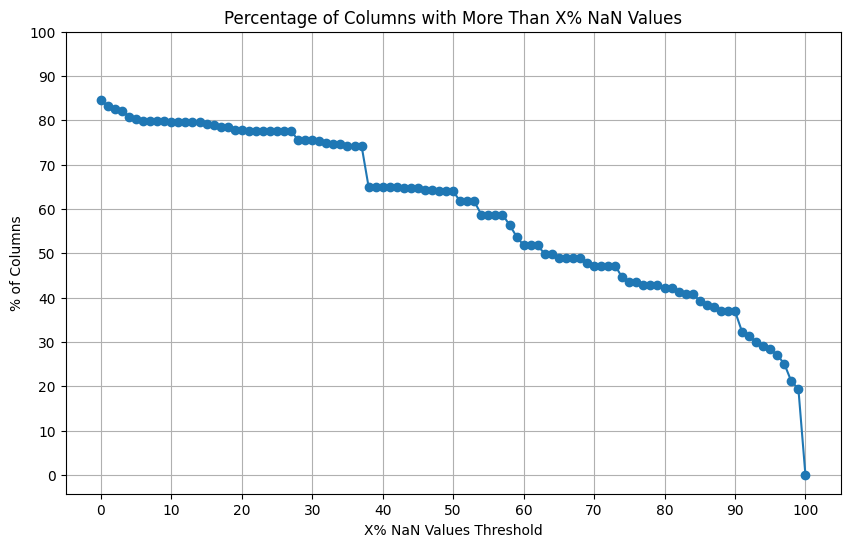

In [11]:
# prompt: prompt: make a graph. x axis has 0 - 100 and y axis has % of columns that have more than X% nan values

# Calculate the percentage of NaN values for each column
nan_percentages = dfcd.isna().sum() / len(dfcd) * 100

# Generate x values (0-100)
x_values = np.arange(0, 101, 1)

# Calculate y values (percentage of columns with more than x% NaN values)
y_values = []
for x in x_values:
    y_values.append(len(nan_percentages[nan_percentages > x]) / len(nan_percentages) * 100)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Customize the plot
plt.title('Percentage of Columns with More Than X% NaN Values')
plt.xlabel('X% NaN Values Threshold')
plt.ylabel('% of Columns')
plt.grid(True)
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 101, 10))


# Show the plot
plt.show()

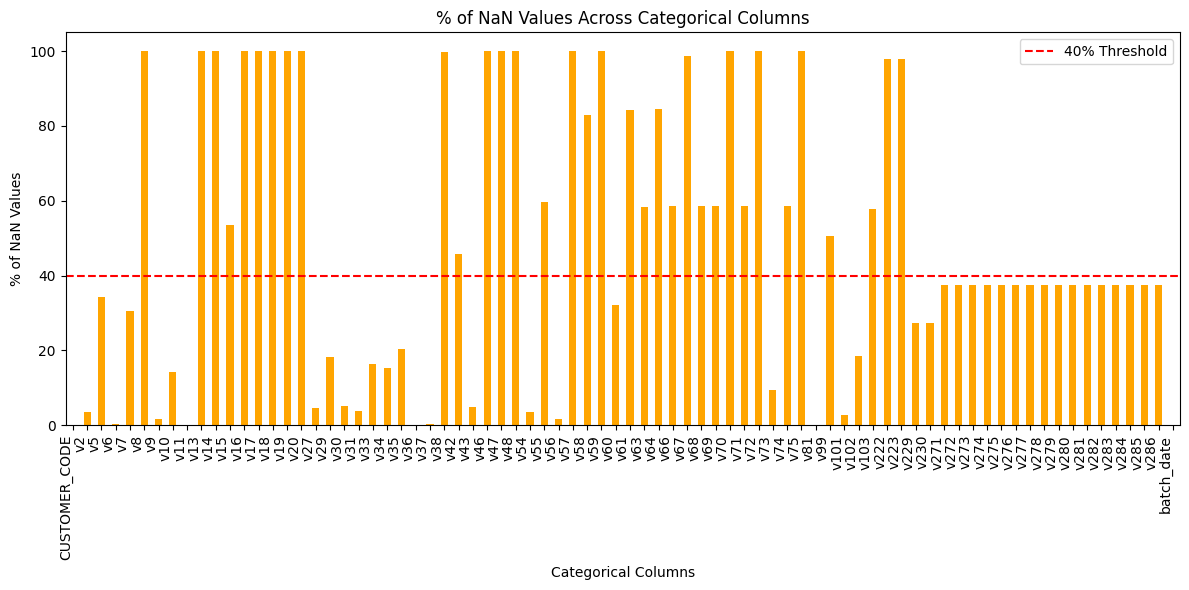

In [12]:
# prompt: in dfcd, show plot of % of nan values across categorical columns. draw a line at 40%

import matplotlib.pyplot as plt

# Assuming dfcd is your DataFrame
# Calculate the percentage of NaN values for each categorical column
categorical_cols = dfcd.select_dtypes(include=['object', 'category']).columns
nan_percentages = dfcd[categorical_cols].isna().sum() / len(dfcd) * 100

# Create the plot
plt.figure(figsize=(12, 6))
nan_percentages.plot(kind='bar', color = 'orange')
plt.axhline(y=40, color='r', linestyle='--', label='40% Threshold')
plt.xlabel('Categorical Columns')
plt.ylabel('% of NaN Values')
plt.title('% of NaN Values Across Categorical Columns')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

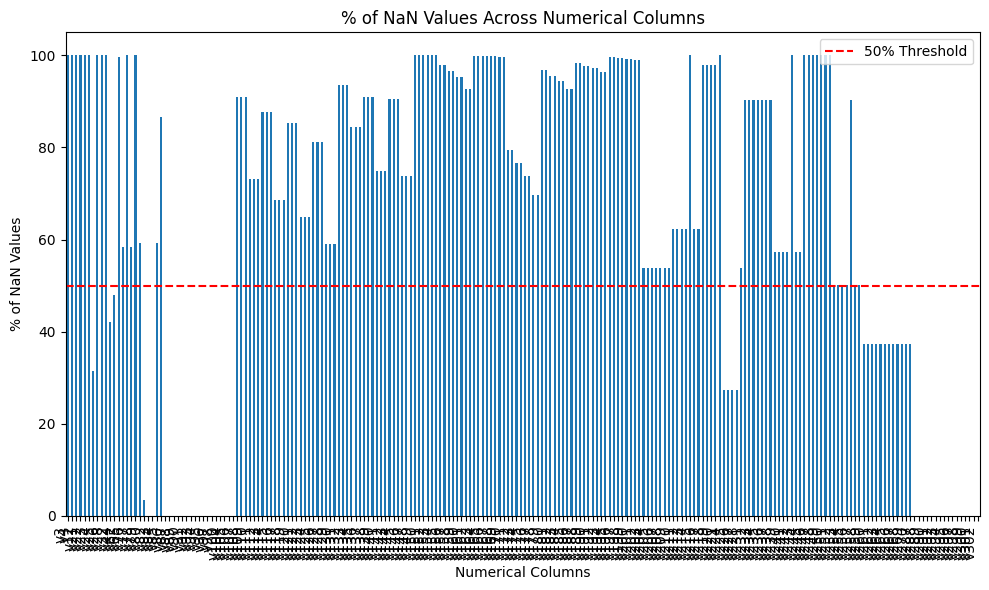

In [13]:
# prompt: in dfcd, show plot of % of nan values acrss numerical columns. draw a line at 50%

import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame
# Calculate the percentage of NaN values for each numerical column
numerical_cols = dfcd.select_dtypes(include=['number'])
nan_percentages = numerical_cols.isna().sum() / len(dfcd) * 100

# Create the plot
plt.figure(figsize=(10, 6))
nan_percentages.plot(kind='bar')
plt.axhline(y=50, color='r', linestyle='--', label='50% Threshold')
plt.xlabel("Numerical Columns")
plt.ylabel("% of NaN Values")
plt.title("% of NaN Values Across Numerical Columns")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# prompt: in dfcd remove numerical columns having more than 50% nan values, categorical columns having more than 40% nan values. Show me how many columns removed from both.

# Identify numerical and categorical columns
numerical_cols = dfcd.select_dtypes(include=['number']).columns
categorical_cols = dfcd.select_dtypes(exclude=['number']).columns

# Calculate NaN percentages for numerical columns
numerical_nan_percentages = dfcd[numerical_cols].isna().sum() / len(dfcd) * 100

# Identify numerical columns to remove
numerical_cols_to_remove = numerical_nan_percentages[numerical_nan_percentages > 50].index

# Calculate NaN percentages for categorical columns
categorical_nan_percentages = dfcd[categorical_cols].isna().sum() / len(dfcd) * 100

# Identify categorical columns to remove
categorical_cols_to_remove = categorical_nan_percentages[categorical_nan_percentages > 40].index

# Remove the identified columns
dfcd = dfcd.drop(columns=numerical_cols_to_remove.union(categorical_cols_to_remove))

# Print the number of removed columns
print(f"Number of numerical columns removed: {len(numerical_cols_to_remove)}")
print(f"Number of categorical columns removed: {len(categorical_cols_to_remove)}")

Number of numerical columns removed: 161
Number of categorical columns removed: 34


In [15]:
dfcd.shape

(1285402, 108)

In [16]:
import pandas as pd
import numpy as np

def remove_highly_correlated_columns(df, correlation_threshold=0.9):
    """
    Removes one column from each highly correlated pair based on the percentage of NaN values.

    Parameters:
        df (pd.DataFrame): The input dataframe with numeric and non-numeric columns.
        correlation_threshold (float): The correlation value above which columns are considered highly correlated.

    Returns:
        pd.DataFrame: A dataframe with highly correlated columns removed.
        list: A list of removed columns.
    """
    # Select numeric columns only
    df_numeric = df.select_dtypes(include=['number'])
    
    # Compute correlation matrix
    correlation_matrix = df_numeric.corr()
    
    # Extract upper triangle to avoid duplicate pairs
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Find column pairs with correlation above the threshold
    correlated_pairs = [(col, row) for col in upper_tri.columns for row in upper_tri.index if abs(upper_tri.at[row, col]) > correlation_threshold]

    # Track columns to be removed
    to_drop = set()
    
    for col1, col2 in correlated_pairs:
        # Calculate NaN percentages for both columns
        nan_percentage_col1 = df[col1].isna().mean()
        nan_percentage_col2 = df[col2].isna().mean()
        
        # Drop the column with higher NaN percentage
        if nan_percentage_col1 > nan_percentage_col2:
            to_drop.add(col1)
        else:
            to_drop.add(col2)

    print(f"Columns dropped due to high correlation: {to_drop}")

    return list(to_drop)

# Example usage
removed_columns = remove_highly_correlated_columns(dfcd, correlation_threshold=0.9)



Columns dropped due to high correlation: {'v297', 'v293', 'v288', 'v301', 'v299', 'v264', 'v260', 'v294', 'v92', 'v225', 'v261', 'v263', 'v224', 'v259', 'v269', 'v265', 'v262', 'v300', 'v292', 'v296', 'v289', 'v268'}


In [17]:
len(removed_columns)
dfcd = dfcd.drop(columns = removed_columns)
dfcd.shape

(1285402, 86)

In [18]:
# prompt: check if any column has all values same. show the only unique value. and delete the columns. dfcd is my dataframe

# Identify columns with all the same values
cols_to_drop = []
for col in dfcd.columns:
    if dfcd[col].nunique(dropna=True) == 1:
        unique_val = dfcd[col].unique()[0]
        print(f"Column '{col}' has all values the same: {unique_val}")
        cols_to_drop.append(col)

cols_to_drop

Column 'v39' has all values the same: False
Column 'v40' has all values the same: False
Column 'v41' has all values the same: False
Column 'v60' has all values the same: nan
Column 'v83' has all values the same: 1
Column 'v93' has all values the same: 0
Column 'v94' has all values the same: 0


['v39', 'v40', 'v41', 'v60', 'v83', 'v93', 'v94']

In [19]:
dfcd = dfcd.drop(columns = cols_to_drop)

In [20]:
dfcd.shape

(1285402, 79)

In [23]:
dfah.head()

,customer_code,Offer_id,Offer_subid,batch_id,product_category,product_sub_category,send_timestamp,open_timestamp
0,00199d3467a7191db5bfa4e5f9a62eeb96fb0b602c3ec5...,AC_100044882,VR_200098111,70000078,CC_ACQ_SECURED,SECURED_ACQ,2024-10-22T17:35:27.000Z,NaN
1,001f2abab1bccc25d00bba68fea57a81cab1c76d485515...,AC_100048426,VR_200108485,10000253,SIP / MF,ACQUISITION,2024-08-09T18:20:18.000Z,NaN
2,00298fc11fb6924004c041f141f92c3c74e209d9a737d9...,AC_100052603,VR_200127708,70000074,CC_INORGANIC,EMI,2024-09-20T10:45:20.000Z,2024-09-20T10:45:31.000Z
3,0038a46221c0175fc8938ebc8aef8d0f83b3ac1ad84662...,AC_100047006,VR_200105035,70000072,CC_ACQ_SECURED,SECURED_ACQ,2024-09-06T12:37:16.000Z,NaN
4,00409395a831af7fd41d0ec70a5be3bda13d64cb3e4be9...,AC_100046122,VR_200100845,10000246,RURAL,BALANCE BUILD UP,2024-06-23T11:03:13.000Z,NaN


In [24]:
dfah.shape

(8797911, 8)

In [25]:
dfcd.shape

(1285402, 79)

In [26]:
dfah['send_date'] = pd.to_datetime(dfah['send_timestamp']).dt.date
dfah['send_time'] = pd.to_datetime(dfah['send_timestamp']).dt.time
dfah['open_date'] = pd.to_datetime(dfah['open_timestamp']).dt.date
dfah['open_time'] = pd.to_datetime(dfah['open_timestamp']).dt.time

In [27]:
dfah = dfah.drop(columns = ['send_timestamp', 'open_timestamp'])
dfah.head()

,customer_code,Offer_id,Offer_subid,batch_id,product_category,product_sub_category,send_date,send_time,open_date,open_time
0,00199d3467a7191db5bfa4e5f9a62eeb96fb0b602c3ec5...,AC_100044882,VR_200098111,70000078,CC_ACQ_SECURED,SECURED_ACQ,2024-10-22,17:35:27,NaT,NaT
1,001f2abab1bccc25d00bba68fea57a81cab1c76d485515...,AC_100048426,VR_200108485,10000253,SIP / MF,ACQUISITION,2024-08-09,18:20:18,NaT,NaT
2,00298fc11fb6924004c041f141f92c3c74e209d9a737d9...,AC_100052603,VR_200127708,70000074,CC_INORGANIC,EMI,2024-09-20,10:45:20,2024-09-20,10:45:31
3,0038a46221c0175fc8938ebc8aef8d0f83b3ac1ad84662...,AC_100047006,VR_200105035,70000072,CC_ACQ_SECURED,SECURED_ACQ,2024-09-06,12:37:16,NaT,NaT
4,00409395a831af7fd41d0ec70a5be3bda13d64cb3e4be9...,AC_100046122,VR_200100845,10000246,RURAL,BALANCE BUILD UP,2024-06-23,11:03:13,NaT,NaT


In [ ]:
# prompt: check if all rows in customer_code of dfah are in CUSTOMER_CODE of dfcd and vice versa or not

# Check if all customer codes in dfah are present in dfcd
all_dfah_in_dfcd = dfah['customer_code'].isin(dfcd['CUSTOMER_CODE']).all()

# Check if all customer codes in dfcd are present in dfah
all_dfcd_in_dfah = dfcd['CUSTOMER_CODE'].isin(dfah['customer_code']).all()

if all_dfah_in_dfcd and all_dfcd_in_dfah:
    print("All customer codes in 'dfah' are present in 'dfcd', and vice versa.")
else:
    print("Not all customer codes are present in both DataFrames.")
    if not all_dfah_in_dfcd:
        print("Some customer codes from 'dfah' are missing in 'dfcd'.")
    if not all_dfcd_in_dfah:
        print("Some customer codes from 'dfcd' are missing in 'dfah'.")

All customer codes in 'dfah' are present in 'dfcd', and vice versa.


# Further Feature Selection

In [8]:
nov_final_cdna = dftrcd[dftrcd['batch_date']=='2024-10-25'][['CUSTOMER_CODE', 'v2', 'v5', 'v6', 'v7', 'v10', 'v24', 'v27', 'v29', 'v30', 'v31', 'v32', 'v35', 'v36', 'v37', 'v43', 'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v56', 'v60', 'v73', 'v80', 'v81', 'v82', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96', 'v97', 'v98', 'v100', 'v101', 'v102', 'v104', 'v105', 'v106', 'v226', 'v227', 'v229', 'v230', 'v266', 'v267', 'v270', 'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277', 'v278', 'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286', 'v287', 'v290', 'v291', 'v295', 'v298', 'v302', 'batch_date']]

In [187]:
dftrcd

,CUSTOMER_CODE,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v294,v295,v296,v297,v298,v299,v300,v301,v302,batch_date
0,ab617a6a0a8582f4aaa1aeda38fd73377cb911e6096a984784be6f123024ea50,50-54,NaN,NaN,99,THANE,99999,NaN,INDIA,IN,...,187,44,204,150,73,271,164,170,246,2024-09-27
1,6e8e3227297409f3f33578400302825263cadc2ed0d1a06e9b9d0f50d94ba216,35-39,NaN,NaN,ZZ,Pune,ZZ,NaN,INDIA,411,...,187,44,204,150,73,271,164,170,246,2024-09-27
2,1b42f270aba756b64d7ae4e2409313097b0c91f7c2f2c7aa8b06e89c46fc754f,20-24,NaN,NaN,99,BHIWANI,95013,NaN,INDIA,IN,...,187,44,204,150,73,271,164,170,246,2024-09-27
3,06a4aae9b531a518260c7d0d88811cc202fd0d3e46d9ea94d500309dce9c7f5d,20-24,NaN,NaN,NaN,CHIKMAGALUR,NaN,NaN,INDIA,NaN,...,187,44,204,150,73,271,164,170,246,2024-09-27
4,0e4fa92b7a41dc019c9f40457e180e94ca60d0b5c7128e8c03950d83bf14e30b,30-34,NaN,NaN,NaN,NASIK,NaN,NaN,INDIA,NaN,...,187,44,204,150,73,271,164,170,246,2024-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285397,208d6130ed06bfa28102a553b800db738f348aee78ceeda836004d6be4f66db8,NaN,NaN,NaN,NaN,Chennai,NaN,NaN,INDIA,IN,...,68,291,85,31,318,152,45,51,127,2024-05-31
1285398,7ef63f0b16fa55ef0f2df11483014c166462c0433a22287e98ac216c353928a1,45-49,NaN,NaN,ZZ,Mumbai,ZZ,NaN,INDIA,IN,...,124,347,141,87,10,208,101,107,183,2024-07-26
1285399,36de75588001e2282d38aee12b87919c7d0a359af49b5dbce93a6fbe28f6f0bf,30-34,NaN,NaN,NaN,DELHI,NaN,NaN,INDIA,NaN,...,68,291,85,31,318,152,45,51,127,2024-05-31
1285400,0beadfd5b2e548d6e4c5aaa730b7766b21ad5e5e0d88c3aedb53b6bfb1121887,30-34,NaN,NaN,99,SURAT,95013,NaN,INDIA,IN,...,124,347,141,87,10,208,101,107,183,2024-07-26


In [20]:
nov_final_cdna

,CUSTOMER_CODE,v2,v5,v6,v7,v10,v24,v27,v29,v30,...,v284,v285,v286,v287,v290,v291,v295,v298,v302,batch_date
8,f688d48aa879ff818129a5b5594f109cc089b8a55c81e710fedb361f550ea5ce,40-44,ZZ,MORBI,ZZ,IN,NaN,Married,Self Employed Business,02,...,WEEKEND,WEEKDAY,WEEKEND,131,24,49,72,101,274,2024-10-25
14,86475fea534c99aac1ce1e3f36db57cb109d77d7e7a1bfaaf493a6290d4caf2a,NaN,05,Vadodara,24219,IN,1.0,NaN,OTHER,15,...,NaN,NaN,NaN,131,24,49,72,101,274,2024-10-25
21,81a0a1d0be9db0e9206807c73fe6ef6813886f231ad8bd352a2d566c1d53f783,20-24,ZZ,MAHOBA,ZZ,IN,NaN,Married,Self Employed Business,02,...,WEEKEND,WEEKDAY,WEEKEND,131,24,49,72,101,274,2024-10-25
22,3dcf98d4c2e9aee8dca859f056bbf514ea8ba20a68d59d4a22a703e4076fab6c,25-29,NaN,MAINPURI,NaN,NaN,NaN,Unmarried,Salaried,01,...,WEEKEND,WEEKDAY,WEEKEND,131,24,49,72,101,274,2024-10-25
23,853e717c2e56896954a112d55bbcb753a697a9b5677280259be58cf4646ab90c,20-24,99,SOUTH 24 PARGANAS,95012,IN,0.0,UNMARRIED,SELF EMPLOYED,95,...,NaN,NaN,NaN,131,24,49,72,101,274,2024-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285349,a856a02b3fe7a175dedfe9632c68870bcc152dbbc5909e3c7e052b27bac71a9a,25-29,99,JAIPUR,95013,IN,0.0,MARRIED,NaN,95,...,WEEKEND,WEEKDAY,WEEKEND,131,24,49,72,101,274,2024-10-25
1285350,97545b4d5892625f3368c6ec847e5437da54be877dc03488b3e78ba8d44eafdd,30-34,99,TIRUVALLUR,95019,IN,0.0,UNMARRIED,SALARIED,95,...,WEEKEND,WEEKDAY,WEEKEND,131,24,49,72,101,274,2024-10-25
1285377,09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,20-24,ZZ,THANJAVUR,ZZ,IN,NaN,Unmarried,Salaried-Private,01,...,WEEKEND,WEEKDAY,WEEKEND,131,24,49,72,101,274,2024-10-25
1285379,929bb6d89ab5e74bf393ef66c205f2860d46233d9fafbfe6965ebbd5bdba9e42,35-39,99,Nagpur,95019,IN,0.0,Unmarried,Self Employed Business,02,...,WEEKEND,WEEKDAY,WEEKEND,131,24,49,72,101,274,2024-10-25


#### Features analysis
* categorical: v2,v5,v24,v35(needs processing),v36, v43(needs processing),v44, v54(needs processing),v101,v102,v279-280-281-282-283-284-285-286,
* numerical: v32,v45-49-50-51-52-53(boolean),v73(boolean),v80,v82,v86,v87,v88,v89,v90,v91,v95,v96,v97,v98,v100,v104,v105,v106,v226,v227,(v266),(v267),(v270),v271-272-273-274-275-276-277-278(binary),
* drop: v6, v60, v287-290-291-295-298-302, (v229), (v230), v7, v10, v29, v30, v31, v37, v56, 


In [23]:
len(l1.intersection(l1cd))

220699

In [196]:
nov_final_cdna['v29'].value_counts().index

Index(['Salaried', 'SALARIED', 'Salaried-Private', 'SELF EMPLOYED',
       'Self Employed Business', 'Selp employed profesional', 'Homemaker',
       'OTHER', 'Student', 'Self Employed', 'Retired', 'Salarid-Govt',
       'Farmer', 'NA - Minor', 'Professional', 'Salarid-Public', 'NORMAL',
       'INDIVIDUAL SALARIED', 'Self employed professional',
       'SALARIEDPRIVATESECTOR', 'Unemployed',
       'Self Employed Professional-Doctor', 'CORPORATE', 'STUDENT',
       'INDIVIDUAL SELF EMPLOYED', 'SELFEMPLOYEDBUSINESS', 'PROFESSIONAL',
       'Self Employed Professional-Consultant',
       'Self Employed Professional-CA', 'Self Employed Professional-Lawyer',
       'Retd. Pensioner', 'SALARIEDPUBLICSECTOR', 'HOUSE WIFE',
       'SELFEMPLOYEDPROFESSIONAL', 'OTHERS', 'PENSIONER',
       'Self Employed Professional-Entertainment', 'GROUP COMPANY EMPLOYEE',
       'Self Employed Professional-Architect', 'NON-INDIVIDUAL',
       'Self employed Specified (Shroff, Money Lender, Sto', 'Service-Tra

In [193]:
dftecd['v229'].value_counts()

v229
22101                                                         13952
43552                                                         11009
22102                                                          6032
21101                                                          2095
22106                                                          1662
                                                              ...  
Kotak Bluechip Fund(IDCW)                                         1
PGIM India Flexi Cap Fund-Reg(G)                                  1
Nippon India Focused Equity Fund(IDCW)                            1
Nippon India Equity Hybrid Fund-Segregated Portfolio 1-(G)        1
Bandhan Focused Equity Fund-Reg(G)                                1
Name: count, Length: 200, dtype: int64

In [50]:
len(set(dftrcd[dftrcd['v7']=='52319']['CUSTOMER_CODE'].values).intersection())

0

In [260]:
#final set of features 
# ['CUSTOMER_CODE', 'v2', 'v5', 'v24', 'v29', 'v32', 'v35', 'v36', 'v43', 'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v73', 'v80', 'v82', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96', 'v97', 'v98', 'v100', 'v101', 'v102', 'v104', 'v105', 'v106', 'v226', 'v227', 'v266', 'v267', 'v270', 'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277', 'v278', 'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286']


In [197]:
nov_final_cdna = nov_final_cdna[['CUSTOMER_CODE', 'v2', 'v5', 'v24', 'v29', 'v32', 'v35', 'v36', 'v43', 'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v73', 'v80', 'v82', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96', 'v97', 'v98', 'v100', 'v101', 'v102', 'v104', 'v105', 'v106', 'v226', 'v227', 'v266', 'v267', 'v270', 'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277', 'v278', 'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286']]

In [229]:
nov_final_cdna['v35'] = dftrcd[dftrcd['batch_date']=='2024-10-25']['v35']

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_52729/958388008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_final_cdna['v35'] = dftrcd[dftrcd['batch_date']=='2024-10-25']['v35']


In [232]:
nov_final_cdna['v35'].value_counts()

v35
NAN               47503
MAHARASHTRA       28667
KARNATAKA         15739
GUJARAT           15187
DELHI             14034
                  ...  
MUSCAT                1
WEST YORKSHIRE        1
BARBAR 520            1
JEDDAH                1
JUBAIL                1
Name: count, Length: 64, dtype: int64

In [231]:
import numpy as np
nov_final_cdna['v35'] = nov_final_cdna['v35'].apply(lambda x: str(x).upper() if x != np.nan else np.nan) #remove Barbar 520, XXXXX, Australian
nov_final_cdna['v35']

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_52729/1165092923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_final_cdna['v35'] = nov_final_cdna['v35'].apply(lambda x: str(x).upper() if x != np.nan else np.nan) #remove Barbar 520, XXXXX, Australian


8                GUJARAT
14               GUJARAT
21         UTTAR PRADESH
22                   NAN
23           WEST BENGAL
               ...      
1285349        RAJASTHAN
1285350       TAMIL NADU
1285377       TAMIL NADU
1285379      MAHARASHTRA
1285380              NAN
Name: v35, Length: 220699, dtype: object

In [235]:
nov_final_cdna.drop(nov_final_cdna[(nov_final_cdna['v35']=='BARBAR 520') | (nov_final_cdna['v35']=='AUSTRALIAN CAPITAL TERRITORY') | (nov_final_cdna['v35']=='XXXXX')].index,inplace=True, axis=0)

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_52729/294936486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_final_cdna.drop(nov_final_cdna[(nov_final_cdna['v35']=='BARBAR 520') | (nov_final_cdna['v35']=='AUSTRALIAN CAPITAL TERRITORY') | (nov_final_cdna['v35']=='XXXXX')].index,inplace=True, axis=0)


In [240]:
nov_final_cdna['v35'].value_counts()

v35
NAN               47503
MAHARASHTRA       28667
KARNATAKA         15739
GUJARAT           15187
DELHI             14034
                  ...  
PENNSYLVANIA          1
DUBAI                 1
WEST YORKSHIRE        1
JEDDAH                1
JUBAIL                1
Name: count, Length: 61, dtype: int64

## Feature Engineering & Transformation

In [267]:
v35_replacement_map = {
    'ABU DHABI':'MIDDLE-EAST',
    'AL KHOBAR':'MIDDLE-EAST',
    'ALKHOR':'MIDDLE-EAST',
    'AL BATINAH NORTH':'MIDDLE-EAST',
    'LAKSHADWEEP': 'INDIAN OCEAN',
    'ANDAMAN AND NICOBAR ISLANDS': 'INDIAN OCEAN',
    'BADEN-WURTTEMBERG':'EUROPE',
    'ORISSA': 'ODISHA',
    'UTTARANCHAL': 'UTTARAKHAND',
    'UTTARPRADESH': 'UTTAR PRADESH',
    'WEST YORKSHIRE': 'EUROPE',
    'BELGIUM':'EUROPE',
    'UTRECHT':'EUROPE',
    'QATAR':'MIDDLE-EAST',
    'DOHA':'MIDDLE-EAST',
    'JEDDAH':'MIDDLE-EAST',
    'RIYADH':'MIDDLE-EAST',
    'MUSCAT':'MIDDLE-EAST',
    'JUBAIL':'MIDDLE-EAST',
    'DUBAI':'MIDDLE-EAST',
    'LONDON':'EUROPE',
    'GREATER LONDON':'EUROPE',
    'JAVA': 'EAST',
    'SINGAPORE':'EAST',
    'CHATTISGARH':'CHHATTISGARH',
    'PUDUCHERRY':'PONDICHERRY',
    'PENNSYLVANIA':'USA',
    'TEXAS':'USA',
    'METROMANILA-N.C.R.':'EAST',
    'NORTH BRABANT':'EUROPE',
    'TOKYO':'EAST',
    'YOKOHAMA SHI':'EAST',
    'HONG KONG':'EAST',
    'MASSACHUSETTS':'USA',
    'NAN':np.NaN
}

In [268]:
nov_final_cdna['v35'] = nov_final_cdna['v35'].replace(v35_replacement_map)

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_52729/1403948776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_final_cdna['v35'] = nov_final_cdna['v35'].replace(v35_replacement_map)


In [269]:
nov_final_cdna['v35'].value_counts()

v35
MAHARASHTRA               28667
KARNATAKA                 15739
GUJARAT                   15187
DELHI                     14034
TAMIL NADU                13198
UTTAR PRADESH             13099
TELANGANA                  9936
ANDHRA PRADESH             9695
WEST BENGAL                9687
RAJASTHAN                  7644
HARYANA                    6991
MADHYA PRADESH             5540
PUNJAB                     4319
ODISHA                     4247
KERALA                     3713
BIHAR                      2858
CHHATTISGARH               2027
JHARKHAND                  1866
ASSAM                      1329
UTTARAKHAND                 868
CHANDIGARH                  625
GOA                         391
JAMMU AND KASHMIR           332
NCT OF DELHI                238
PONDICHERRY                 201
HIMACHAL PRADESH            199
\N                          182
TRIPURA                     137
MEGHALAYA                    82
NAGALAND                     47
MANIPUR                      45
DADR

In [280]:
nov_final_cdna.drop(nov_final_cdna[nov_final_cdna['v43']=='OTHERS'].index,inplace=True, axis=0)

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_52729/453679679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_final_cdna.drop(nov_final_cdna[nov_final_cdna['v43']=='OTHERS'].index,inplace=True, axis=0)


In [283]:
nov_final_cdna

,CUSTOMER_CODE,v2,v5,v24,v29,v32,v35,v36,v43,v44,...,v277,v278,v279,v280,v281,v282,v283,v284,v285,v286
8,f688d48aa879ff818129a5b5594f109cc089b8a55c81e710fedb361f550ea5ce,40-44,ZZ,NaN,Self Employed Business,54.0,GUJARAT,MDM,MARRIED,1.0,...,MORNING,MORNING,WEEKEND,WEEKEND,WEEKEND,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
14,86475fea534c99aac1ce1e3f36db57cb109d77d7e7a1bfaaf493a6290d4caf2a,NaN,05,1.0,OTHER,54.0,GUJARAT,MDM_CORP,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,81a0a1d0be9db0e9206807c73fe6ef6813886f231ad8bd352a2d566c1d53f783,20-24,ZZ,NaN,Self Employed Business,20.0,UTTAR PRADESH,MDM,MARRIED,3.0,...,MORNING,MORNING,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
22,3dcf98d4c2e9aee8dca859f056bbf514ea8ba20a68d59d4a22a703e4076fab6c,25-29,NaN,NaN,Salaried,20.0,NaN,MDM,UNMARRIED,4.0,...,MORNING,MORNING,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
23,853e717c2e56896954a112d55bbcb753a697a9b5677280259be58cf4646ab90c,20-24,99,0.0,SELF EMPLOYED,NaN,WEST BENGAL,MDM,UNMARRIED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285349,a856a02b3fe7a175dedfe9632c68870bcc152dbbc5909e3c7e052b27bac71a9a,25-29,99,0.0,NaN,NaN,RAJASTHAN,MDM,MARRIED,NaN,...,MORNING,MORNING,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
1285350,97545b4d5892625f3368c6ec847e5437da54be877dc03488b3e78ba8d44eafdd,30-34,99,0.0,SALARIED,NaN,TAMIL NADU,MDM,UNMARRIED,NaN,...,MORNING,MORNING,FRIDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
1285377,09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,20-24,ZZ,NaN,Salaried-Private,90.0,TAMIL NADU,MDM,UNMARRIED,4.0,...,EVENING,MORNING,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
1285379,929bb6d89ab5e74bf393ef66c205f2860d46233d9fafbfe6965ebbd5bdba9e42,35-39,99,0.0,Self Employed Business,60.0,MAHARASHTRA,MDM,UNMARRIED,4.0,...,EVENING,MORNING,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND


In [284]:
nov_final_cdna['v54'].value_counts()

v54
Male            82448
MALE            68918
Female          24510
M               22107
FEMALE          12073
F                2354
C                  20
THIRD GENDER       14
OTHERS              5
U                   3
Name: count, dtype: int64

In [287]:
nov_final_cdna.drop(nov_final_cdna[nov_final_cdna['v54']=='U'].index,inplace=True, axis=0)
nov_final_cdna['v54'] = nov_final_cdna['v54'].apply(lambda x: str(x).upper() if pd.notnull(x) else np.nan)
v54_replacement_map = {
    'M':'MALE',
    'F':'FEMALE',
}
nov_final_cdna['v54'] = nov_final_cdna['v54'].replace(v54_replacement_map)

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_52729/1321339751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_final_cdna.drop(nov_final_cdna[nov_final_cdna['v54']=='U'].index,inplace=True, axis=0)
/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_52729/1321339751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_final_cdna['v54'] = nov_final_cdna['v54'].apply(lambda x: str(x).upper() if pd.notnull(x) else np.nan)
/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_52729/1321339751.py:7: SettingWithCopyWarning: 
A value 

In [289]:
nov_final_cdna

,CUSTOMER_CODE,v2,v5,v24,v29,v32,v35,v36,v43,v44,...,v277,v278,v279,v280,v281,v282,v283,v284,v285,v286
8,f688d48aa879ff818129a5b5594f109cc089b8a55c81e710fedb361f550ea5ce,40-44,ZZ,NaN,Self Employed Business,54.0,GUJARAT,MDM,MARRIED,1.0,...,MORNING,MORNING,WEEKEND,WEEKEND,WEEKEND,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
14,86475fea534c99aac1ce1e3f36db57cb109d77d7e7a1bfaaf493a6290d4caf2a,NaN,05,1.0,OTHER,54.0,GUJARAT,MDM_CORP,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,81a0a1d0be9db0e9206807c73fe6ef6813886f231ad8bd352a2d566c1d53f783,20-24,ZZ,NaN,Self Employed Business,20.0,UTTAR PRADESH,MDM,MARRIED,3.0,...,MORNING,MORNING,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
22,3dcf98d4c2e9aee8dca859f056bbf514ea8ba20a68d59d4a22a703e4076fab6c,25-29,NaN,NaN,Salaried,20.0,NaN,MDM,UNMARRIED,4.0,...,MORNING,MORNING,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
23,853e717c2e56896954a112d55bbcb753a697a9b5677280259be58cf4646ab90c,20-24,99,0.0,SELF EMPLOYED,NaN,WEST BENGAL,MDM,UNMARRIED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285349,a856a02b3fe7a175dedfe9632c68870bcc152dbbc5909e3c7e052b27bac71a9a,25-29,99,0.0,NaN,NaN,RAJASTHAN,MDM,MARRIED,NaN,...,MORNING,MORNING,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
1285350,97545b4d5892625f3368c6ec847e5437da54be877dc03488b3e78ba8d44eafdd,30-34,99,0.0,SALARIED,NaN,TAMIL NADU,MDM,UNMARRIED,NaN,...,MORNING,MORNING,FRIDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
1285377,09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,20-24,ZZ,NaN,Salaried-Private,90.0,TAMIL NADU,MDM,UNMARRIED,4.0,...,EVENING,MORNING,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND
1285379,929bb6d89ab5e74bf393ef66c205f2860d46233d9fafbfe6965ebbd5bdba9e42,35-39,99,0.0,Self Employed Business,60.0,MAHARASHTRA,MDM,UNMARRIED,4.0,...,EVENING,MORNING,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND,WEEKDAY,WEEKEND


In [292]:
v29_replacement_map = {
    # Salaried Employment
    'Salaried': 'Salaried Employment',
    'SALARIED': 'Salaried Employment',
    'Salaried-Private': 'Salaried Employment',
    'Salarid-Govt': 'Salaried Employment',
    'Salarid-Public': 'Salaried Employment',
    'SALARIEDPRIVATESECTOR': 'Salaried Employment',
    'SALARIEDPUBLICSECTOR': 'Salaried Employment',
    'SALARIEDGOVERNMENTSECTOR': 'Salaried Employment',
    'Salaried  Non-Agri - Private Employee': 'Salaried Employment',
    'Salaried-Others': 'Salaried Employment',
    'NORMAL': 'Salaried Employment',
    'INDIVIDUAL SALARIED': 'Salaried Employment',
    'GROUP COMPANY EMPLOYEE': 'Salaried Employment',
    'EMPLOYEE': 'Salaried Employment',

    # Self-Employed
    'SELF EMPLOYED': 'Self-Employed',
    'Self Employed': 'Self-Employed',
    'Self Employed Business': 'Self-Employed',
    'Selp employed profesional': 'Self-Employed',
    'Self employed professional': 'Self-Employed',
    'INDIVIDUAL SELF EMPLOYED': 'Self-Employed',
    'SELFEMPLOYEDBUSINESS': 'Self-Employed',
    'SELFEMPLOYEDPROFESSIONAL': 'Self-Employed',
    'SELF EMPLOYED PRIORITY SECTOR LENDING': 'Self-Employed',
    'SELF EMPLOYED - NON PROFESSIONAL': 'Self-Employed',
    'SELF EMPLOYED  NON PRIORITY SECTOR LENDING': 'Self-Employed',
    'Self employed Specified (Shroff, Money Lender, Sto': 'Self-Employed',
    'Self employed Non Professional': 'Self-Employed',
    'SelfEmployed  Non-Agri - Service Provider': 'Self-Employed',
    'SelfEmployed  Agri - DairyAnimal Husbandry': 'Self-Employed',
    'Self Employed Professional-Doctor': 'Self-Employed',
    'Self Employed Professional-Consultant': 'Self-Employed',
    'Self Employed Professional-CA': 'Self-Employed',
    'Self Employed Professional-Lawyer': 'Self-Employed',
    'Self Employed Professional-Entertainment': 'Self-Employed',
    'Self Employed Professional-Architect': 'Self-Employed',
    'Self Employed Professional-Alternate Medical Pract': 'Self-Employed',
    'Self Employed Professional-Beautician': 'Self-Employed',
    'Service-Trader': 'Self-Employed',
    'Service-TransportOperator': 'Self-Employed',
    'Service-Tailor': 'Self-Employed',
    'Service-Tailor': 'Self-Employed',

    # Agriculture
    'Farmer': 'Agriculture',
    'AlliedAgri-Dairy': 'Agriculture',
    'Allied Agri-Dairy': 'Agriculture',
    'AlliedAgri-Goat': 'Agriculture',
    'AlliedAgri-Sheep': 'Agriculture',
    'AlliedAgri-Poultry': 'Agriculture',
    'AlliedAgri-Others': 'Agriculture',
    'AlliedAgri-Fishery': 'Agriculture',
    'Agri-Marginal Farmer (up to 2.5 Acre)': 'Agriculture',
    'Agri-Marginal Farmer up to 2.5 Acre': 'Agriculture',
    'Agri-Small Farmer (2.5-5 Acre)': 'Agriculture',
    'Agri-Small Farmer 2.5-5 Acre': 'Agriculture',
    'Daily Labour': 'Agriculture',
    'Landless Labour': 'Agriculture',

    # Students
    'Student': 'Students',
    'STUDENT': 'Students',
    'OTHERSSTUDENT': 'Students',

    # Homemakers
    'Homemaker': 'Homemakers',
    'HOUSE WIFE': 'Homemakers',
    'House Wife': 'Homemakers',
    'OTHERSHOUSEWIFE': 'Homemakers',

    # Retired/Pensioners
    'Retired': 'Retired/Pensioners',
    'Retd. Pensioner': 'Retired/Pensioners',
    'PENSIONER': 'Retired/Pensioners',

    # Unemployed/Others
    'Unemployed': 'Unemployed/Others',
    'OTHER': 'Unemployed/Others',
    'OTHERS': 'Unemployed/Others',
    'OTHERSNOTCATEGORIZED': 'Unemployed/Others',
    'INDIVIDUAL OTHERS': 'Unemployed/Others',
    'NON-INDIVIDUAL': 'Unemployed/Others',
    'Foodbeverage-FruitOrVegetableVendor': 'Unemployed/Others',
    'Tailor': 'Unemployed/Others',
    'Cloth Sales': 'Unemployed/Others',
    'Coconut Sales': 'Unemployed/Others',
    'Hotel': 'Unemployed/Others',
    'TW': 'Unemployed/Others',
    'CD': 'Unemployed/Others',
    'TVS': 'Unemployed/Others',
    'Company labour': 'Unemployed/Others',
    'Labour-OtherLabour': 'Unemployed/Others',
    'Politician': 'Unemployed/Others',
    'Non earning individuals': 'Unemployed/Others',
    'SD/MBO': 'Unemployed/Others'
}

nov_final_cdna['v29'] = nov_final_cdna['v29'].replace(v29_replacement_map)

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_52729/602864071.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_final_cdna['v29'] = nov_final_cdna['v29'].replace(v29_replacement_map)


In [313]:
nov_final_cdna['v227'].value_counts()

v227
1.0      100643
2.0       31994
3.0       11944
4.0        5641
5.0        3092
          ...  
79.0          1
61.0          1
102.0         1
67.0          1
117.0         1
Name: count, Length: 78, dtype: int64

In [294]:
categorical_columns = [
    'v2', 'v5', 'v24', 'v29', 'v35', 'v36', 'v43', 'v44', 'v54', 'v101', 'v102',
    'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286',
    'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277', 'v278'
]

nov_cdna_encoded = pd.get_dummies(nov_final_cdna, columns=categorical_columns, drop_first=False)

nov_cdna_encoded

,CUSTOMER_CODE,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v274_EVENING,v274_MORNING,v275_EVENING,v275_MORNING,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING
8,f688d48aa879ff818129a5b5594f109cc089b8a55c81e710fedb361f550ea5ce,54.0,True,False,True,False,False,False,False,42.0,...,False,True,False,True,False,True,False,True,False,True
14,86475fea534c99aac1ce1e3f36db57cb109d77d7e7a1bfaaf493a6290d4caf2a,54.0,True,True,True,False,False,False,False,NaN,...,False,False,False,False,False,False,False,False,False,False
21,81a0a1d0be9db0e9206807c73fe6ef6813886f231ad8bd352a2d566c1d53f783,20.0,False,False,True,False,False,True,False,23.0,...,False,True,False,True,False,True,False,True,False,True
22,3dcf98d4c2e9aee8dca859f056bbf514ea8ba20a68d59d4a22a703e4076fab6c,20.0,True,False,True,False,False,False,NaN,27.0,...,False,True,False,True,False,True,False,True,False,True
23,853e717c2e56896954a112d55bbcb753a697a9b5677280259be58cf4646ab90c,NaN,True,False,True,True,True,False,False,21.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285349,a856a02b3fe7a175dedfe9632c68870bcc152dbbc5909e3c7e052b27bac71a9a,NaN,True,False,True,True,True,True,False,28.0,...,False,True,False,True,False,True,False,True,False,True
1285350,97545b4d5892625f3368c6ec847e5437da54be877dc03488b3e78ba8d44eafdd,NaN,True,False,True,True,True,False,False,30.0,...,False,True,False,True,False,True,False,True,False,True
1285377,09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,90.0,True,False,True,False,False,False,False,25.0,...,False,True,False,True,False,True,True,False,False,True
1285379,929bb6d89ab5e74bf393ef66c205f2860d46233d9fafbfe6965ebbd5bdba9e42,60.0,True,False,True,True,True,True,False,37.0,...,False,True,True,False,False,True,True,False,False,True


In [318]:
nov_cdna_encoded['v73'] = nov_cdna_encoded['v73'].astype('bool')

In [319]:
from faiss_imputer import FaissImputer

imputer = FaissImputer(n_neighbors=15)
data = nov_cdna_encoded.set_index('CUSTOMER_CODE', drop=True).copy()
imputer.fit(data)
nov_cdna_imputed = imputer.transform(data)
nov_cdna_imputed

array([[54.      ,  1.      ,  0.      , ...,  1.      ,  0.      ,
         1.      ],
       [54.      ,  1.      ,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       [20.      ,  0.      ,  0.      , ...,  1.      ,  0.      ,
         1.      ],
       ...,
       [90.      ,  1.      ,  0.      , ...,  0.      ,  0.      ,
         1.      ],
       [60.      ,  1.      ,  0.      , ...,  0.      ,  0.      ,
         1.      ],
       [43.757103,  1.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

In [326]:
nov_cdna_imputed.to_csv('nov_cdna_imputed.csv')

In [321]:
nov_cdna_imputed = pd.DataFrame(nov_cdna_imputed,columns = data.columns, index = data.index)

In [315]:
nov_cdna_imputed['v73'].value_counts()

v73
0.000000e+00    219898
5.959113e-07       311
3.972742e-08       162
4.256510e-08        83
2.837673e-09        43
2.648495e-09        42
3.055956e-09        42
1.891782e-10        31
1.000000e+00        26
4.583934e-08        19
6.384765e-07        12
4.256509e-08         4
2.837673e-09         3
4.560546e-08         3
6.875900e-07         3
8.938670e-06         3
4.911357e-08         2
7.448892e-07         1
2.026909e-10         1
7.945484e-08         1
6.384764e-07         1
Name: count, dtype: int64

In [322]:
for col in data.columns:
    print(nov_cdna_imputed[col].value_counts())

v32
60.000000    15591
20.000000    10974
29.000000     9819
84.000000     9280
54.000000     8262
             ...  
40.746395        1
39.366924        1
30.475899        1
39.966862        1
47.230175        1
Name: count, Length: 42174, dtype: int64
v45
1.0    204221
0.0     16470
Name: count, dtype: int64
v49
0.0    217424
1.0      3267
Name: count, dtype: int64
v50
1.0    219863
0.0       828
Name: count, dtype: int64
v51
1.0    135645
0.0     85046
Name: count, dtype: int64
v52
1.0    117741
0.0    102950
Name: count, dtype: int64
v53
0.0    148474
1.0     72217
Name: count, dtype: int64
v73
0.0    193888
1.0     26803
Name: count, dtype: int64
v80
30.000000    9439
32.000000    9348
29.000000    9321
28.000000    9224
31.000000    9178
             ... 
43.155239       1
42.642857       1
35.488888       1
40.635555       1
36.608887       1
Name: count, Length: 1727, dtype: int64
v82
0.0    163686
1.0     57005
Name: count, dtype: int64
v86
0.0    214795
1.0      5896
Name: co

In [327]:
nov_cdna_imputed

,v32,v45,v49,v50,v51,v52,v53,v73,v80,v82,...,v274_EVENING,v274_MORNING,v275_EVENING,v275_MORNING,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING
CUSTOMER_CODE,,,,,,,,,,,,,,,,,,,,,
f688d48aa879ff818129a5b5594f109cc089b8a55c81e710fedb361f550ea5ce,54.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,42.000000,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
86475fea534c99aac1ce1e3f36db57cb109d77d7e7a1bfaaf493a6290d4caf2a,54.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,38.599998,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81a0a1d0be9db0e9206807c73fe6ef6813886f231ad8bd352a2d566c1d53f783,20.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,23.000000,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3dcf98d4c2e9aee8dca859f056bbf514ea8ba20a68d59d4a22a703e4076fab6c,20.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,27.000000,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
853e717c2e56896954a112d55bbcb753a697a9b5677280259be58cf4646ab90c,46.875000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,21.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a856a02b3fe7a175dedfe9632c68870bcc152dbbc5909e3c7e052b27bac71a9a,66.584679,1.0,0.0,1.0,1.0,1.0,1.0,0.0,28.000000,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
97545b4d5892625f3368c6ec847e5437da54be877dc03488b3e78ba8d44eafdd,47.230175,1.0,0.0,1.0,1.0,1.0,0.0,0.0,30.000000,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,90.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,25.000000,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [3]:
#final feature transformations and data cleaning

import pandas as pd
import numpy as np

def process_dataframe(df):
    # Define replacement maps
    v35_replacement_map = {
        'ABU DHABI':'MIDDLE-EAST',
        'AL KHOBAR':'MIDDLE-EAST',
        'ALKHOR':'MIDDLE-EAST',
        'AL BATINAH NORTH':'MIDDLE-EAST',
        'LAKSHADWEEP': 'INDIAN OCEAN',
        'ANDAMAN AND NICOBAR ISLANDS': 'INDIAN OCEAN',
        'BADEN-WURTTEMBERG':'EUROPE',
        'ORISSA': 'ODISHA',
        'UTTARANCHAL': 'UTTARAKHAND',
        'UTTARPRADESH': 'UTTAR PRADESH',
        'WEST YORKSHIRE': 'EUROPE',
        'BELGIUM':'EUROPE',
        'UTRECHT':'EUROPE',
        'QATAR':'MIDDLE-EAST',
        'DOHA':'MIDDLE-EAST',
        'JEDDAH':'MIDDLE-EAST',
        'RIYADH':'MIDDLE-EAST',
        'MUSCAT':'MIDDLE-EAST',
        'JUBAIL':'MIDDLE-EAST',
        'DUBAI':'MIDDLE-EAST',
        'LONDON':'EUROPE',
        'GREATER LONDON':'EUROPE',
        'JAVA': 'EAST',
        'SINGAPORE':'EAST',
        'CHATTISGARH':'CHHATTISGARH',
        'PUDUCHERRY':'PONDICHERRY',
        'PENNSYLVANIA':'USA',
        'TEXAS':'USA',
        'METROMANILA-N.C.R.':'EAST',
        'NORTH BRABANT':'EUROPE',
        'TOKYO':'EAST',
        'YOKOHAMA SHI':'EAST',
        'HONG KONG':'EAST',
        'MASSACHUSETTS':'USA',
        'NEW YORK':'USA',
        'NAN': np.nan
    }

    v54_replacement_map = {
        'M': 'MALE',
        'F': 'FEMALE',
    }

    v29_replacement_map = {
        # Salaried Employment
        'Salaried': 'Salaried Employment',
        'SALARIED': 'Salaried Employment',
        'Salaried-Private': 'Salaried Employment',
        'Salarid-Govt': 'Salaried Employment',
        'Salarid-Public': 'Salaried Employment',
        'Salaried-Govt': 'Salaried Employment',
        'SALARIEDPRIVATESECTOR': 'Salaried Employment',
        'SALARIEDPUBLICSECTOR': 'Salaried Employment',
        'SALARIEDGOVERNMENTSECTOR': 'Salaried Employment',
        'Salaried  Non-Agri - Private Employee': 'Salaried Employment',
        'Salaried-Others': 'Salaried Employment',
        'NORMAL': 'Salaried Employment',
        'INDIVIDUAL SALARIED': 'Salaried Employment',
        'GROUP COMPANY EMPLOYEE': 'Salaried Employment',
        'EMPLOYEE': 'Salaried Employment',
        'Salaried-Public': 'Salaried Employment',
        'Salaried - Govt': 'Salaried Employment',
    
        # Self-Employed
        'SELF EMPLOYED': 'Self-Employed',
        'SELF EMPLOYED BUSINESS': 'Self-Employed',
        'Self Employed': 'Self-Employed',
        'Self Employed Business': 'Self-Employed',
        'Selp employed profesional': 'Self-Employed',
        'Self employed professional': 'Self-Employed',
        'INDIVIDUAL SELF EMPLOYED': 'Self-Employed',
        'SELFEMPLOYEDBUSINESS': 'Self-Employed',
        'SELFEMPLOYEDPROFESSIONAL': 'Self-Employed',
        'SELF EMPLOYED PRIORITY SECTOR LENDING': 'Self-Employed',
        'SELF EMPLOYED - NON PROFESSIONAL': 'Self-Employed',
        'SELF EMPLOYED  NON PRIORITY SECTOR LENDING': 'Self-Employed',
        'Self employed Specified (Shroff, Money Lender, Sto': 'Self-Employed',
        'Self employed Non Professional': 'Self-Employed',
        'SelfEmployed  Non-Agri - Service Provider': 'Self-Employed',
        'SelfEmployed  Agri - DairyAnimal Husbandry': 'Self-Employed',
        'Self Employed Professional-Doctor': 'Self-Employed',
        'Self Employed Professional-Consultant': 'Self-Employed',
        'Self Employed Professional-CA': 'Self-Employed',
        'Self Employed Professional-Lawyer': 'Self-Employed',
        'Self Employed Professional-Entertainment': 'Self-Employed',
        'Self Employed Professional-Architect': 'Self-Employed',
        'Self Employed Professional-Alternate Medical Pract': 'Self-Employed',
        'Self Employed Professional-Beautician': 'Self-Employed',
        'Service-Trader': 'Self-Employed',
        'Service-TransportOperator': 'Self-Employed',
        'Service-Tailor': 'Self-Employed',
        'Service-Tailor': 'Self-Employed',
        'SELF EMPLOYED PROFESSIONAL': 'Self-Employed',
        'SELF EMPLOYED PSL MICRO N SMALL ENTERPRISE': 'Self-Employed',
        'Artisan-Other': 'Self-Employed',
    
        # Agriculture
        'Farmer': 'Agriculture',
        'FARMER': 'Agriculture',
        'AlliedAgri-Dairy': 'Agriculture',
        'Allied Agri-Dairy': 'Agriculture',
        'AlliedAgri-Goat': 'Agriculture',
        'AlliedAgri-Sheep': 'Agriculture',
        'AlliedAgri-Poultry': 'Agriculture',
        'AlliedAgri-Others': 'Agriculture',
        'AlliedAgri-Fishery': 'Agriculture',
        'Agri-Marginal Farmer (up to 2.5 Acre)': 'Agriculture',
        'Agri-Marginal Farmer up to 2.5 Acre': 'Agriculture',
        'Agri-Small Farmer (2.5-5 Acre)': 'Agriculture',
        'Agri-Small Farmer 2.5-5 Acre': 'Agriculture',
        'Daily Labour': 'Agriculture',
        'Landless Labour': 'Agriculture',
    
        # Students
        'Student': 'Students',
        'STUDENT': 'Students',
        'OTHERSSTUDENT': 'Students',
    
        # Homemakers
        'Homemaker': 'Homemakers',
        'HOUSE WIFE': 'Homemakers',
        'House Wife': 'Homemakers',
        'Housewife': 'Homemakers',
        'OTHERSHOUSEWIFE': 'Homemakers',
        'HOMEMAKER': 'Homemakers',
    
        # Retired/Pensioners
        'Retired': 'Retired/Pensioners',
        'Retd. Pensioner': 'Retired/Pensioners',
        'PENSIONER': 'Retired/Pensioners',
        'RETIRED':'Retired/Pensioners',
    
        # Unemployed/Others
        'Unemployed': 'Unemployed/Others',
        'OTHER': 'Unemployed/Others',
        'OTHERS': 'Unemployed/Others',
        'OTHERSNOTCATEGORIZED': 'Unemployed/Others',
        'INDIVIDUAL OTHERS': 'Unemployed/Others',
        'NON-INDIVIDUAL': 'Unemployed/Others',
        'Foodbeverage-FruitOrVegetableVendor': 'Unemployed/Others',
        'Tailor': 'Unemployed/Others',
        'Cloth Sales': 'Unemployed/Others',
        'Coconut Sales': 'Unemployed/Others',
        'Hotel': 'Unemployed/Others',
        'TW': 'Unemployed/Others',
        'CD': 'Unemployed/Others',
        'TVS': 'Unemployed/Others',
        'Company labour': 'Unemployed/Others',
        'Labour-OtherLabour': 'Unemployed/Others',
        'Politician': 'Unemployed/Others',
        'Non earning individuals': 'Unemployed/Others',
        'SD/MBO': 'Unemployed/Others',
        'Labour-Other  Labour': 'Unemployed/Others'
    }
    
    df['v5'] = df['v5'].apply(lambda x: np.NaN if x == 'UNSIC' else x)

    # Uppercase and replace 'v35'
    df['v35'] = df['v35'].apply(lambda x: str(x).upper() if pd.notnull(x) else np.nan)
    df['v35'] = df['v35'].replace(v35_replacement_map)
    
    # Drop unwanted rows
    df = df[~df['v5'].isin(['07','1','10','100','12','19','2','3','4','51'])]
    df = df[~df['v35'].isin(['BARBAR 520', 'XXXXX', 'AUSTRALIAN CAPITAL TERRITORY', 'MIZORAM'])]
    df = df[~df['v36'].isin(['CUSTOMER'])]
    df = df[df['v43'] != 'OTHERS']
    df = df[df['v54'] != 'U']

    # Standardize and replace 'v54'
    df['v54'] = df['v54'].apply(lambda x: str(x).upper() if pd.notnull(x) else np.nan)
    df['v54'] = df['v54'].replace(v54_replacement_map)
    # Replace 'v29'
    df['v29'] = df['v29'].replace(v29_replacement_map)
    
    return df

def process_and_encode_dataframe(df):
    # Define replacement maps
    v35_replacement_map = {
        'ABU DHABI':'MIDDLE-EAST',
        'AL KHOBAR':'MIDDLE-EAST',
        'ALKHOR':'MIDDLE-EAST',
        'AL BATINAH NORTH':'MIDDLE-EAST',
        'LAKSHADWEEP': 'INDIAN OCEAN',
        'ANDAMAN AND NICOBAR ISLANDS': 'INDIAN OCEAN',
        'BADEN-WURTTEMBERG':'EUROPE',
        'ORISSA': 'ODISHA',
        'UTTARANCHAL': 'UTTARAKHAND',
        'UTTARPRADESH': 'UTTAR PRADESH',
        'WEST YORKSHIRE': 'EUROPE',
        'BELGIUM':'EUROPE',
        'UTRECHT':'EUROPE',
        'QATAR':'MIDDLE-EAST',
        'DOHA':'MIDDLE-EAST',
        'JEDDAH':'MIDDLE-EAST',
        'RIYADH':'MIDDLE-EAST',
        'MUSCAT':'MIDDLE-EAST',
        'JUBAIL':'MIDDLE-EAST',
        'DUBAI':'MIDDLE-EAST',
        'LONDON':'EUROPE',
        'GREATER LONDON':'EUROPE',
        'JAVA': 'EAST',
        'SINGAPORE':'EAST',
        'CHATTISGARH':'CHHATTISGARH',
        'PUDUCHERRY':'PONDICHERRY',
        'PENNSYLVANIA':'USA',
        'TEXAS':'USA',
        'METROMANILA-N.C.R.':'EAST',
        'NORTH BRABANT':'EUROPE',
        'TOKYO':'EAST',
        'YOKOHAMA SHI':'EAST',
        'HONG KONG':'EAST',
        'MASSACHUSETTS':'USA',
        'NEW YORK':'USA',
        'NAN': np.nan
    }

    v54_replacement_map = {
        'M': 'MALE',
        'F': 'FEMALE',
    }

    v29_replacement_map = {
        # Salaried Employment
        'Salaried': 'Salaried Employment',
        'SALARIED': 'Salaried Employment',
        'Salaried-Private': 'Salaried Employment',
        'Salarid-Govt': 'Salaried Employment',
        'Salarid-Public': 'Salaried Employment',
        'Salaried-Govt': 'Salaried Employment',
        'SALARIEDPRIVATESECTOR': 'Salaried Employment',
        'SALARIEDPUBLICSECTOR': 'Salaried Employment',
        'SALARIEDGOVERNMENTSECTOR': 'Salaried Employment',
        'Salaried  Non-Agri - Private Employee': 'Salaried Employment',
        'Salaried-Others': 'Salaried Employment',
        'NORMAL': 'Salaried Employment',
        'INDIVIDUAL SALARIED': 'Salaried Employment',
        'GROUP COMPANY EMPLOYEE': 'Salaried Employment',
        'EMPLOYEE': 'Salaried Employment',
        'Salaried-Public': 'Salaried Employment',
        'Salaried - Govt': 'Salaried Employment',
    
        # Self-Employed
        'SELF EMPLOYED': 'Self-Employed',
        'SELF EMPLOYED BUSINESS': 'Self-Employed',
        'Self Employed': 'Self-Employed',
        'Self Employed Business': 'Self-Employed',
        'Selp employed profesional': 'Self-Employed',
        'Self employed professional': 'Self-Employed',
        'INDIVIDUAL SELF EMPLOYED': 'Self-Employed',
        'SELFEMPLOYEDBUSINESS': 'Self-Employed',
        'SELFEMPLOYEDPROFESSIONAL': 'Self-Employed',
        'SELF EMPLOYED PRIORITY SECTOR LENDING': 'Self-Employed',
        'SELF EMPLOYED - NON PROFESSIONAL': 'Self-Employed',
        'SELF EMPLOYED  NON PRIORITY SECTOR LENDING': 'Self-Employed',
        'Self employed Specified (Shroff, Money Lender, Sto': 'Self-Employed',
        'Self employed Non Professional': 'Self-Employed',
        'SelfEmployed  Non-Agri - Service Provider': 'Self-Employed',
        'SelfEmployed  Agri - DairyAnimal Husbandry': 'Self-Employed',
        'Self Employed Professional-Doctor': 'Self-Employed',
        'Self Employed Professional-Consultant': 'Self-Employed',
        'Self Employed Professional-CA': 'Self-Employed',
        'Self Employed Professional-Lawyer': 'Self-Employed',
        'Self Employed Professional-Entertainment': 'Self-Employed',
        'Self Employed Professional-Architect': 'Self-Employed',
        'Self Employed Professional-Alternate Medical Pract': 'Self-Employed',
        'Self Employed Professional-Beautician': 'Self-Employed',
        'Service-Trader': 'Self-Employed',
        'Service-TransportOperator': 'Self-Employed',
        'Service-Tailor': 'Self-Employed',
        'Service-Tailor': 'Self-Employed',
        'SELF EMPLOYED PROFESSIONAL': 'Self-Employed',
        'SELF EMPLOYED PSL MICRO N SMALL ENTERPRISE': 'Self-Employed',
        'Artisan-Other': 'Self-Employed',
    
        # Agriculture
        'Farmer': 'Agriculture',
        'FARMER': 'Agriculture',
        'AlliedAgri-Dairy': 'Agriculture',
        'Allied Agri-Dairy': 'Agriculture',
        'AlliedAgri-Goat': 'Agriculture',
        'AlliedAgri-Sheep': 'Agriculture',
        'AlliedAgri-Poultry': 'Agriculture',
        'AlliedAgri-Others': 'Agriculture',
        'AlliedAgri-Fishery': 'Agriculture',
        'Agri-Marginal Farmer (up to 2.5 Acre)': 'Agriculture',
        'Agri-Marginal Farmer up to 2.5 Acre': 'Agriculture',
        'Agri-Small Farmer (2.5-5 Acre)': 'Agriculture',
        'Agri-Small Farmer 2.5-5 Acre': 'Agriculture',
        'Daily Labour': 'Agriculture',
        'Landless Labour': 'Agriculture',
    
        # Students
        'Student': 'Students',
        'STUDENT': 'Students',
        'OTHERSSTUDENT': 'Students',
    
        # Homemakers
        'Homemaker': 'Homemakers',
        'HOUSE WIFE': 'Homemakers',
        'House Wife': 'Homemakers',
        'Housewife': 'Homemakers',
        'OTHERSHOUSEWIFE': 'Homemakers',
        'HOMEMAKER': 'Homemakers',
    
        # Retired/Pensioners
        'Retired': 'Retired/Pensioners',
        'Retd. Pensioner': 'Retired/Pensioners',
        'PENSIONER': 'Retired/Pensioners',
        'RETIRED':'Retired/Pensioners',
    
        # Unemployed/Others
        'Unemployed': 'Unemployed/Others',
        'OTHER': 'Unemployed/Others',
        'OTHERS': 'Unemployed/Others',
        'OTHERSNOTCATEGORIZED': 'Unemployed/Others',
        'INDIVIDUAL OTHERS': 'Unemployed/Others',
        'NON-INDIVIDUAL': 'Unemployed/Others',
        'Foodbeverage-FruitOrVegetableVendor': 'Unemployed/Others',
        'Tailor': 'Unemployed/Others',
        'Cloth Sales': 'Unemployed/Others',
        'Coconut Sales': 'Unemployed/Others',
        'Hotel': 'Unemployed/Others',
        'TW': 'Unemployed/Others',
        'CD': 'Unemployed/Others',
        'TVS': 'Unemployed/Others',
        'Company labour': 'Unemployed/Others',
        'Labour-OtherLabour': 'Unemployed/Others',
        'Politician': 'Unemployed/Others',
        'Non earning individuals': 'Unemployed/Others',
        'SD/MBO': 'Unemployed/Others',
        'Labour-Other  Labour': 'Unemployed/Others'
    }
    
    df['v5'] = df['v5'].apply(lambda x: np.NaN if x == 'UNSIC' else x)

    # Uppercase and replace 'v35'
    df['v35'] = df['v35'].apply(lambda x: str(x).upper() if pd.notnull(x) else np.nan)
    df['v35'] = df['v35'].replace(v35_replacement_map)
    
    # Drop unwanted rows
    df = df[~df['v5'].isin(['07','1','10','100','12','19','2','3','4','51'])]
    df = df[~df['v35'].isin(['BARBAR 520', 'XXXXX', 'AUSTRALIAN CAPITAL TERRITORY', 'MIZORAM'])]
    df = df[~df['v36'].isin(['CUSTOMER'])]
    df = df[df['v43'] != 'OTHERS']
    df = df[df['v54'] != 'U']

    # Standardize and replace 'v54'
    df['v54'] = df['v54'].apply(lambda x: str(x).upper() if pd.notnull(x) else np.nan)
    df['v54'] = df['v54'].replace(v54_replacement_map)
    # Replace 'v29'
    df['v29'] = df['v29'].replace(v29_replacement_map)

    # List of categorical columns
    categorical_columns = [
        'v2', 'v5', 'v24', 'v29', 'v35', 'v36', 'v43', 'v44', 'v54', 'v101', 'v102',
        'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286',
        'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277', 'v278'
    ]

    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

    # Convert 'v73' to boolean
    if 'v73' in df_encoded.columns:
        df_encoded['v73'] = df_encoded['v73'].astype('bool')

    return df_encoded


In [98]:
oct_cdna_encoded = process_and_encode_dataframe(dftrcd[dftrcd['batch_date']=='2024-09-27'][['CUSTOMER_CODE', 'v2', 'v5', 'v24', 'v29', 'v32', 'v35', 'v36', 'v43', 'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v73', 'v80', 'v82', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96', 'v97', 'v98', 'v100', 'v101', 'v102', 'v104', 'v105', 'v106', 'v226', 'v227', 'v266', 'v267', 'v270', 'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277', 'v278', 'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286']])

In [97]:
oct_cdna_processed = process_dataframe(dftrcd[dftrcd['batch_date']=='2024-09-27'][['CUSTOMER_CODE', 'v2', 'v5', 'v24', 'v29', 'v32', 'v35', 'v36', 'v43', 'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v73', 'v80', 'v82', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96', 'v97', 'v98', 'v100', 'v101', 'v102', 'v104', 'v105', 'v106', 'v226', 'v227', 'v266', 'v267', 'v270', 'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277', 'v278', 'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286']])

In [96]:
sep_cdna_processed = process_dataframe(dftrcd[dftrcd['batch_date'] == '2024-08-30'][
                                           ['CUSTOMER_CODE', 'v2', 'v5', 'v24', 'v29', 'v32', 'v35', 'v36', 'v43',
                                            'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v73', 'v80', 'v82',
                                            'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96', 'v97', 'v98',
                                            'v100', 'v101', 'v102', 'v104', 'v105', 'v106', 'v226', 'v227', 'v266',
                                            'v267', 'v270', 'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277',
                                            'v278', 'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286']])
nov_cdna_processed = process_dataframe(dftrcd[dftrcd['batch_date'] == '2024-10-25'][
                                           ['CUSTOMER_CODE', 'v2', 'v5', 'v24', 'v29', 'v32', 'v35', 'v36', 'v43',
                                            'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v73', 'v80', 'v82',
                                            'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96', 'v97', 'v98',
                                            'v100', 'v101', 'v102', 'v104', 'v105', 'v106', 'v226', 'v227', 'v266',
                                            'v267', 'v270', 'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277',
                                            'v278', 'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286']])

In [99]:
sep_cdna_encoded = process_and_encode_dataframe(dftrcd[dftrcd['batch_date']=='2024-08-30'][['CUSTOMER_CODE', 'v2', 'v5', 'v24', 'v29', 'v32', 'v35', 'v36', 'v43', 'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v73', 'v80', 'v82', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96', 'v97', 'v98', 'v100', 'v101', 'v102', 'v104', 'v105', 'v106', 'v226', 'v227', 'v266', 'v267', 'v270', 'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277', 'v278', 'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286']])

In [93]:
nov_cdna_encoded = process_and_encode_dataframe(dftrcd[dftrcd['batch_date']=='2024-10-25'][['CUSTOMER_CODE', 'v2', 'v5', 'v24', 'v29', 'v32', 'v35', 'v36', 'v43', 'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v73', 'v80', 'v82', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96', 'v97', 'v98', 'v100', 'v101', 'v102', 'v104', 'v105', 'v106', 'v226', 'v227', 'v266', 'v267', 'v270', 'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277', 'v278', 'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286']])

In [380]:
nov_cdna_encoded

,CUSTOMER_CODE,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v274_EVENING,v274_MORNING,v275_EVENING,v275_MORNING,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING
8,f688d48aa879ff818129a5b5594f109cc089b8a55c81e710fedb361f550ea5ce,54.0,True,False,True,False,False,False,False,42.0,...,False,True,False,True,False,True,False,True,False,True
14,86475fea534c99aac1ce1e3f36db57cb109d77d7e7a1bfaaf493a6290d4caf2a,54.0,True,True,True,False,False,False,False,NaN,...,False,False,False,False,False,False,False,False,False,False
21,81a0a1d0be9db0e9206807c73fe6ef6813886f231ad8bd352a2d566c1d53f783,20.0,False,False,True,False,False,True,False,23.0,...,False,True,False,True,False,True,False,True,False,True
22,3dcf98d4c2e9aee8dca859f056bbf514ea8ba20a68d59d4a22a703e4076fab6c,20.0,True,False,True,False,False,False,True,27.0,...,False,True,False,True,False,True,False,True,False,True
23,853e717c2e56896954a112d55bbcb753a697a9b5677280259be58cf4646ab90c,NaN,True,False,True,True,True,False,False,21.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285349,a856a02b3fe7a175dedfe9632c68870bcc152dbbc5909e3c7e052b27bac71a9a,NaN,True,False,True,True,True,True,False,28.0,...,False,True,False,True,False,True,False,True,False,True
1285350,97545b4d5892625f3368c6ec847e5437da54be877dc03488b3e78ba8d44eafdd,NaN,True,False,True,True,True,False,False,30.0,...,False,True,False,True,False,True,False,True,False,True
1285377,09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,90.0,True,False,True,False,False,False,False,25.0,...,False,True,False,True,False,True,True,False,False,True
1285379,929bb6d89ab5e74bf393ef66c205f2860d46233d9fafbfe6965ebbd5bdba9e42,60.0,True,False,True,True,True,True,False,37.0,...,False,True,True,False,False,True,True,False,False,True


In [192]:
dec_cdna_encoded = process_and_encode_dataframe(dftecd[['CUSTOMER_CODE', 'v2', 'v5', 'v24', 'v29', 'v32', 'v35', 'v36', 'v43', 'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v73', 'v80', 'v82', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96', 'v97', 'v98', 'v100', 'v101', 'v102', 'v104', 'v105', 'v106', 'v226', 'v227', 'v266', 'v267', 'v270', 'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277', 'v278', 'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286']])

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_23949/2340832542.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v5'] = df['v5'].apply(lambda x: np.NaN if x == 'UNSIC' else x)
/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_23949/2340832542.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v35'] = df['v35'].apply(lambda x: str(x).upper() if pd.notnull(x) else np.nan)
/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_23949/2340832542.py:345: SettingWithCopyWar

In [375]:
set(dec_cdna_encoded.columns) - set(dec_cdna_encoded.columns).intersection(set(oct_cdna_encoded.columns))

set()

In [5]:
dec_cdna_encoded

,CUSTOMER_CODE,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v274_EVENING,v274_MORNING,v275_EVENING,v275_MORNING,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING
0,635c3a7b6c89528607944fa312096e48c9f54dfaf821f5...,60.0,True,False,True,True,True,True,False,41.0,...,False,True,False,True,False,True,False,True,False,True
1,970ef77e5a753f82ed9ee1e4446db1dd29d237ed0f64c7...,NaN,True,False,True,True,True,False,False,42.0,...,False,False,False,False,False,False,False,False,False,False
2,ccc36bb7c74601863c7328faa90ade2d806bccea2a3c51...,84.0,True,False,True,True,True,False,False,38.0,...,False,True,False,True,False,True,False,True,False,True
3,3c34d39288675fb3033d5f24bfccf427f1ee97e8c4bbb3...,50.0,True,False,True,False,False,False,False,34.0,...,False,False,False,False,False,False,False,False,False,False
4,cb353c7e0419b7b9194979ba250e0dfd1fa19a41b01cb1...,NaN,True,False,True,True,True,False,False,29.0,...,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68445,4cde59d5b42a2d221037cb2fca0de4b017b92486881c72...,27.0,True,False,True,True,True,True,False,40.0,...,False,True,False,True,False,True,False,True,False,True
68446,537705bf6fab6b290248264b5b34cc3f59352740d98964...,NaN,True,False,True,True,True,True,False,44.0,...,False,True,False,True,False,True,False,True,False,True
68447,48d22d3e52065cb6d54e1b88ec4d5a41b99f19be0427a2...,20.0,True,False,True,True,False,True,False,24.0,...,False,True,True,False,False,True,False,True,False,True
68448,5d8e50df07ecaeb2da40b588aab824e9d33a705e005a2b...,NaN,False,False,True,True,True,False,False,49.0,...,False,True,False,True,False,True,False,True,False,True


#### feature v5 is dropped due to 'UNSIC' being a new feature in test data

In [366]:
dftecd['v5'].value_counts()

v5
99       32136
ZZ        9205
31          90
45          54
42          17
41          13
49          11
32          11
05           8
5            6
11           3
33           3
39           1
UNSIC        1
02           1
6            1
Name: count, dtype: int64

In [381]:
d1 = dftrcd[dftrcd['batch_date']=='2024-10-25']
d2 = dftrcd[dftrcd['batch_date']=='2024-09-27']

In [382]:
d1

,CUSTOMER_CODE,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v294,v295,v296,v297,v298,v299,v300,v301,v302,batch_date
8,f688d48aa879ff818129a5b5594f109cc089b8a55c81e710fedb361f550ea5ce,40-44,NaN,NaN,ZZ,MORBI,ZZ,NaN,INDIA,IN,...,215,72,232,178,101,299,192,198,274,2024-10-25
14,86475fea534c99aac1ce1e3f36db57cb109d77d7e7a1bfaaf493a6290d4caf2a,NaN,NaN,NaN,05,Vadodara,24219,NaN,INDIA,IN,...,215,72,232,178,101,299,192,198,274,2024-10-25
21,81a0a1d0be9db0e9206807c73fe6ef6813886f231ad8bd352a2d566c1d53f783,20-24,NaN,NaN,ZZ,MAHOBA,ZZ,NaN,INDIA,IN,...,215,72,232,178,101,299,192,198,274,2024-10-25
22,3dcf98d4c2e9aee8dca859f056bbf514ea8ba20a68d59d4a22a703e4076fab6c,25-29,NaN,NaN,NaN,MAINPURI,NaN,NaN,INDIA,NaN,...,215,72,232,178,101,299,192,198,274,2024-10-25
23,853e717c2e56896954a112d55bbcb753a697a9b5677280259be58cf4646ab90c,20-24,NaN,NaN,99,SOUTH 24 PARGANAS,95012,NaN,INDIA,IN,...,215,72,232,178,101,299,192,198,274,2024-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285349,a856a02b3fe7a175dedfe9632c68870bcc152dbbc5909e3c7e052b27bac71a9a,25-29,NaN,NaN,99,JAIPUR,95013,NaN,INDIA,IN,...,215,72,232,178,101,299,192,198,274,2024-10-25
1285350,97545b4d5892625f3368c6ec847e5437da54be877dc03488b3e78ba8d44eafdd,30-34,NaN,NaN,99,TIRUVALLUR,95019,NaN,INDIA,IN,...,215,72,232,178,101,299,192,198,274,2024-10-25
1285377,09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,20-24,NaN,NaN,ZZ,THANJAVUR,ZZ,NaN,INDIA,IN,...,215,72,232,178,101,299,192,198,274,2024-10-25
1285379,929bb6d89ab5e74bf393ef66c205f2860d46233d9fafbfe6965ebbd5bdba9e42,35-39,NaN,NaN,99,Nagpur,95019,NaN,INDIA,IN,...,215,72,232,178,101,299,192,198,274,2024-10-25


In [383]:
d2

,CUSTOMER_CODE,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v294,v295,v296,v297,v298,v299,v300,v301,v302,batch_date
0,ab617a6a0a8582f4aaa1aeda38fd73377cb911e6096a984784be6f123024ea50,50-54,NaN,NaN,99,THANE,99999,NaN,INDIA,IN,...,187,44,204,150,73,271,164,170,246,2024-09-27
1,6e8e3227297409f3f33578400302825263cadc2ed0d1a06e9b9d0f50d94ba216,35-39,NaN,NaN,ZZ,Pune,ZZ,NaN,INDIA,411,...,187,44,204,150,73,271,164,170,246,2024-09-27
2,1b42f270aba756b64d7ae4e2409313097b0c91f7c2f2c7aa8b06e89c46fc754f,20-24,NaN,NaN,99,BHIWANI,95013,NaN,INDIA,IN,...,187,44,204,150,73,271,164,170,246,2024-09-27
3,06a4aae9b531a518260c7d0d88811cc202fd0d3e46d9ea94d500309dce9c7f5d,20-24,NaN,NaN,NaN,CHIKMAGALUR,NaN,NaN,INDIA,NaN,...,187,44,204,150,73,271,164,170,246,2024-09-27
4,0e4fa92b7a41dc019c9f40457e180e94ca60d0b5c7128e8c03950d83bf14e30b,30-34,NaN,NaN,NaN,NASIK,NaN,NaN,INDIA,NaN,...,187,44,204,150,73,271,164,170,246,2024-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285382,0cc55b05fd8ae199d816232de9898798c0959dd559f45621030b8e1c2d9b3aeb,20-24,NaN,NaN,99,INDORE,95013,NaN,INDIA,IN,...,187,44,204,150,73,271,164,170,246,2024-09-27
1285383,bbf645a99c7511d4eb53addb23a667741db938613262b10337d35d4c64e23508,25-29,NaN,NaN,NaN,WEST DELHI,NaN,NaN,INDIA,NaN,...,187,44,204,150,73,271,164,170,246,2024-09-27
1285384,f3521a44edeafb0ec083dea743bd55a0194d6ce5203b150b86329284d7d3eaea,NaN,NaN,NaN,NaN,KANNUR,NaN,NaN,INDIA,IN,...,187,44,204,150,73,271,164,170,246,2024-09-27
1285386,772a727167edc8cdea82ba405471d2936054f93f7475cf0de7747454e3b8b470,30-34,NaN,NaN,99,CHANDIGARH,95013,NaN,INDIA,IN,...,187,44,204,150,73,271,164,170,246,2024-09-27


# Imputation

In [36]:
from faiss_imputer import FaissImputer

def impute(df):
    imputer = FaissImputer(n_neighbors=15)
    data = df.copy()
    imputer.fit(data)
    imputed = imputer.transform(data)
    imputed = pd.DataFrame(imputed,columns = data.columns, index = data.index)
    return imputed,imputer

In [ ]:
train_df, train_imputer = impute(oct_cdna_encoded)
val_df, val_imputer = impute(nov_cdna_encoded)

In [384]:
dfte

,customer_code,Offer_id,Offer_subid,batch_id,product_category,product_sub_category,send_timestamp,open_timestamp
0,00be47975468d06b1e483afb3bd1271c7c17adb9841268b36030944a6345714a,AC_100046664,VR_200102840,50076589,CC_UPGRADE,UPI,2024-09-01T11:01:45.000Z,NaN
1,0177ba64f8025697f914c5f95004b11f910f39b780031764aa2189b7dfe322ff,AC_100046201,VR_200101326,50080743,CC_ACTIVATION,30D_ACTIVATION,2024-11-02T14:48:31.000Z,2024-11-02T14:48:46.000Z
2,01b5cfa431cb5a553f17ba798d548125fd2f5c5210904c3a054e077850645d62,AC_100053735,VR_200135492,50080084,CC_SPENDS,PORTFOLIO,2024-10-26T16:56:19.000Z,2024-10-26T16:56:31.000Z
3,02066bb8e12006529edece807b88b4bdbb1c25b3fdee0706694ef1702b805d86,AC_100053422,VR_200134265,70000080,CC_INORGANIC,CC_LOAN_ON_CARDS,2024-10-30T18:49:14.000Z,NaN
4,021ab34a32937f995eeba74fec48a8c6fd3e8c6c01de9022da40b85295800f05,AC_100053544,VR_200134788,50079633,CC_SPENDS,PORTFOLIO,2024-10-19T09:52:31.000Z,NaN
...,...,...,...,...,...,...,...,...
1456498,fd7ff5f48f0674b6f4d6a7dee6863d1e09d3d308f1974d7e5a07a22b56b3b8bf,AC_100052423,VR_200126408,10000262,CORPSAL,CORP SAL BALANCE BUILD UP,2024-10-05T10:00:23.000Z,NaN
1456499,fe2a1f0ece307ea99a78c61039e95904dc8ec2005dcb1d8fa8a010a03107127e,AC_100045160,VR_200097198,10000266,PL X-SELL,ACEPL,2024-10-30T17:45:25.000Z,2024-10-31T09:48:23.000Z
1456500,fe9ad21a47bd46f5857c6c8e03180b72299812752fcfd665e884f1a08b07f1f2,AC_100042480,VR_200088150,70000081,CC_ACTIVATION,30D_ACTIVATION,2024-11-06T18:58:19.000Z,2024-11-06T22:19:25.000Z
1456501,ff15182b366a6b830f09f89dad54dfbeab5d047e76a726c44ea91a68c66f41fb,AC_100053002,VR_200130489,50079887,CC_SPENDS,PORTFOLIO,2024-10-22T09:45:27.000Z,NaN


In [404]:
l1nov = set(dftr[pd.to_datetime(dftr['send_timestamp']).apply(lambda x: x.month) == 11]['customer_code'])

In [416]:
l1oct = set(dftr[pd.to_datetime(dftr['send_timestamp']).apply(lambda x: x.month) == 10]['customer_code'])

#### To be removed as they dont have labels for training/validation

In [424]:
len(set(oct_cdna_encoded['CUSTOMER_CODE']) - l1oct)

23673

In [423]:
len(set(nov_cdna_encoded['CUSTOMER_CODE']) - l1nov)

25756

#### Cold start for valid

In [421]:
len(l1nov - set(nov_cdna_encoded['CUSTOMER_CODE'])) 

529

#### To be removed, as we do not have the labels for these customers' cdna

In [415]:
set(nov_cdna_encoded['CUSTOMER_CODE']) - l1nov

{'d4762e88924309cd9bae2c43081b62352d6a0805d543974a94cfe7fca999c635',
 '18d4e857cee53f634edb1dc931210502335c30bdeb32dc06fef33b35f051bc00',
 'c6b86b28efd7ac3d042e4fc9d4dd1e2b0e8a43bc616369dbc706e7d8b7eec8c3',
 '3f153a153d21d8af3ccb291ed15a82e3fa4575ec296742e3cbb43e11cbb30db6',
 '2494c2ca08fa36767d82c858b63b2395dc88d17be350f98873d7227a5b821f2f',
 '9a11a6732af763911d6d9bb0194b58586874e87a96ec0524c740c3813b4c9487',
 'aabf491f0f3990e776acbba1a2310363e9801276b92bcb8eb935e00fd2f46f95',
 'ff2f26b08296d1089f14b518be8434e8e1089c6585b31d094b9c50c829c3794d',
 'c09a105ea1b96d3048337c3b514811590ddbc326f82da623577947fcc52f9c50',
 '3045cdf5e250000e7864cb680c13f822706917690b53507f28de609aca77d3a9',
 'c150368b147c728c90755fdaae2f1cb433f76d54a71ba8aeaca10c8898de48d1',
 '1b8aeea947895718e013c130762d0062fb2baf8f00685a1099a82337fd2d698e',
 '3fd9138736ec9c148e0e8bcc7281ee1858e60ca9011a9273379e7b9eecc4566b',
 '7bbc908ff1957d004c6b20e00fb2ec50c80a2b7bdfbf56067abbbf501dcbeabe',
 'b58f3d412b9042347534d569e0c9c384

In [409]:
len(l2cd-set(dfte[pd.to_datetime(dfte['send_timestamp']).apply(lambda x: x.month) == 11]['customer_code'])) # these are the test customer codes which have cdna but no action history for previous month(therefore to be imputed)

5359

# Label Synthesis

In [7]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import time

# # Load the data
# dfte = pd.read_csv('Train/train_action_history.csv')

# Define the time slot calculation function
def get_open_time_slot(timestamp):
    """
    Map the open timestamp to a time slot. 
    Time slots are defined from 9 AM to 9 PM in 3-hour windows.
    """
    day_of_week = timestamp.dayofweek  # 0=Monday, ..., 6=Sunday
    hour = timestamp.hour
    if 9 <= hour < 12:
        slot = 1
    elif 12 <= hour < 15:
        slot = 2
    elif 15 <= hour < 18:
        slot = 3
    elif 18 <= hour < 21:
        slot = 4
    else:
        return None  # Ignore timestamps outside 9 AM - 9 PM
    return day_of_week * 4 + slot  # Calculate slot index (1-28)

# Relevance score calculation
def calculate_relevance_by_month(df):
    # Convert timestamps to datetime if not already
    df['send_timestamp'] = pd.to_datetime(df['send_timestamp'])
    df['open_timestamp'] = pd.to_datetime(df['open_timestamp'], errors='coerce')
    
    # Extract the month and year for grouping
    df['month'] = df['send_timestamp'].dt.to_period('M')  # Year-Month format (e.g., 2025-01)
    
    # Calculate the open time slot for each row based on open_timestamp
    df['open_time_slot'] = df['open_timestamp'].apply(get_open_time_slot)
    
    # Drop rows where open_timestamp is null (emails that were not opened)
    df = df.dropna(subset=['open_time_slot'])
    
    # Calculate relevance score based on time difference between send and open
    df['relevance_score'] = (df['open_timestamp'] - df['send_timestamp']).dt.total_seconds() / 3600.0  # Time difference in hours
    df['relevance_score'] = df['relevance_score'].apply(lambda x: 1 / (1 + x) if x >= 0 else 0)  # Higher score for shorter time differences
    
    return df

# Progress tracking and time estimation
start_time = time.time()  # Start timer
print("Starting processing...")

# Apply the function to the entire DataFrame at once
dftr = calculate_relevance_by_month(dfte)

# Group by customer_code and month, then calculate total relevance scores for each open time slot
# Use tqdm for progress tracking during the groupby operation
print("Calculating relevance scores for each customer and month...")
slot_scores_by_month = dftr.groupby(['customer_code', 'month', 'open_time_slot'])['relevance_score'].sum()

# Find the best slot for each customer and month (max relevance score)
print("Finding the best time slot for each customer and month...")
best_slots_by_month = slot_scores_by_month.groupby(['customer_code', 'month']).idxmax().apply(lambda x: x[2]).reset_index(name='best_time_slot')

# Combine results into a dictionary or DataFrame
combined_results = best_slots_by_month.set_index(['customer_code', 'month'])['best_time_slot'].to_dict()

# Print the results
print("Processing complete.")
print(f"Total time taken: {time.time() - start_time:.2f} seconds")

# Convert the dictionary into a DataFrame
df_result = pd.DataFrame.from_dict(combined_results, orient='index', columns=['best_time_slot'])

# Save the results into a CSV file
df_result.to_csv('labelste.csv')


Starting processing...


/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_23388/6128176.py:36: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['send_timestamp'].dt.to_period('M')  # Year-Month format (e.g., 2025-01)
/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_23388/6128176.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relevance_score'] = (df['open_timestamp'] - df['send_timestamp']).dt.total_seconds() / 3600.0  # Time difference in hours
/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_23388/6128176.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Calculating relevance scores for each customer and month...
Finding the best time slot for each customer and month...
Processing complete.
Total time taken: 3.21 seconds


# Final Dataset Creation

In [541]:
dfslots = pd.read_csv('labels.csv') # train labels
dfslots.drop('Unnamed: 0', axis=1, inplace=True)

In [453]:
dftr

,customer_code,Offer_id,Offer_subid,batch_id,product_category,product_sub_category,send_timestamp,open_timestamp
0,00199d3467a7191db5bfa4e5f9a62eeb96fb0b602c3ec5a6bd6045dde3fe3ee4,AC_100044882,VR_200098111,70000078,CC_ACQ_SECURED,SECURED_ACQ,2024-10-22T17:35:27.000Z,NaN
1,001f2abab1bccc25d00bba68fea57a81cab1c76d4855150fd533f3af821a2366,AC_100048426,VR_200108485,10000253,SIP / MF,ACQUISITION,2024-08-09T18:20:18.000Z,NaN
2,00298fc11fb6924004c041f141f92c3c74e209d9a737d9b28318bd3f0ad682ac,AC_100052603,VR_200127708,70000074,CC_INORGANIC,EMI,2024-09-20T10:45:20.000Z,2024-09-20T10:45:31.000Z
3,0038a46221c0175fc8938ebc8aef8d0f83b3ac1ad84662aa9912d55873e21a0a,AC_100047006,VR_200105035,70000072,CC_ACQ_SECURED,SECURED_ACQ,2024-09-06T12:37:16.000Z,NaN
4,00409395a831af7fd41d0ec70a5be3bda13d64cb3e4be924fb14179ee1d5f401,AC_100046122,VR_200100845,10000246,RURAL,BALANCE BUILD UP,2024-06-23T11:03:13.000Z,NaN
...,...,...,...,...,...,...,...,...
8797906,ffbb0f79f0b56f62675e2016f9a11073be3ca5ae6be72da74dcacb509e166309,AC_100046183,VR_200104587,70000074,CC_UPGRADE,UPI,2024-09-19T12:01:21.000Z,2024-09-19T17:46:10.000Z
8797907,ffc6625f95b58a9630a15ca4986bbf0ae64b2924de057dea1a89efcee2d16100,AC_100049404,VR_200114038,70000058,CC_INORGANIC,MERCHANT_EMI,2024-06-07T12:46:17.000Z,2024-06-07T21:14:38.000Z
8797908,ffc9a211ad7a2f349a6382197ad5b68b8a6c4f53ed06325c528c93d1519eb71a,AC_100032341,VR_200074702,50074776,PL X-SELL,ACEPL,2024-08-02T11:41:57.000Z,NaN
8797909,ffd2dea5044a994e3403afbf9717ffec6b64316202108469c5ef28abf23f7ce1,AC_100051373,VR_200121627,10000254,SIP / MF,ACQUISITION,2024-08-17T11:19:41.000Z,2024-08-17T16:01:53.000Z


In [12]:
dfslots = pd.read_csv('labelste.csv') #test labels


In [13]:
dfslots

,CUSTOMER_CODE,best_time_slot,month
0,000479c0458fc243ae3a438faf7bb07bf08bbd06d40f21...,16.0,2024-10
1,000479c0458fc243ae3a438faf7bb07bf08bbd06d40f21...,15.0,2024-11
2,000506ebb235b426339661f5232625331e1d23250a70ad...,25.0,2024-11
3,00078f5bb7beab72b9726129a326e3fd4f69347ce947d7...,6.0,2024-09
4,00078f5bb7beab72b9726129a326e3fd4f69347ce947d7...,19.0,2024-10
...,...,...,...
127699,fffbec983f6afa92994b55224ce04338fab2ce9413fbf3...,15.0,2024-11
127700,fffc435d74fa9a5274885b9411e8cbf0e9e8054f821dd3...,4.0,2024-09
127701,fffe00d823071137f7e6b0fe7df06f1f9ccc7efe632042...,19.0,2024-11
127702,fffe86f8b70a25942aedeec671da371881d4f2569d802f...,20.0,2024-10


In [15]:
dfslots.rename(columns={'CUSTOMER_CODE': 'customer_code'}, inplace=True)

In [16]:
dfslots

,customer_code,best_time_slot,month
0,000479c0458fc243ae3a438faf7bb07bf08bbd06d40f21...,16.0,2024-10
1,000479c0458fc243ae3a438faf7bb07bf08bbd06d40f21...,15.0,2024-11
2,000506ebb235b426339661f5232625331e1d23250a70ad...,25.0,2024-11
3,00078f5bb7beab72b9726129a326e3fd4f69347ce947d7...,6.0,2024-09
4,00078f5bb7beab72b9726129a326e3fd4f69347ce947d7...,19.0,2024-10
...,...,...,...
127699,fffbec983f6afa92994b55224ce04338fab2ce9413fbf3...,15.0,2024-11
127700,fffc435d74fa9a5274885b9411e8cbf0e9e8054f821dd3...,4.0,2024-09
127701,fffe00d823071137f7e6b0fe7df06f1f9ccc7efe632042...,19.0,2024-11
127702,fffe86f8b70a25942aedeec671da371881d4f2569d802f...,20.0,2024-10


Test

In [200]:
dfslotste = pd.read_csv('labelste.csv')
dfslotste.rename(columns={'CUSTOMER_CODE': 'customer_code'}, inplace=True)

In [201]:
df = dfslotste.groupby(["customer_code", "month"])["best_time_slot"].first().reset_index()

# Pivot the DataFrame
result_df = df.pivot(index="customer_code", columns="month", values="best_time_slot").reset_index()

# Rename columns for clarity
result_df.columns.name = None  # Remove the column grouping name
result_df = result_df.rename_axis(None, axis=1)  # Reset the axis name
result_df

,customer_code,2024-09,2024-10,2024-11
0,000479c0458fc243ae3a438faf7bb07bf08bbd06d40f2170b38ede7406f48846,NaN,16.0,15.0
1,000506ebb235b426339661f5232625331e1d23250a70ada0298f5cb952f43a42,NaN,NaN,25.0
2,00078f5bb7beab72b9726129a326e3fd4f69347ce947d7b36507de219a4d388a,6.0,19.0,16.0
3,0007cd151f90e949445c06b5b3b25ae1e1df2821cecae2e06bc7e6c25178fb9a,4.0,14.0,11.0
4,0007e510b4838afdc0aaa58b8dff81dfabd27822e32547aa42380ddb36879dbf,NaN,NaN,6.0
...,...,...,...,...
55235,fffbd1db4e4a11ce402bad32162b1b3c30a20fa281e4bfcb5e1d1c30f48e8bc6,7.0,15.0,22.0
55236,fffbec983f6afa92994b55224ce04338fab2ce9413fbf32aa32dd2573e535f3f,26.0,16.0,15.0
55237,fffc435d74fa9a5274885b9411e8cbf0e9e8054f821dd376e090ef3225d0bfb9,4.0,NaN,NaN
55238,fffe00d823071137f7e6b0fe7df06f1f9ccc7efe632042e129b1ccfeb3306b04,NaN,NaN,19.0


In [117]:
dfslots = pd.read_csv('labels.csv')
dfslots.rename(columns={'CUSTOMER_CODE': 'customer_code'}, inplace=True)

In [118]:
df = dfslots.groupby(["customer_code", "month"])["best_time_slot"].first().reset_index()

# Pivot the DataFrame
result_df = df.pivot(index="customer_code", columns="month", values="best_time_slot").reset_index()

# Rename columns for clarity
result_df.columns.name = None  # Remove the column grouping name
result_df = result_df.rename_axis(None, axis=1)  # Reset the axis name
result_df

,customer_code,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11
0,00006eb623a7a335fb6fa7334939cca08c75e80e44e404d17c42a472e6d26dd4,20.0,NaN,11.0,11.0,9.0,NaN
1,000095ace79862eb5f4481723b8757b8637ba7ab5caeeab4f82ce3975d3a6930,NaN,NaN,17.0,3.0,NaN,NaN
2,0000b7d57830b87a5049eca606772266fc83c60e690fb4d9bc873fb44accf60f,NaN,NaN,NaN,NaN,1.0,25.0
3,0000b844339117db33d8dcc6ca4e97a8c989a918c8cf0183e1b4b6f1e149a2d9,25.0,10.0,10.0,14.0,7.0,5.0
4,0000e207ade14cecf5fb2ff0029e1594cba1db1776e24f59017ac21c5e860385,NaN,NaN,NaN,NaN,23.0,15.0
...,...,...,...,...,...,...,...
201960,ffff119bd11a7002dfd7dc9f47801bfcbca7882283c7f7ad74871b0a769fe6c3,NaN,NaN,NaN,NaN,NaN,27.0
201961,ffff7c4aee055e06037a64ccddddb0f3bfde252728b01c783c46b58f4e81ce86,NaN,NaN,NaN,23.0,NaN,NaN
201962,ffff825ed8876831bd00ef7d162802350dc81b226d47494a35b02e7b625113ef,NaN,NaN,NaN,NaN,22.0,7.0
201963,ffff940252bc5a3269557bd6277aaf39c564aaab0ede4e91833c4ba955fa7dcd,NaN,12.0,NaN,26.0,22.0,15.0


In [ ]:
result_df.fillna(0, inplace=True)


In [472]:
dftr['send_timestamp']

0          2024-10-22T17:35:27.000Z
1          2024-08-09T18:20:18.000Z
2          2024-09-20T10:45:20.000Z
3          2024-09-06T12:37:16.000Z
4          2024-06-23T11:03:13.000Z
                     ...           
8797906    2024-09-19T12:01:21.000Z
8797907    2024-06-07T12:46:17.000Z
8797908    2024-08-02T11:41:57.000Z
8797909    2024-08-17T11:19:41.000Z
8797910    2024-10-22T09:41:46.000Z
Name: send_timestamp, Length: 8797911, dtype: object

In [111]:
oct_cdna_encoded.rename(columns={'CUSTOMER_CODE':'customer_code'}, inplace=True)

In [110]:
nov_cdna_encoded.rename(columns={'CUSTOMER_CODE':'customer_code'}, inplace=True)

In [112]:
sep_cdna_encoded.rename(columns={'CUSTOMER_CODE':'customer_code'}, inplace=True)

In [555]:
oct_cdna_encoded

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v274_EVENING,v274_MORNING,v275_EVENING,v275_MORNING,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING
0,ab617a6a0a8582f4aaa1aeda38fd73377cb911e6096a984784be6f123024ea50,NaN,True,False,True,True,True,False,False,53.0,...,False,True,False,True,False,True,True,False,False,True
1,6e8e3227297409f3f33578400302825263cadc2ed0d1a06e9b9d0f50d94ba216,60.0,True,False,True,False,False,True,False,36.0,...,False,True,False,True,False,True,False,True,False,True
2,1b42f270aba756b64d7ae4e2409313097b0c91f7c2f2c7aa8b06e89c46fc754f,NaN,True,False,True,True,True,False,False,24.0,...,False,False,False,False,False,False,False,False,False,False
3,06a4aae9b531a518260c7d0d88811cc202fd0d3e46d9ea94d500309dce9c7f5d,84.0,True,False,True,False,False,False,True,22.0,...,False,True,False,True,False,True,False,True,False,True
4,0e4fa92b7a41dc019c9f40457e180e94ca60d0b5c7128e8c03950d83bf14e30b,60.0,True,False,True,False,False,False,True,32.0,...,False,True,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285382,0cc55b05fd8ae199d816232de9898798c0959dd559f45621030b8e1c2d9b3aeb,NaN,True,False,True,True,True,False,False,25.0,...,False,False,False,False,False,False,False,False,False,False
1285383,bbf645a99c7511d4eb53addb23a667741db938613262b10337d35d4c64e23508,29.0,True,False,True,True,False,True,False,27.0,...,False,False,False,False,False,False,False,False,False,False
1285384,f3521a44edeafb0ec083dea743bd55a0194d6ce5203b150b86329284d7d3eaea,NaN,True,False,True,False,False,False,True,NaN,...,False,False,False,False,False,False,False,False,False,False
1285386,772a727167edc8cdea82ba405471d2936054f93f7475cf0de7747454e3b8b470,NaN,True,False,True,True,True,False,False,32.0,...,False,False,False,False,False,False,False,False,False,False


In [202]:
dec_cdna_encoded.rename(columns={'CUSTOMER_CODE':'customer_code'}, inplace=True)

In [556]:
sep_cdna_encoded

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v274_EVENING,v274_MORNING,v275_EVENING,v275_MORNING,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING
5,b3804b6f986c427848805716c01cdda570e2e1736d406ac5cee0efa3a8b7f1dd,NaN,False,False,True,True,True,False,False,35.0,...,False,False,False,False,False,False,False,False,False,False
34,108555d0c793b4266d9dc0437cfa695d12bc3229b72192bc9d900daf37f1a351,NaN,True,False,True,False,False,True,False,41.0,...,False,True,False,True,False,True,False,True,False,True
35,32ff2556536c39e87eb120b2ca6cdecc515151f687819765e3e5ad17cfc8fd37,60.0,True,False,True,False,False,True,False,41.0,...,False,True,False,True,False,True,False,True,False,True
41,b2209070530ee0027fad9906c9f5eb6b897ddea3fbaa96b80c7a1b5c2a3ab1e3,NaN,True,False,True,True,True,False,False,55.0,...,False,False,False,False,False,False,False,False,False,False
42,2eecfa0952f4203c9381d1c4c725e77b4e1099d5c57acb0ee92956d4bf26c949,NaN,True,False,True,True,True,False,False,25.0,...,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285388,278abf1e4710f5d130510b3d80ef1b46a2aec109cd13a716573fd4046948d757,538.0,True,False,True,False,False,False,False,38.0,...,False,True,False,True,False,True,False,True,False,True
1285392,5ac80ed8d0356449a7fb11afe164abc1715de1989c23cec2695587677ea245ce,29.0,True,False,True,False,False,True,False,45.0,...,False,False,False,False,False,False,False,False,False,False
1285393,0bdcd517bdc3235c2c55390a8e7610bf5aecdfa56fba71b516666a59994ed0b5,20.0,True,False,True,False,False,False,True,22.0,...,False,True,False,True,False,True,False,True,False,True
1285396,a03e1a0fe8cf94c416a2ad51fc9467435b56821ac2d5e0499a36a80c14d74675,7.0,True,False,True,True,False,False,False,30.0,...,False,True,False,True,False,True,False,True,False,True


In [114]:
oct_cdna_encoded

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v274_EVENING,v274_MORNING,v275_EVENING,v275_MORNING,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING
0,ab617a6a0a8582f4aaa1aeda38fd73377cb911e6096a984784be6f123024ea50,NaN,True,False,True,True,True,False,False,53.0,...,False,True,False,True,False,True,True,False,False,True
1,6e8e3227297409f3f33578400302825263cadc2ed0d1a06e9b9d0f50d94ba216,60.0,True,False,True,False,False,True,False,36.0,...,False,True,False,True,False,True,False,True,False,True
2,1b42f270aba756b64d7ae4e2409313097b0c91f7c2f2c7aa8b06e89c46fc754f,NaN,True,False,True,True,True,False,False,24.0,...,False,False,False,False,False,False,False,False,False,False
3,06a4aae9b531a518260c7d0d88811cc202fd0d3e46d9ea94d500309dce9c7f5d,84.0,True,False,True,False,False,False,True,22.0,...,False,True,False,True,False,True,False,True,False,True
4,0e4fa92b7a41dc019c9f40457e180e94ca60d0b5c7128e8c03950d83bf14e30b,60.0,True,False,True,False,False,False,True,32.0,...,False,True,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285382,0cc55b05fd8ae199d816232de9898798c0959dd559f45621030b8e1c2d9b3aeb,NaN,True,False,True,True,True,False,False,25.0,...,False,False,False,False,False,False,False,False,False,False
1285383,bbf645a99c7511d4eb53addb23a667741db938613262b10337d35d4c64e23508,29.0,True,False,True,True,False,True,False,27.0,...,False,False,False,False,False,False,False,False,False,False
1285384,f3521a44edeafb0ec083dea743bd55a0194d6ce5203b150b86329284d7d3eaea,NaN,True,False,True,False,False,False,True,NaN,...,False,False,False,False,False,False,False,False,False,False
1285386,772a727167edc8cdea82ba405471d2936054f93f7475cf0de7747454e3b8b470,NaN,True,False,True,True,True,False,False,32.0,...,False,False,False,False,False,False,False,False,False,False


In [121]:
oct_data = pd.merge(oct_cdna_encoded, result_df, on='customer_code', how='inner').drop(['2024-11','2024-06'],axis=1).copy()
oct_data=oct_data.drop(oct_data[oct_data['2024-10'].isnull()].index,axis=0)

In [120]:
sep_data = pd.merge(sep_cdna_encoded, result_df, on='customer_code', how='inner').drop(['2024-11','2024-10'],axis=1).copy()
sep_data = sep_data.drop(sep_data[sep_data['2024-09'].isnull()].index,axis=0)

In [122]:
val_data = pd.merge(nov_cdna_encoded, result_df, on='customer_code', how='inner').drop(['2024-06','2024-07'],axis=1).copy()
val_data=val_data.drop(val_data[val_data['2024-11'].isnull()].index,axis=0)

In [203]:
test_data = pd.merge(dec_cdna_encoded, result_df, on='customer_code', how='left').copy()
test_data

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v275_MORNING,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING,2024-09,2024-10,2024-11
0,635c3a7b6c89528607944fa312096e48c9f54dfaf821f50173451b5dc3f6aa67,60.0,True,False,True,True,True,True,False,41.0,...,True,False,True,False,True,False,True,13.0,5.0,16.0
1,970ef77e5a753f82ed9ee1e4446db1dd29d237ed0f64c72647e190ec641cb974,NaN,True,False,True,True,True,False,False,42.0,...,False,False,False,False,False,False,False,20.0,3.0,NaN
2,ccc36bb7c74601863c7328faa90ade2d806bccea2a3c516ac36b3a011f7e0e5b,84.0,True,False,True,True,True,False,False,38.0,...,True,False,True,False,True,False,True,20.0,12.0,17.0
3,3c34d39288675fb3033d5f24bfccf427f1ee97e8c4bbb3be39ceccd241f2fd0d,50.0,True,False,True,False,False,False,False,34.0,...,False,False,False,False,False,False,False,17.0,15.0,15.0
4,cb353c7e0419b7b9194979ba250e0dfd1fa19a41b01cb1ea281553fa994e8e71,NaN,True,False,True,True,True,False,False,29.0,...,True,False,True,False,True,False,True,NaN,NaN,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68445,4cde59d5b42a2d221037cb2fca0de4b017b92486881c722ca4ab560613960ced,27.0,True,False,True,True,True,True,False,40.0,...,True,False,True,False,True,False,True,NaN,12.0,21.0
68446,537705bf6fab6b290248264b5b34cc3f59352740d98964f66bf466d301986cb5,NaN,True,False,True,True,True,True,False,44.0,...,True,False,True,False,True,False,True,20.0,10.0,NaN
68447,48d22d3e52065cb6d54e1b88ec4d5a41b99f19be0427a2e2fc46ac2fd11b979f,20.0,True,False,True,True,False,True,False,24.0,...,False,False,True,False,True,False,True,27.0,NaN,NaN
68448,5d8e50df07ecaeb2da40b588aab824e9d33a705e005a2b4ed41b994593242f2c,NaN,False,False,True,True,True,False,False,49.0,...,True,False,True,False,True,False,True,6.0,22.0,23.0


In [204]:
test_data.rename(columns={'2024-09':'lag_1_month','2024-10':'lag_2_months','2024-11':'lag_3_months'}, inplace=True)

In [205]:
test_data['v29_Professional'] = test_data['v29_Professional'].astype('bool') | test_data['v29_PROFESSIONAL'].astype(
    'bool')
test_data['v29_Self-Employed'] = test_data['v29_Self-Employed'].astype('bool') | test_data['v29_SELFEMP'].astype(
    'bool')
test_data['v29_Salaried Employment'] = test_data['v29_Salaried Employment'].astype('bool') | test_data[
    'v29_EMP'].astype('bool')

test_data.drop(['v29_PROFESSIONAL','v29_SELFEMP','v29_EMP'], axis=1, inplace=True)

In [106]:
sep_cdna_encoded.drop('v2_125-129', axis=1, inplace=True)

In [206]:
test_data

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v275_MORNING,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING,lag_1_month,lag_2_months,lag_3_months
0,635c3a7b6c89528607944fa312096e48c9f54dfaf821f50173451b5dc3f6aa67,60.0,True,False,True,True,True,True,False,41.0,...,True,False,True,False,True,False,True,13.0,5.0,16.0
1,970ef77e5a753f82ed9ee1e4446db1dd29d237ed0f64c72647e190ec641cb974,NaN,True,False,True,True,True,False,False,42.0,...,False,False,False,False,False,False,False,20.0,3.0,NaN
2,ccc36bb7c74601863c7328faa90ade2d806bccea2a3c516ac36b3a011f7e0e5b,84.0,True,False,True,True,True,False,False,38.0,...,True,False,True,False,True,False,True,20.0,12.0,17.0
3,3c34d39288675fb3033d5f24bfccf427f1ee97e8c4bbb3be39ceccd241f2fd0d,50.0,True,False,True,False,False,False,False,34.0,...,False,False,False,False,False,False,False,17.0,15.0,15.0
4,cb353c7e0419b7b9194979ba250e0dfd1fa19a41b01cb1ea281553fa994e8e71,NaN,True,False,True,True,True,False,False,29.0,...,True,False,True,False,True,False,True,NaN,NaN,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68445,4cde59d5b42a2d221037cb2fca0de4b017b92486881c722ca4ab560613960ced,27.0,True,False,True,True,True,True,False,40.0,...,True,False,True,False,True,False,True,NaN,12.0,21.0
68446,537705bf6fab6b290248264b5b34cc3f59352740d98964f66bf466d301986cb5,NaN,True,False,True,True,True,True,False,44.0,...,True,False,True,False,True,False,True,20.0,10.0,NaN
68447,48d22d3e52065cb6d54e1b88ec4d5a41b99f19be0427a2e2fc46ac2fd11b979f,20.0,True,False,True,True,False,True,False,24.0,...,False,False,True,False,True,False,True,27.0,NaN,NaN
68448,5d8e50df07ecaeb2da40b588aab824e9d33a705e005a2b4ed41b994593242f2c,NaN,False,False,True,True,True,False,False,49.0,...,True,False,True,False,True,False,True,6.0,22.0,23.0


In [129]:
oct_data.rename(columns={'2024-07':'lag_1_month','2024-08':'lag_2_months','2024-09':'lag_3_months','2024-10':'best_slots'}, inplace=True)
sep_data.rename(columns={'2024-06':'lag_1_month','2024-07':'lag_2_months','2024-08':'lag_3_months','2024-09':'best_slots'}, inplace=True)


In [130]:
val_data.rename(columns={'2024-08':'lag_1_month','2024-09':'lag_2_months','2024-10':'lag_3_months','2024-11':'best_slots'}, inplace=True)

In [653]:
train_data=pd.concat([sep_data,oct_data],axis=0)

In [654]:
train_data

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING,lag_1_month,lag_2_months,lag_3_months,best_slots
0,b3804b6f986c427848805716c01cdda570e2e1736d406ac5cee0efa3a8b7f1dd,NaN,False,False,True,True,True,False,False,35.0,...,False,False,False,False,False,False,2.0,23.0,20.0,18.0
1,108555d0c793b4266d9dc0437cfa695d12bc3229b72192bc9d900daf37f1a351,NaN,True,False,True,False,False,True,False,41.0,...,False,True,False,True,False,True,7.0,12.0,12.0,13.0
2,32ff2556536c39e87eb120b2ca6cdecc515151f687819765e3e5ad17cfc8fd37,60.0,True,False,True,False,False,True,False,41.0,...,False,True,False,True,False,True,3.0,8.0,21.0,1.0
5,2c96c7a19a616e8358d40bdb3a0ae62819c2adf9e9e4d69909d7be01f0417406,NaN,True,False,True,True,True,False,False,37.0,...,False,True,False,True,True,False,NaN,26.0,16.0,28.0
7,857c89f34d8d05af1629cb332d53abff2be54b107a33c986caa0090116844440,34.0,True,False,True,False,False,False,False,24.0,...,False,True,False,True,False,True,NaN,NaN,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218654,0cc55b05fd8ae199d816232de9898798c0959dd559f45621030b8e1c2d9b3aeb,NaN,True,False,True,True,True,False,False,25.0,...,False,False,False,False,False,False,7.0,15.0,1.0,25.0
218655,bbf645a99c7511d4eb53addb23a667741db938613262b10337d35d4c64e23508,29.0,True,False,True,True,False,True,False,27.0,...,False,False,False,False,False,False,11.0,24.0,26.0,22.0
218656,f3521a44edeafb0ec083dea743bd55a0194d6ce5203b150b86329284d7d3eaea,NaN,True,False,True,False,False,False,True,NaN,...,False,False,False,False,False,False,NaN,3.0,5.0,3.0
218657,772a727167edc8cdea82ba405471d2936054f93f7475cf0de7747454e3b8b470,NaN,True,False,True,True,True,False,False,32.0,...,False,False,False,False,False,False,NaN,9.0,NaN,14.0


In [655]:
val_data

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING,lag_1_month,lag_2_months,lag_3_months,best_slots
0,f688d48aa879ff818129a5b5594f109cc089b8a55c81e710fedb361f550ea5ce,54.0,True,False,True,False,False,False,False,42.0,...,False,True,False,True,False,True,8.0,8.0,25.0,25.0
1,86475fea534c99aac1ce1e3f36db57cb109d77d7e7a1bfaaf493a6290d4caf2a,54.0,True,True,True,False,False,False,False,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,3.0
3,3dcf98d4c2e9aee8dca859f056bbf514ea8ba20a68d59d4a22a703e4076fab6c,20.0,True,False,True,False,False,False,True,27.0,...,False,True,False,True,False,True,11.0,11.0,19.0,19.0
5,2ee059ede2f3f335413928f20f924e64867488ae4f016aa8d8f51a7d14b9dfb4,NaN,True,False,True,True,True,False,False,29.0,...,False,False,False,False,False,False,4.0,6.0,15.0,15.0
6,b4774825fceba233f2c0480aa43c251e007e706755bc06cf41c0a79ee0001ea4,NaN,True,False,True,True,True,False,False,36.0,...,False,False,False,False,False,False,NaN,NaN,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220665,6159c7f6ce2881cd6fea1929ff66c0a877aee923423bc6a35f546eeb4d53d70f,NaN,True,False,True,True,True,False,False,30.0,...,False,False,False,False,False,False,NaN,NaN,15.0,20.0
220666,a856a02b3fe7a175dedfe9632c68870bcc152dbbc5909e3c7e052b27bac71a9a,NaN,True,False,True,True,True,True,False,28.0,...,False,True,False,True,False,True,NaN,NaN,17.0,17.0
220668,09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,90.0,True,False,True,False,False,False,False,25.0,...,False,True,True,False,False,True,7.0,12.0,12.0,2.0
220669,929bb6d89ab5e74bf393ef66c205f2860d46233d9fafbfe6965ebbd5bdba9e42,60.0,True,False,True,True,True,True,False,37.0,...,False,True,True,False,False,True,NaN,22.0,2.0,13.0


In [656]:
train_data = train_data.set_index('customer_code',drop=True)
val_data = val_data.set_index('customer_code',drop=True)

In [128]:
full_data

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11
0,b3804b6f986c427848805716c01cdda570e2e1736d406ac5cee0efa3a8b7f1dd,NaN,False,False,True,True,True,False,False,35.0,...,False,False,False,False,2.0,23.0,20.0,18.0,NaN,NaN
1,108555d0c793b4266d9dc0437cfa695d12bc3229b72192bc9d900daf37f1a351,NaN,True,False,True,False,False,True,False,41.0,...,False,True,False,True,7.0,12.0,NaN,13.0,NaN,NaN
2,32ff2556536c39e87eb120b2ca6cdecc515151f687819765e3e5ad17cfc8fd37,60.0,True,False,True,False,False,True,False,41.0,...,False,True,False,True,3.0,8.0,21.0,1.0,NaN,NaN
5,2c96c7a19a616e8358d40bdb3a0ae62819c2adf9e9e4d69909d7be01f0417406,NaN,True,False,True,True,True,False,False,37.0,...,False,True,True,False,NaN,26.0,16.0,28.0,NaN,NaN
6,857c89f34d8d05af1629cb332d53abff2be54b107a33c986caa0090116844440,34.0,True,False,True,False,False,False,False,24.0,...,False,True,False,True,NaN,NaN,NaN,21.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201535,388ee5fd85d23fe877d378552de1ba5bdad090063c1efb6541b278203f641e58,24.0,True,False,True,True,True,True,False,30.0,...,False,True,False,True,NaN,NaN,27.0,25.0,14.0,20.0
201542,6159c7f6ce2881cd6fea1929ff66c0a877aee923423bc6a35f546eeb4d53d70f,NaN,True,False,True,True,True,False,False,30.0,...,False,False,False,False,NaN,NaN,NaN,NaN,15.0,20.0
201544,09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,90.0,True,False,True,False,False,False,False,25.0,...,True,False,False,True,NaN,NaN,7.0,12.0,NaN,2.0
201545,929bb6d89ab5e74bf393ef66c205f2860d46233d9fafbfe6965ebbd5bdba9e42,60.0,True,False,True,True,True,True,False,37.0,...,True,False,False,True,NaN,NaN,NaN,22.0,2.0,13.0


In [207]:
test_data['lag_1_month'] = test_data['lag_1_month'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
test_data['lag_2_months'] = test_data['lag_2_months'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
test_data['lag_3_months'] = test_data['lag_3_months'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)

In [208]:
test_data = pd.get_dummies(test_data, columns = ['lag_1_month','lag_2_months','lag_3_months'])
test_data

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,lag_3_months_26,lag_3_months_27,lag_3_months_28,lag_3_months_3,lag_3_months_4,lag_3_months_5,lag_3_months_6,lag_3_months_7,lag_3_months_8,lag_3_months_9
0,635c3a7b6c89528607944fa312096e48c9f54dfaf821f50173451b5dc3f6aa67,60.0,True,False,True,True,True,True,False,41.0,...,False,False,False,False,False,False,False,False,False,False
1,970ef77e5a753f82ed9ee1e4446db1dd29d237ed0f64c72647e190ec641cb974,NaN,True,False,True,True,True,False,False,42.0,...,False,False,False,False,False,False,False,False,False,False
2,ccc36bb7c74601863c7328faa90ade2d806bccea2a3c516ac36b3a011f7e0e5b,84.0,True,False,True,True,True,False,False,38.0,...,False,False,False,False,False,False,False,False,False,False
3,3c34d39288675fb3033d5f24bfccf427f1ee97e8c4bbb3be39ceccd241f2fd0d,50.0,True,False,True,False,False,False,False,34.0,...,False,False,False,False,False,False,False,False,False,False
4,cb353c7e0419b7b9194979ba250e0dfd1fa19a41b01cb1ea281553fa994e8e71,NaN,True,False,True,True,True,False,False,29.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68445,4cde59d5b42a2d221037cb2fca0de4b017b92486881c722ca4ab560613960ced,27.0,True,False,True,True,True,True,False,40.0,...,False,False,False,False,False,False,False,False,False,False
68446,537705bf6fab6b290248264b5b34cc3f59352740d98964f66bf466d301986cb5,NaN,True,False,True,True,True,True,False,44.0,...,False,False,False,False,False,False,False,False,False,False
68447,48d22d3e52065cb6d54e1b88ec4d5a41b99f19be0427a2e2fc46ac2fd11b979f,20.0,True,False,True,True,False,True,False,24.0,...,False,False,False,False,False,False,False,False,False,False
68448,5d8e50df07ecaeb2da40b588aab824e9d33a705e005a2b4ed41b994593242f2c,NaN,False,False,True,True,True,False,False,49.0,...,False,False,False,False,False,False,False,False,False,False


In [172]:
full_data = pd.concat([sep_data,oct_data,val_data], axis=0)

In [169]:
full_data.drop('best_slots',axis=1,inplace=True)

In [173]:
full_data['v29_Professional'] = full_data['v29_Professional'].astype('bool') | full_data['v29_PROFESSIONAL'].astype(
    'bool')
full_data['v29_Self-Employed'] = full_data['v29_Self-Employed'].astype('bool') | full_data['v29_SELFEMP'].astype(
    'bool')
full_data['v29_Salaried Employment'] = full_data['v29_Salaried Employment'].astype('bool') | full_data[
    'v29_EMP'].astype('bool')

full_data.drop(['v29_PROFESSIONAL','v29_SELFEMP','v29_EMP'], axis=1, inplace=True)

In [178]:
full_data['best_slots']

0         18.0
1         13.0
2          1.0
5         28.0
6         21.0
          ... 
201535    20.0
201542    20.0
201544     2.0
201545    13.0
201546     4.0
Name: best_slots, Length: 346969, dtype: float64

In [657]:
#Imputation

rain_data, train_imputer = impute(train_data)
valid_data = train_imputer.transform(val_data)
valid_data = pd.DataFrame(valid_data,columns = val_data.columns, index = val_data.index)

In [142]:
full_data

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v275_MORNING,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING,lag_1_month,lag_2_months,lag_3_months
0,b3804b6f986c427848805716c01cdda570e2e1736d406ac5cee0efa3a8b7f1dd,NaN,False,False,True,True,True,False,False,35.0,...,False,False,False,False,False,False,False,2.0,23.0,20.0
1,108555d0c793b4266d9dc0437cfa695d12bc3229b72192bc9d900daf37f1a351,NaN,True,False,True,False,False,True,False,41.0,...,True,False,True,False,True,False,True,7.0,12.0,NaN
2,32ff2556536c39e87eb120b2ca6cdecc515151f687819765e3e5ad17cfc8fd37,60.0,True,False,True,False,False,True,False,41.0,...,True,False,True,False,True,False,True,3.0,8.0,21.0
5,2c96c7a19a616e8358d40bdb3a0ae62819c2adf9e9e4d69909d7be01f0417406,NaN,True,False,True,True,True,False,False,37.0,...,True,False,True,False,True,True,False,NaN,26.0,16.0
6,857c89f34d8d05af1629cb332d53abff2be54b107a33c986caa0090116844440,34.0,True,False,True,False,False,False,False,24.0,...,True,False,True,False,True,False,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201535,388ee5fd85d23fe877d378552de1ba5bdad090063c1efb6541b278203f641e58,24.0,True,False,True,True,True,True,False,30.0,...,True,False,True,False,True,False,True,27.0,25.0,14.0
201542,6159c7f6ce2881cd6fea1929ff66c0a877aee923423bc6a35f546eeb4d53d70f,NaN,True,False,True,True,True,False,False,30.0,...,False,False,False,False,False,False,False,NaN,NaN,15.0
201544,09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,90.0,True,False,True,False,False,False,False,25.0,...,True,False,True,True,False,False,True,7.0,12.0,NaN
201545,929bb6d89ab5e74bf393ef66c205f2860d46233d9fafbfe6965ebbd5bdba9e42,60.0,True,False,True,True,True,True,False,37.0,...,False,False,True,True,False,False,True,NaN,22.0,2.0


In [183]:
full_data['lag_1_month'] = full_data['lag_1_month'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
full_data['lag_2_months'] = full_data['lag_2_months'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
full_data['lag_3_months'] = full_data['lag_3_months'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)

In [184]:
full_data = pd.get_dummies(full_data, columns = ['lag_1_month','lag_2_months','lag_3_months'])
full_data

,v32,v45,v49,v50,v51,v52,v53,v73,v80,v82,...,lag_3_months_26,lag_3_months_27,lag_3_months_28,lag_3_months_3,lag_3_months_4,lag_3_months_5,lag_3_months_6,lag_3_months_7,lag_3_months_8,lag_3_months_9
customer_code,,,,,,,,,,,,,,,,,,,,,
b3804b6f986c427848805716c01cdda570e2e1736d406ac5cee0efa3a8b7f1dd,NaN,False,False,True,True,True,False,False,35.0,0,...,False,False,False,False,False,False,False,False,False,False
108555d0c793b4266d9dc0437cfa695d12bc3229b72192bc9d900daf37f1a351,NaN,True,False,True,False,False,True,False,41.0,1,...,False,False,False,False,False,False,False,False,False,False
32ff2556536c39e87eb120b2ca6cdecc515151f687819765e3e5ad17cfc8fd37,60.0,True,False,True,False,False,True,False,41.0,1,...,False,False,False,False,False,False,False,False,False,False
2c96c7a19a616e8358d40bdb3a0ae62819c2adf9e9e4d69909d7be01f0417406,NaN,True,False,True,True,True,False,False,37.0,0,...,False,False,False,False,False,False,False,False,False,False
857c89f34d8d05af1629cb332d53abff2be54b107a33c986caa0090116844440,34.0,True,False,True,False,False,False,False,24.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388ee5fd85d23fe877d378552de1ba5bdad090063c1efb6541b278203f641e58,24.0,True,False,True,True,True,True,False,30.0,0,...,False,False,False,False,False,False,False,False,False,False
6159c7f6ce2881cd6fea1929ff66c0a877aee923423bc6a35f546eeb4d53d70f,NaN,True,False,True,True,True,False,False,30.0,0,...,False,False,False,False,False,False,False,False,False,False
09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,90.0,True,False,True,False,False,False,False,25.0,1,...,False,False,False,False,False,False,False,False,False,False


In [214]:
test_data = test_data.set_index('customer_code',drop=True)
test_data

,v32,v45,v49,v50,v51,v52,v53,v73,v80,v82,...,lag_3_months_26,lag_3_months_27,lag_3_months_28,lag_3_months_3,lag_3_months_4,lag_3_months_5,lag_3_months_6,lag_3_months_7,lag_3_months_8,lag_3_months_9
customer_code,,,,,,,,,,,,,,,,,,,,,
635c3a7b6c89528607944fa312096e48c9f54dfaf821f50173451b5dc3f6aa67,60.0,True,False,True,True,True,True,False,41.0,1,...,False,False,False,False,False,False,False,False,False,False
970ef77e5a753f82ed9ee1e4446db1dd29d237ed0f64c72647e190ec641cb974,NaN,True,False,True,True,True,False,False,42.0,0,...,False,False,False,False,False,False,False,False,False,False
ccc36bb7c74601863c7328faa90ade2d806bccea2a3c516ac36b3a011f7e0e5b,84.0,True,False,True,True,True,False,False,38.0,0,...,False,False,False,False,False,False,False,False,False,False
3c34d39288675fb3033d5f24bfccf427f1ee97e8c4bbb3be39ceccd241f2fd0d,50.0,True,False,True,False,False,False,False,34.0,1,...,False,False,False,False,False,False,False,False,False,False
cb353c7e0419b7b9194979ba250e0dfd1fa19a41b01cb1ea281553fa994e8e71,NaN,True,False,True,True,True,False,False,29.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4cde59d5b42a2d221037cb2fca0de4b017b92486881c722ca4ab560613960ced,27.0,True,False,True,True,True,True,False,40.0,0,...,False,False,False,False,False,False,False,False,False,False
537705bf6fab6b290248264b5b34cc3f59352740d98964f66bf466d301986cb5,NaN,True,False,True,True,True,True,False,44.0,0,...,False,False,False,False,False,False,False,False,False,False
48d22d3e52065cb6d54e1b88ec4d5a41b99f19be0427a2e2fc46ac2fd11b979f,20.0,True,False,True,True,False,True,False,24.0,0,...,False,False,False,False,False,False,False,False,False,False


In [180]:
full_data = full_data.set_index('customer_code',drop=True)
full_data

,v32,v45,v49,v50,v51,v52,v53,v73,v80,v82,...,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING,lag_1_month,lag_2_months,lag_3_months,best_slots
customer_code,,,,,,,,,,,,,,,,,,,,,
b3804b6f986c427848805716c01cdda570e2e1736d406ac5cee0efa3a8b7f1dd,NaN,False,False,True,True,True,False,False,35.0,0,...,False,False,False,False,False,False,2.0,23.0,20.0,18.0
108555d0c793b4266d9dc0437cfa695d12bc3229b72192bc9d900daf37f1a351,NaN,True,False,True,False,False,True,False,41.0,1,...,False,True,False,True,False,True,7.0,12.0,NaN,13.0
32ff2556536c39e87eb120b2ca6cdecc515151f687819765e3e5ad17cfc8fd37,60.0,True,False,True,False,False,True,False,41.0,1,...,False,True,False,True,False,True,3.0,8.0,21.0,1.0
2c96c7a19a616e8358d40bdb3a0ae62819c2adf9e9e4d69909d7be01f0417406,NaN,True,False,True,True,True,False,False,37.0,0,...,False,True,False,True,True,False,NaN,26.0,16.0,28.0
857c89f34d8d05af1629cb332d53abff2be54b107a33c986caa0090116844440,34.0,True,False,True,False,False,False,False,24.0,0,...,False,True,False,True,False,True,NaN,NaN,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388ee5fd85d23fe877d378552de1ba5bdad090063c1efb6541b278203f641e58,24.0,True,False,True,True,True,True,False,30.0,0,...,False,True,False,True,False,True,27.0,25.0,14.0,20.0
6159c7f6ce2881cd6fea1929ff66c0a877aee923423bc6a35f546eeb4d53d70f,NaN,True,False,True,True,True,False,False,30.0,0,...,False,False,False,False,False,False,NaN,NaN,15.0,20.0
09b986b540e396ba2e8429ae7fa027558b8f904289c48b6f1ed3c91886b91677,90.0,True,False,True,False,False,False,False,25.0,1,...,False,True,True,False,False,True,7.0,12.0,NaN,2.0


In [215]:
#test data imputation

from faiss_imputer import FaissImputer

imputter = FaissImputer(n_neighbors=15)

v = imputter.fit_transform(test_data)



In [216]:
v

array([[60.      ,  1.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [34.75    ,  1.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [84.      ,  1.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [20.      ,  1.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [46.078434,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [54.      ,  1.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

In [217]:
pd.DataFrame(v,columns = test_data.columns, index = test_data.index).to_csv('test_data.csv')

In [185]:
data = pd.DataFrame(data,columns = full_data.drop('best_slots',axis=1).columns, index = full_data.index)

In [188]:
data['best_slots'] = full_data['best_slots']

In [191]:
data.to_csv('full_data.csv')

In [660]:
#further cleaning that was left out
train_data['v29_Professional'] = train_data['v29_Professional'].astype('bool') | train_data['v29_PROFESSIONAL'].astype('bool') 

In [661]:
train_data['v29_Self-Employed'] = train_data['v29_Self-Employed'].astype('bool') | train_data['v29_SELFEMP'].astype('bool')
train_data['v29_Salaried Employment'] = train_data['v29_Salaried Employment'].astype('bool') | train_data['v29_EMP'].astype('bool')

In [662]:
train_data.drop(['v29_PROFESSIONAL','v29_SELFEMP','v29_EMP'], axis=1, inplace=True)

In [663]:
valid_data['v29_Professional'] = valid_data['v29_Professional'].astype('bool') | valid_data['v29_PROFESSIONAL'].astype(
    'bool')
valid_data['v29_Self-Employed'] = valid_data['v29_Self-Employed'].astype('bool') | valid_data['v29_SELFEMP'].astype(
    'bool')
valid_data['v29_Salaried Employment'] = valid_data['v29_Salaried Employment'].astype('bool') | valid_data[
    'v29_EMP'].astype('bool')

valid_data.drop(['v29_PROFESSIONAL','v29_SELFEMP','v29_EMP'], axis=1, inplace=True)

In [27]:
valid_data = pd.read_csv('valid_data.csv')

In [678]:
train_data['lag_1_month']= train_data['lag_1_month'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
train_data['lag_2_months']= train_data['lag_2_months'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
train_data['lag_3_months']= train_data['lag_3_months'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
valid_data['lag_1_month'] = valid_data['lag_1_month'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
valid_data['lag_2_months'] = valid_data['lag_2_months'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
valid_data['lag_3_months'] = valid_data['lag_3_months'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)

In [680]:
#One-hot Encoding
train_data = pd.get_dummies(train_data, prefix='lag_')
valid_data = pd.get_dummies(valid_data, prefix='lag_')

In [698]:
import pandas as pd

def rename_duplicate_columns(df):
    """
    Rename duplicate columns by adding a numeric suffix
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame with potential duplicate column names
    
    Returns:
    pandas.DataFrame: DataFrame with unique column names
    """
    # Get column names
    cols = df.columns
    
    # Track seen column names
    seen = {}
    
    # New column names list
    new_cols = []
    
    for col in cols:
        # If column name already seen, add a suffix
        if col in seen:
            seen[col] += 1
            new_col = f"{col}_{seen[col]}"
        else:
            seen[col] = 0
            new_col = col
        
        new_cols.append(new_col)
    
    # Rename columns
    df.columns = new_cols
    
    return df

# Example usage
train_data = rename_duplicate_columns(train_data)
valid_data = rename_duplicate_columns(valid_data)

In [700]:
X_train = train_data.drop('best_slots',axis=1)
y_train = train_data['best_slots']
X_test = valid_data.drop('best_slots',axis=1)
y_test = valid_data['best_slots']

In [261]:
train = pd.read_csv('train_data.csv')
valid = pd.read_csv('valid_data.csv')
train = train.set_index('customer_code',drop=True)
valid = valid.set_index('customer_code',drop=True)

In [262]:
X_train = train.drop('best_slots',axis=1)
y_train = train['best_slots']
X_test = valid.drop('best_slots',axis=1)
y_test = valid['best_slots']

#### Slots [1,28] -> Labels [0,27]

In [263]:
y_train = y_train-1
y_train

customer_code
b3804b6f986c427848805716c01cdda570e2e1736d406ac5cee0efa3a8b7f1dd    17.0
108555d0c793b4266d9dc0437cfa695d12bc3229b72192bc9d900daf37f1a351    12.0
32ff2556536c39e87eb120b2ca6cdecc515151f687819765e3e5ad17cfc8fd37     0.0
2c96c7a19a616e8358d40bdb3a0ae62819c2adf9e9e4d69909d7be01f0417406    27.0
857c89f34d8d05af1629cb332d53abff2be54b107a33c986caa0090116844440    20.0
                                                                    ... 
0cc55b05fd8ae199d816232de9898798c0959dd559f45621030b8e1c2d9b3aeb    24.0
bbf645a99c7511d4eb53addb23a667741db938613262b10337d35d4c64e23508    21.0
f3521a44edeafb0ec083dea743bd55a0194d6ce5203b150b86329284d7d3eaea     2.0
772a727167edc8cdea82ba405471d2936054f93f7475cf0de7747454e3b8b470    13.0
5964bb33c8a67e86fb628efacdd19aa3a279de1536635a4bf45a83b05725b065    10.0
Name: best_slots, Length: 336726, dtype: float64

In [264]:
y_test=y_test-1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize classifiers
classifiers = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Dictionary to store ranked probabilities
ranked_data = {}

# Train and predict with each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train_encoded)

    # Predict probabilities
    probabilities = clf.predict_proba(X_test)

    y_pred = clf.predict(X_test)

    print(f"Accuracy of {name} is", accuracy_score(y_pred,y_test))
    # Create a DataFrame for probabilities
    prob_df = pd.DataFrame(probabilities, columns=label_encoder.classes_)
    prob_df['customer_id'] = valid_data['customer_id'].values  # Assuming a 'customer_id' column exists

    # Rank classes by probabilities for each customer
    prob_df['ranked_slots'] = prob_df.apply(
        lambda row: [x for _, x in sorted(zip(row[:-1], prob_df.columns[:-1]), reverse=True)], axis=1
    )

    # Store ranked data
    ranked_data[name] = prob_df[['customer_id', 'ranked_slots']]

# Save ranked data to CSV
for name, df in ranked_data.items():
    output_path = f'/content/drive/MyDrive/{name}_ranked_slots.csv'
    df.to_csv(output_path, index=False)
    print(f"Saved ranked slots for {name} to {output_path}")

In [535]:
dfsep = dftrcd[dftrcd['batch_date']=='2024-08-30']
sep_cdna_encoded = process_and_encode_dataframe(dfsep.drop(dfsep[dfsep['v2']=='125-129'].index,axis=0)[['CUSTOMER_CODE', 'v2', 'v5', 'v24', 'v29', 'v32', 'v35', 'v36', 'v43', 'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v73', 'v80', 'v82', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96', 'v97', 'v98', 'v100', 'v101', 'v102', 'v104', 'v105', 'v106', 'v226', 'v227', 'v266', 'v267', 'v270', 'v271', 'v272', 'v273', 'v274', 'v275', 'v276', 'v277', 'v278', 'v279', 'v280', 'v281', 'v282', 'v283', 'v284', 'v285', 'v286']])
sep_cdna_encoded.rename(columns={'CUSTOMER_CODE':'customer_code'}, inplace=True)
train_data2 = pd.merge(sep_cdna_encoded, result_df, on='customer_code', how='inner').drop(['2024-11','2024-10'],axis=1).copy()
train_data2=train_data2.drop(train_data2[train_data2['2024-09'].isnull()].index,axis=0)
train_data2.rename(columns={'2024-06':'lag_1_month','2024-07':'lag_2_months','2024-08':'lag_3_months','2024-09':'best_slots'}, inplace=True)
train_data2.to_csv('train_data2.csv')

# EDA

In [3]:
file_path_history = "/Users/utkarshmishra/Desktop/untitled folder/Train 2/train_data.csv"
file_path_cdna = "/Users/utkarshmishra/Desktop/untitled folder/Train 2/valid_data.csv"

df = pd.read_csv(file_path_history)
ff = pd.read_csv(file_path_cdna)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/utkarshmishra/Desktop/untitled folder/Train 2/train_data.csv'

In [ ]:
dff = pd.read_csv(file_path_history)

In [ ]:
dff.head()

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,lag_3_months_26.0,lag_3_months_27.0,lag_3_months_28.0,lag_3_months_3.0,lag_3_months_4.0,lag_3_months_5.0,lag_3_months_6.0,lag_3_months_7.0,lag_3_months_8.0,lag_3_months_9.0
0,b3804b6f986c427848805716c01cdda570e2e1736d406a...,33.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108555d0c793b4266d9dc0437cfa695d12bc3229b72192...,40.444443,1.0,0.0,1.0,0.0,0.0,1.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32ff2556536c39e87eb120b2ca6cdecc515151f6878197...,60.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2c96c7a19a616e8358d40bdb3a0ae62819c2adf9e9e4d6...,61.625000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,857c89f34d8d05af1629cb332d53abff2be54b107a33c9...,34.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df =dff

In [ ]:
df.head()

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,lag_3_months_26.0,lag_3_months_27.0,lag_3_months_28.0,lag_3_months_3.0,lag_3_months_4.0,lag_3_months_5.0,lag_3_months_6.0,lag_3_months_7.0,lag_3_months_8.0,lag_3_months_9.0
0,b3804b6f986c427848805716c01cdda570e2e1736d406a...,33.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108555d0c793b4266d9dc0437cfa695d12bc3229b72192...,40.444443,1.0,0.0,1.0,0.0,0.0,1.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32ff2556536c39e87eb120b2ca6cdecc515151f6878197...,60.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2c96c7a19a616e8358d40bdb3a0ae62819c2adf9e9e4d6...,61.625000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,857c89f34d8d05af1629cb332d53abff2be54b107a33c9...,34.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['customer_code', 'v32', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v73',
       'v80', 'v82', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v95', 'v96',
       'v97', 'v98', 'v100', 'v104', 'v105', 'v106', 'v226', 'v227', 'v266',
       'v267', 'v270', 'best_slots', 'v2', 'v5', 'v24', 'v29', 'v35', 'v36',
       'v43', 'v44', 'v54', 'v101', 'v102', 'v279', 'v280', 'v281', 'v282',
       'v283', 'v284', 'v285', 'v286', 'v271', 'v272', 'v273', 'v274', 'v275',
       'v276', 'v277', 'v278', 'lag'],
      dtype='object')

Number of NaN values in 'v229': 351588
float64


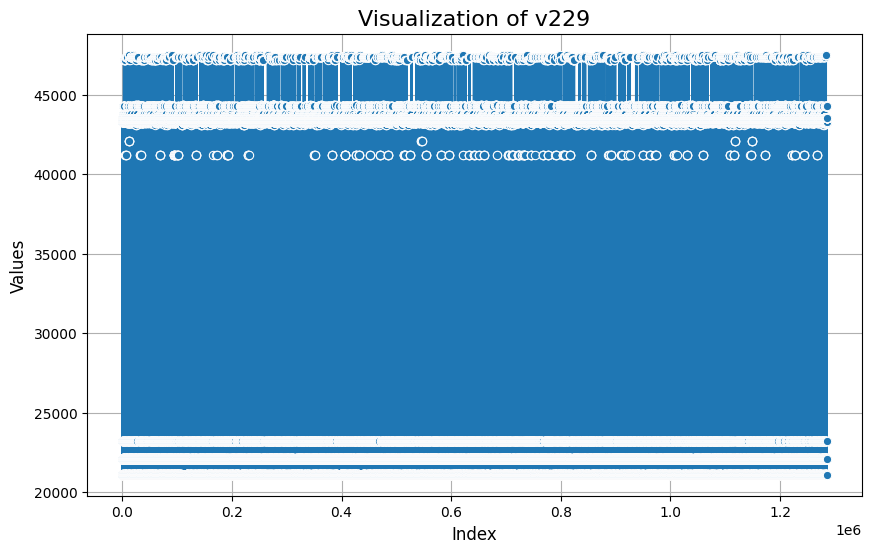

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file


# Specify the column to visualize
column_name = 'v229'  # Replace with the column name
column_data = ff[column_name]
ff['v229'] = pd.to_numeric(ff['v229'], errors='coerce')
# Check for NaN values
print(f"Number of NaN values in '{column_name}': {column_data.isna().sum()}")

# Handle NaN values (choose one option)
column_data_cleaned = column_data.dropna()  # Option 1: Drop rows with NaN
# column_data_cleaned = column_data.fillna(0)  # Option 2: Fill NaN with 0
# column_data_cleaned = column_data.fillna(column_data.mean())  # Option 3: Fill NaN with mean
print(column_data_cleaned.dtype)  # Check the data type



# Create a Seaborn plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=column_data_cleaned, marker='o')

# Customize the plot
plt.title(f'Visualization of {column_name}', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


Number of NaN values in 'v270': 480591
float64


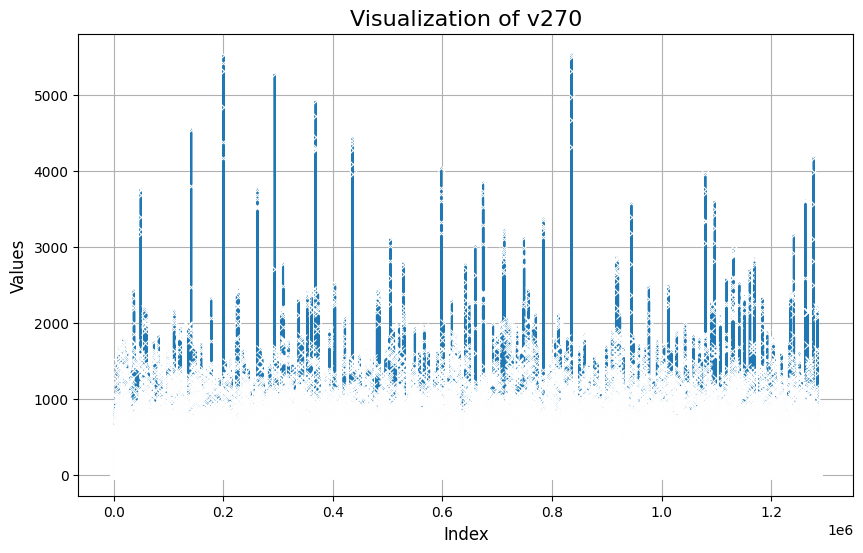

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file


# Specify the column to visualize
column_name = 'v270'  # Replace with the column name
column_data = ff[column_name]
ff['v270'] = pd.to_numeric(ff['v270'], errors='coerce')
# Check for NaN values
print(f"Number of NaN values in '{column_name}': {column_data.isna().sum()}")

# Handle NaN values (choose one option)
column_data_cleaned = column_data.dropna()  # Option 1: Drop rows with NaN
# column_data_cleaned = column_data.fillna(0)  # Option 2: Fill NaN with 0
# column_data_cleaned = column_data.fillna(column_data.mean())  # Option 3: Fill NaN with mean
print(column_data_cleaned.dtype)  # Check the data type



# Create a Seaborn plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=column_data_cleaned, marker='x')

# Customize the plot
plt.title(f'Visualization of {column_name}', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


Number of NaN values in 'v267': 480591
float64


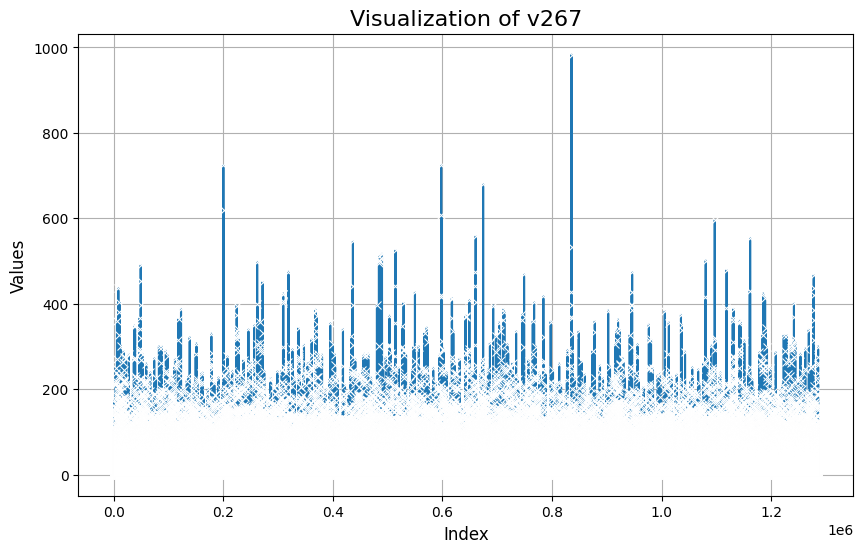

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file


# Specify the column to visualize
column_name = 'v267'  # Replace with the column name
column_data = ff[column_name]
ff['v267'] = pd.to_numeric(ff['v267'], errors='coerce')
# Check for NaN values
print(f"Number of NaN values in '{column_name}': {column_data.isna().sum()}")

# Handle NaN values (choose one option)
column_data_cleaned = column_data.dropna()  # Option 1: Drop rows with NaN
# column_data_cleaned = column_data.fillna(0)  # Option 2: Fill NaN with 0
# column_data_cleaned = column_data.fillna(column_data.mean())  # Option 3: Fill NaN with mean
print(column_data_cleaned.dtype)  # Check the data type



# Create a Seaborn plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=column_data_cleaned, marker='x')

# Customize the plot
plt.title(f'Visualization of {column_name}', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
count = df['v27'].value_counts()
print(count)

v27
Unmarried    409117
MARRIED      370101
Married      193052
UNMARRIED    146090
M             93160
S             13594
OTHER            12
SINGLE            8
Single            5
WIDOW             3
Widow             1
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Read the CSV files
df_final = pd.read_csv('/Users/utkarshmishra/Desktop/untitled folder/Train 2/train_data.csv')
ff_final = pd.read_csv('/Users/utkarshmishra/Desktop/untitled folder/Train 2/valid_data.csv')

# Concatenate the two DataFrames
final = pd.concat([df_final, ff_final], axis=0)

# Optionally, reset the index
final.reset_index(drop=True, inplace=True)


In [ ]:
len(final)

516581

In [ ]:
df_final.head()

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,v276_EVENING,v276_MORNING,v277_EVENING,v277_MORNING,v278_EVENING,v278_MORNING,lag_1_month,lag_2_months,lag_3_months,best_slots
0,b3804b6f986c427848805716c01cdda570e2e1736d406a...,34.333332,0.0,0.0,1.0,1.0,1.0,0.0,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,23.00,20.000000,18.0
1,108555d0c793b4266d9dc0437cfa695d12bc3229b72192...,58.555557,1.0,0.0,1.0,0.0,0.0,1.0,0.0,41.0,...,0.0,1.0,0.0,1.0,0.0,1.0,7.000000,12.00,12.000000,13.0
2,32ff2556536c39e87eb120b2ca6cdecc515151f6878197...,60.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,41.0,...,0.0,1.0,0.0,1.0,0.0,1.0,3.000000,8.00,21.000000,1.0
3,2c96c7a19a616e8358d40bdb3a0ae62819c2adf9e9e4d6...,42.428570,1.0,0.0,1.0,1.0,1.0,0.0,0.0,37.0,...,0.0,1.0,0.0,1.0,1.0,0.0,10.571428,26.00,16.000000,28.0
4,857c89f34d8d05af1629cb332d53abff2be54b107a33c9...,34.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,...,0.0,1.0,0.0,1.0,0.0,1.0,19.555555,12.25,11.642858,21.0


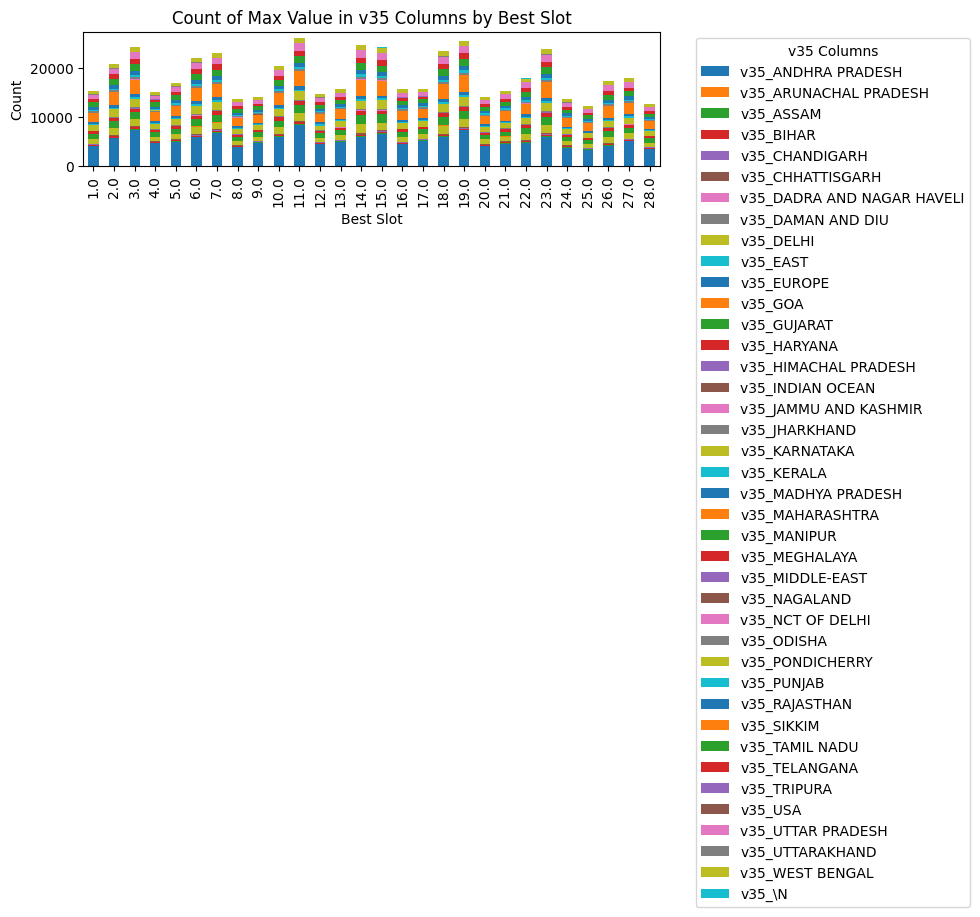

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'final' is your DataFrame
# Sample DataFrame with one-hot encoded columns


# 1. Identify columns starting with 'v35'
v35_columns = [col for col in final.columns if col.startswith('v35')]

# 2. Get the column corresponding to the maximum value in v35 columns
# For each row, find the column name (in v35_columns) that has the maximum value (1)
final['max_v35_column'] = final[v35_columns].idxmax(axis=1)

# 3. Count how many times each value of best_slot occurs for each max_v35_column
# Group by 'best_slot' and count occurrences of max_v35_column values
count_by_slot = final.groupby(['best_slots', 'max_v35_column']).size().unstack(fill_value=0)

# 4. Plot the bar graph
count_by_slot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Max Value in v35 Columns by Best Slot')
plt.xlabel('Best Slot')
plt.ylabel('Count')
plt.legend(title='v35 Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


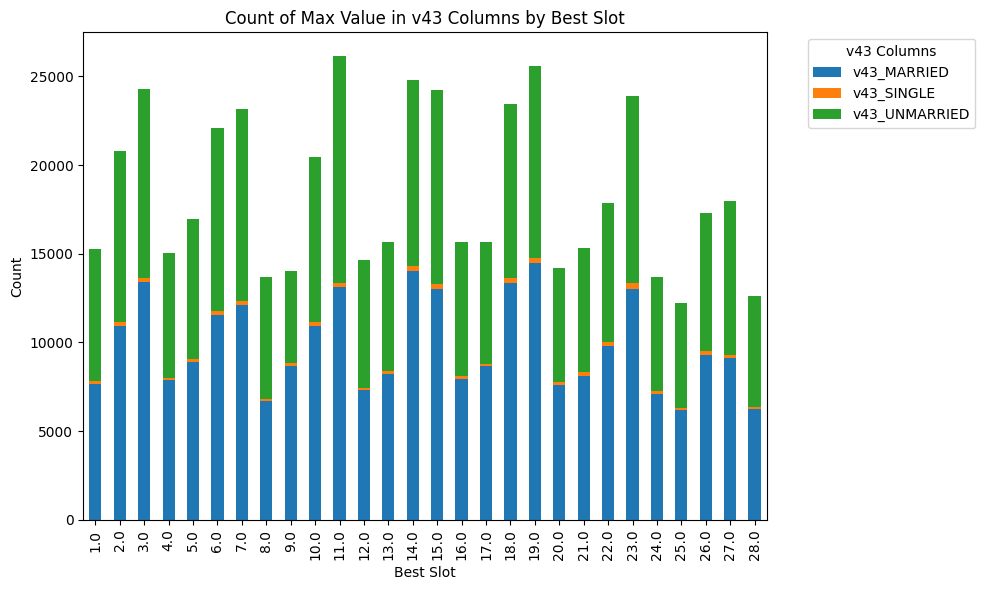

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'final' is your DataFrame
# Sample DataFrame with one-hot encoded columns


# 1. Identify columns starting with 'v35'
v43_columns = [col for col in final.columns if col.startswith('v43')]

# 2. Get the column corresponding to the maximum value in v35 columns
# For each row, find the column name (in v35_columns) that has the maximum value (1)
final['max_v43_column'] = final[v43_columns].idxmax(axis=1)

# 3. Count how many times each value of best_slot occurs for each max_v35_column
# Group by 'best_slot' and count occurrences of max_v35_column values
count_by_slot = final.groupby(['best_slots', 'max_v43_column']).size().unstack(fill_value=0)

# 4. Plot the bar graph
count_by_slot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Max Value in v43 Columns by Best Slot')
plt.xlabel('Best Slot')
plt.ylabel('Count')
plt.legend(title='v43 Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


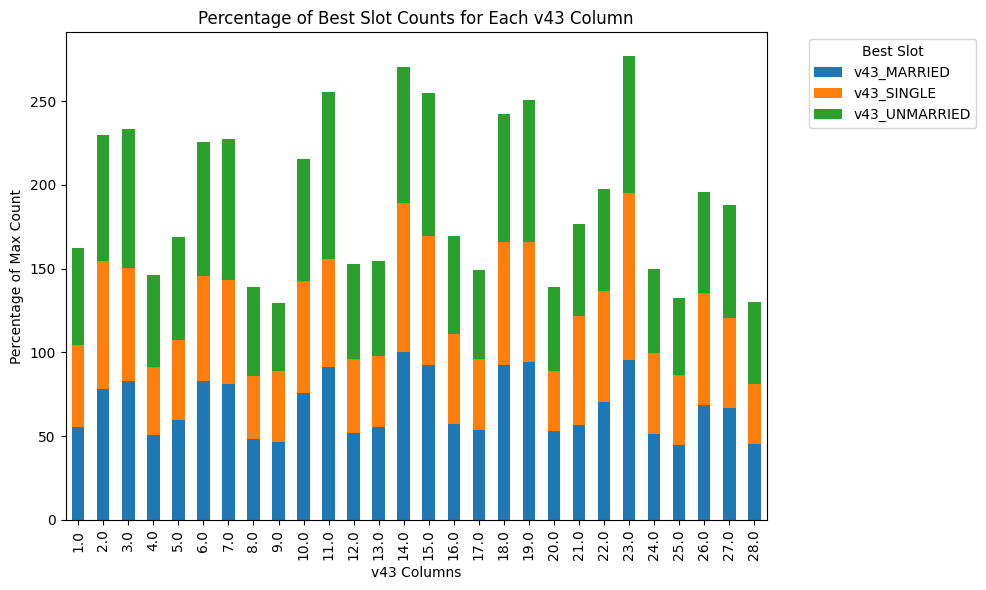

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with one-hot encoded columns

# 1. Identify columns starting with 'v35'
v43_columns = [col for col in final.columns if col.startswith('v43')]

# 2. Initialize a dictionary to store counts of 'best_slot' for each v35 column
slot_counts = {col: final[final[col] == 1]['best_slots'].value_counts() for col in v43_columns}

# 3. Create a DataFrame from the dictionary, aligning all results
slot_counts_df = pd.DataFrame(slot_counts).fillna(0)

# 4. Find the maximum count for each v35 column
max_counts = slot_counts_df.max(axis=0)

# 5. Calculate the percentage of each count relative to the maximum count
percentage_df = (slot_counts_df / max_counts) * 100

# 6. Plot the percentage bar graph
percentage_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Best Slot Counts for Each v43 Column')
plt.xlabel('v43 Columns')
plt.ylabel('Percentage of Max Count')
plt.legend(title='Best Slot', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


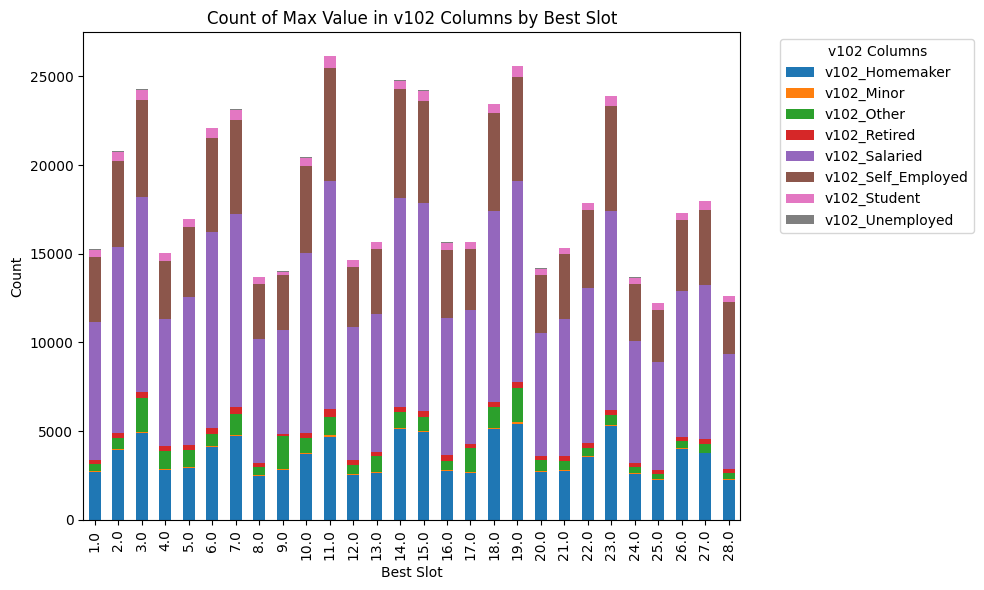

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'final' is your DataFrame
# Sample DataFrame with one-hot encoded columns


# 1. Identify columns starting with 'v35'
v35_columns = [col for col in final.columns if col.startswith('v102')]

# 2. Get the column corresponding to the maximum value in v35 columns
# For each row, find the column name (in v35_columns) that has the maximum value (1)
final['max_v102_column'] = final[v35_columns].idxmax(axis=1)

# 3. Count how many times each value of best_slot occurs for each max_v35_column
# Group by 'best_slot' and count occurrences of max_v35_column values
count_by_slot = final.groupby(['best_slots', 'max_v102_column']).size().unstack(fill_value=0)

# 4. Plot the bar graph
count_by_slot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Max Value in v102 Columns by Best Slot')
plt.xlabel('Best Slot')
plt.ylabel('Count')
plt.legend(title='v102 Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


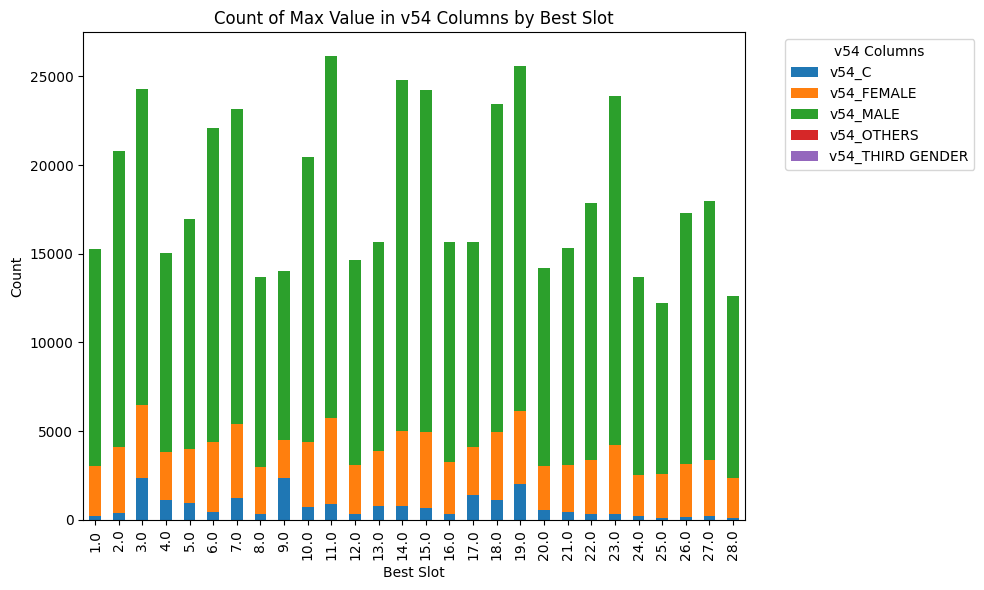

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'final' is your DataFrame
# Sample DataFrame with one-hot encoded columns


# 1. Identify columns starting with 'v35'
v54_columns = [col for col in final.columns if col.startswith('v54')]

# 2. Get the column corresponding to the maximum value in v35 columns
# For each row, find the column name (in v35_columns) that has the maximum value (1)
final['max_v54_column'] = final[v54_columns].idxmax(axis=1)

# 3. Count how many times each value of best_slot occurs for each max_v35_column
# Group by 'best_slot' and count occurrences of max_v35_column values
count_by_slot = final.groupby(['best_slots', 'max_v54_column']).size().unstack(fill_value=0)

# 4. Plot the bar graph
count_by_slot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Max Value in v54 Columns by Best Slot')
plt.xlabel('Best Slot')
plt.ylabel('Count')
plt.legend(title='v54 Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


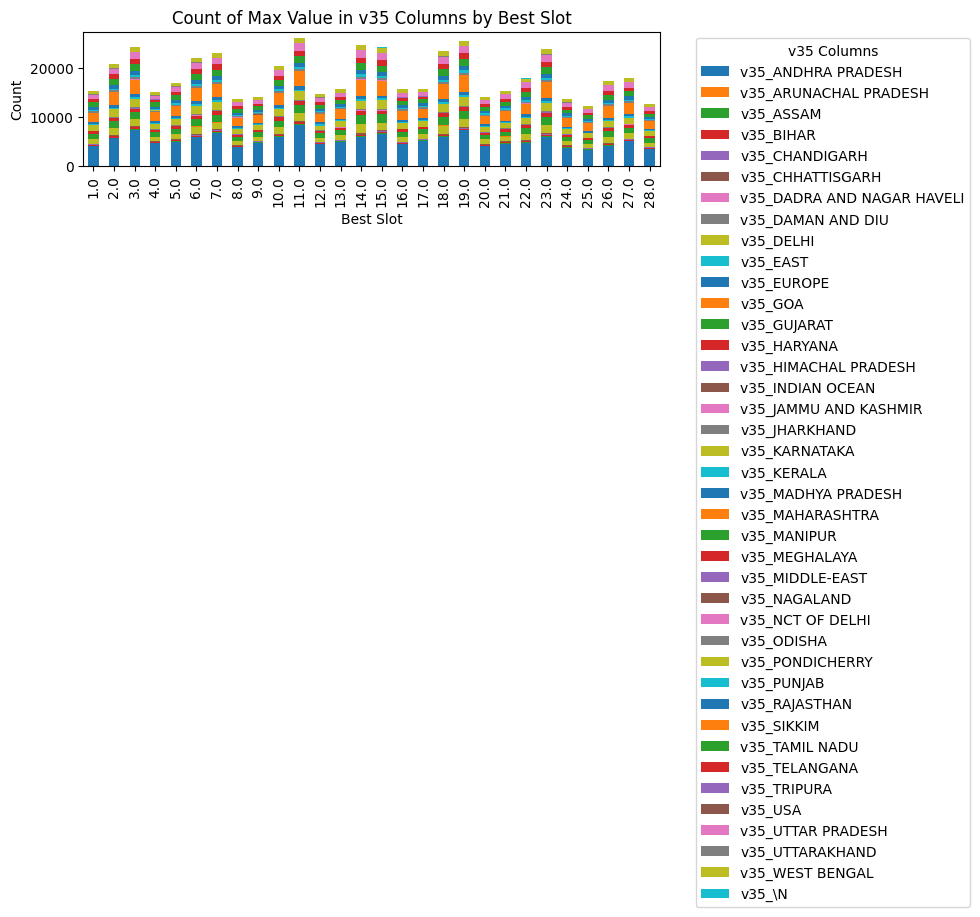

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'final' is your DataFrame
# Sample DataFrame with one-hot encoded columns


# 1. Identify columns starting with 'v35'
v35_columns = [col for col in final.columns if col.startswith('v35')]

# 2. Get the column corresponding to the maximum value in v35 columns
# For each row, find the column name (in v35_columns) that has the maximum value (1)
final['max_v35_column'] = final[v35_columns].idxmax(axis=1)

# 3. Count how many times each value of best_slot occurs for each max_v35_column
# Group by 'best_slot' and count occurrences of max_v35_column values
count_by_slot = final.groupby(['best_slots', 'max_v35_column']).size().unstack(fill_value=0)

# 4. Plot the bar graph
count_by_slot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Max Value in v35 Columns by Best Slot')
plt.xlabel('Best Slot')
plt.ylabel('Count')
plt.legend(title='v35 Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


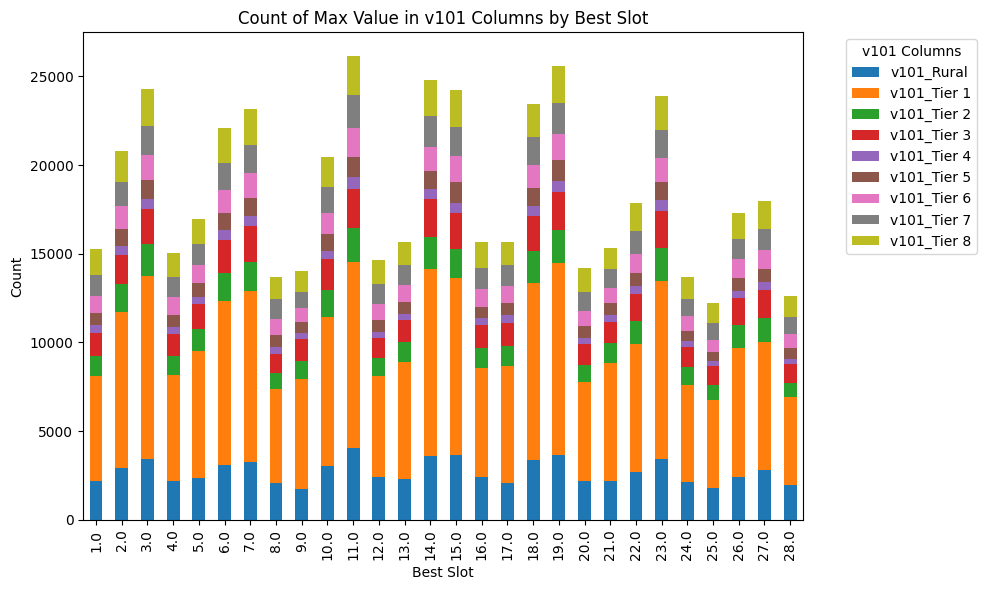

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'final' is your DataFrame
# Sample DataFrame with one-hot encoded columns


# 1. Identify columns starting with 'v35'
v101_columns = [col for col in final.columns if col.startswith('v101')]

# 2. Get the column corresponding to the maximum value in v35 columns
# For each row, find the column name (in v35_columns) that has the maximum value (1)
final['max_v101_column'] = final[v101_columns].idxmax(axis=1)

# 3. Count how many times each value of best_slot occurs for each max_v35_column
# Group by 'best_slot' and count occurrences of max_v35_column values
count_by_slot = final.groupby(['best_slots', 'max_v101_column']).size().unstack(fill_value=0)

# 4. Plot the bar graph
count_by_slot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Max Value in v101 Columns by Best Slot')
plt.xlabel('Best Slot')
plt.ylabel('Count')
plt.legend(title='v101 Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [271]:
merged.drop(0,axis=1).to_csv('labels0.csv')

In [5]:
pd.concat([train_data,valid_data],axis=0)

customer_code       0
v32                 0
v45                 0
v49                 0
v50                 0
                   ..
lag_3_months_5.0    0
lag_3_months_6.0    0
lag_3_months_7.0    0
lag_3_months_8.0    0
lag_3_months_9.0    0
Length: 276, dtype: int64

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load data
train_data = pd.read_csv('train_data.csv')
valid_data = pd.read_csv('valid_data.csv')

# Split into features and target
X_train = train_data.drop('best_slots', axis=1).set_index('customer_code',drop=True)
y_train = train_data['best_slots']
X_test = valid_data.drop('best_slots', axis=1).set_index('customer_code',drop=True)
y_test = valid_data['best_slots']

# Ensure labels start from 0
y_train -= 1
y_test -= 1
num_classes = 28

# Initialize classifiers
classifiers = {
    'CatBoost': {
        'model': CatBoostClassifier,
        'params': {
            'iterations': 100,
            'learning_rate': 0.1,
            'depth': 6,
            'loss_function': 'MultiClass',
            'verbose': 0,
            'random_seed': 42
        },
        'train_function': lambda X, y, params: CatBoostClassifier(**params).fit(X, y),
        'predict_function': lambda model, X: model.predict_proba(X)
    }
}

# Dictionary to store ranked probabilities
ranked_data = {}

# Train and predict with each classifier
for name, clf_data in classifiers.items():
    print(f"Training {name}...")
    model = clf_data['train_function'](X_train, y_train, clf_data['params'])

    # Predict probabilities
    probabilities = clf_data['predict_function'](model, X_test)

    # Create a DataFrame for probabilities
    prob_df = pd.DataFrame(probabilities, columns=[f'class_{i}' for i in range(num_classes)])
    prob_df['customer_code'] = valid_data['customer_code'].values  # Assuming a 'customer_id' column exists

    # Rank classes by probabilities for each customer
    prob_df['ranked_slots'] = prob_df.apply(
        lambda row: [x for _, x in sorted(zip(row[:-1], prob_df.columns[:-1]), reverse=True)], axis=1
    )

    # Store ranked data
    ranked_data[name] = prob_df[['customer_code', 'ranked_slots']]

    # Evaluate accuracy
    y_pred = probabilities.argmax(axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.4f}")



Training CatBoost...
Accuracy for CatBoost: 0.4990


In [ ]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

Text(0.5, 1.0, 'Feature Importance')

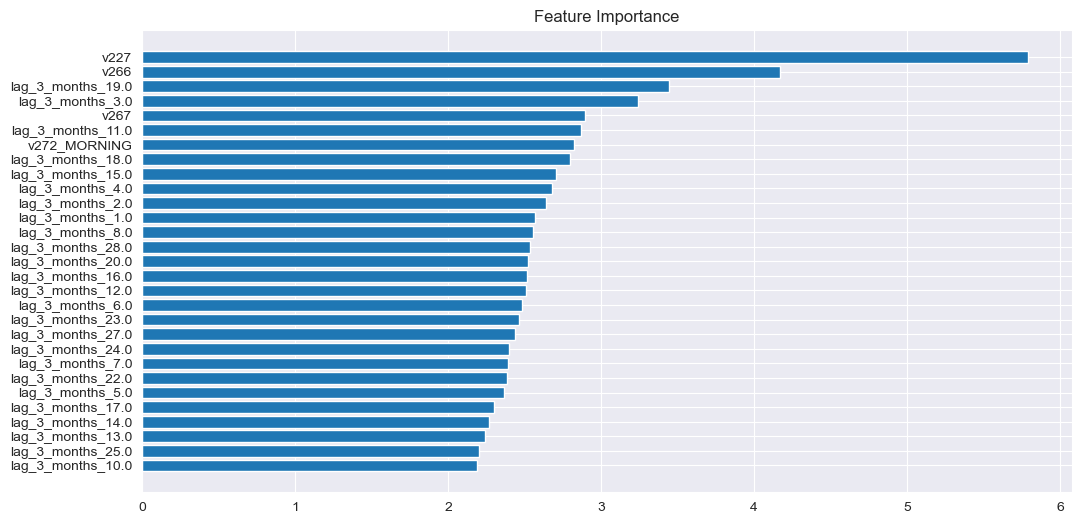

In [9]:
import matplotlib.pyplot as plt
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[245:]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [11]:

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import shap



Text(0.5, 1.0, 'Permutation Importance')

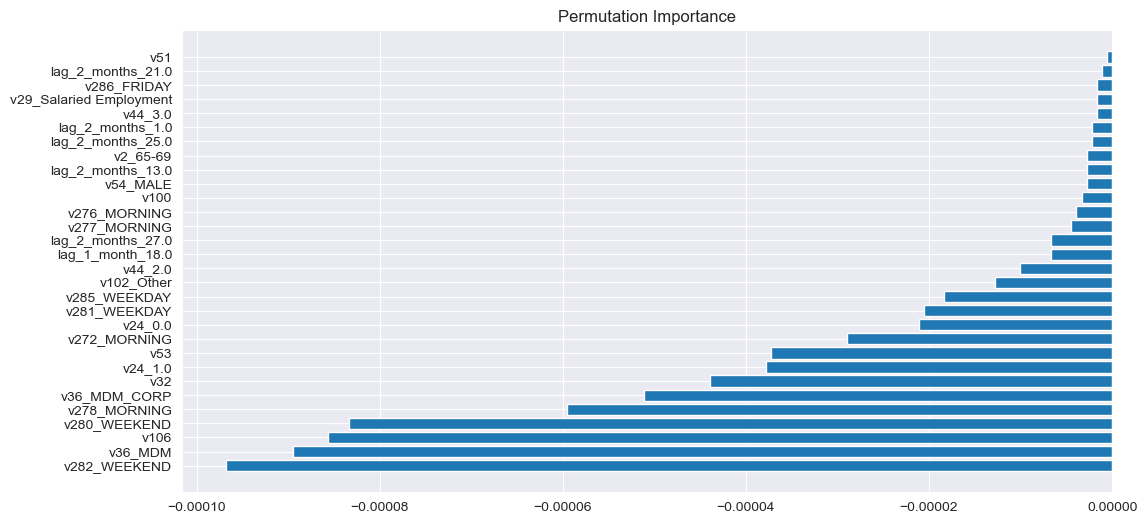

In [16]:

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()[:30]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')


Text(0.5, 1.0, 'Permutation Importance')

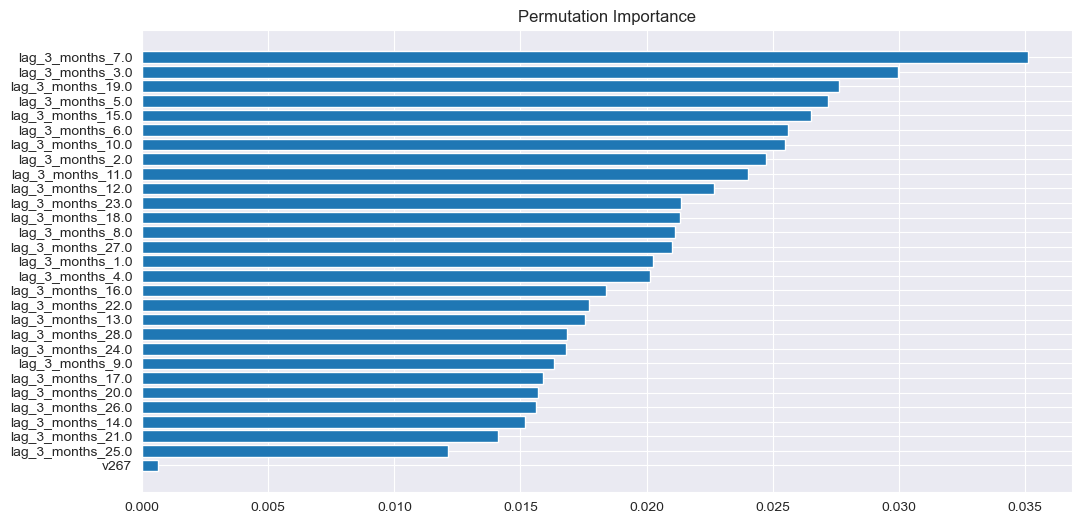

In [20]:
sorted_idx = perm_importance.importances_mean.argsort()[245:]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

In [15]:
from catboost import Pool

shap_values = model.get_feature_importance(Pool(X_test, label=y_test), type="ShapValues")

KeyboardInterrupt: 

In [10]:
train_data

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,lag_3_months_26.0,lag_3_months_27.0,lag_3_months_28.0,lag_3_months_3.0,lag_3_months_4.0,lag_3_months_5.0,lag_3_months_6.0,lag_3_months_7.0,lag_3_months_8.0,lag_3_months_9.0
0,b3804b6f986c427848805716c01cdda570e2e1736d406a...,33.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,35.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108555d0c793b4266d9dc0437cfa695d12bc3229b72192...,40.444443,1.0,0.0,1.0,0.0,0.0,1.0,0.0,41.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32ff2556536c39e87eb120b2ca6cdecc515151f6878197...,60.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,41.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2c96c7a19a616e8358d40bdb3a0ae62819c2adf9e9e4d6...,61.625000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,37.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,857c89f34d8d05af1629cb332d53abff2be54b107a33c9...,34.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336721,0cc55b05fd8ae199d816232de9898798c0959dd559f456...,38.674090,1.0,0.0,1.0,1.0,1.0,0.0,0.0,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336722,bbf645a99c7511d4eb53addb23a667741db938613262b1...,29.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,27.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336723,f3521a44edeafb0ec083dea743bd55a0194d6ce5203b15...,59.667610,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40.333332,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
336724,772a727167edc8cdea82ba405471d2936054f93f7475cf...,82.391655,1.0,0.0,1.0,1.0,1.0,0.0,0.0,32.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Testing

In [3]:
import pandas as pd
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('valid_data.csv')
pd.concat([train_data,val_data],axis=0)

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,lag_3_months_26.0,lag_3_months_27.0,lag_3_months_28.0,lag_3_months_3.0,lag_3_months_4.0,lag_3_months_5.0,lag_3_months_6.0,lag_3_months_7.0,lag_3_months_8.0,lag_3_months_9.0
0,b3804b6f986c427848805716c01cdda570e2e1736d406a...,33.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,35.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108555d0c793b4266d9dc0437cfa695d12bc3229b72192...,40.444443,1.0,0.0,1.0,0.0,0.0,1.0,0.0,41.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32ff2556536c39e87eb120b2ca6cdecc515151f6878197...,60.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,41.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2c96c7a19a616e8358d40bdb3a0ae62819c2adf9e9e4d6...,61.625000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,37.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,857c89f34d8d05af1629cb332d53abff2be54b107a33c9...,34.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179850,6159c7f6ce2881cd6fea1929ff66c0a877aee923423bc6...,47.900978,1.0,0.0,1.0,1.0,1.0,0.0,0.0,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179851,a856a02b3fe7a175dedfe9632c68870bcc152dbbc5909e...,40.852528,1.0,0.0,1.0,1.0,1.0,1.0,0.0,28.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179852,09b986b540e396ba2e8429ae7fa027558b8f904289c48b...,90.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179853,929bb6d89ab5e74bf393ef66c205f2860d46233d9fafbf...,60.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,37.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test_data

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,lag_3_months_26,lag_3_months_27,lag_3_months_28,lag_3_months_3,lag_3_months_4,lag_3_months_5,lag_3_months_6,lag_3_months_7,lag_3_months_8,lag_3_months_9
0,635c3a7b6c89528607944fa312096e48c9f54dfaf821f5...,60.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,970ef77e5a753f82ed9ee1e4446db1dd29d237ed0f64c7...,34.750000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ccc36bb7c74601863c7328faa90ade2d806bccea2a3c51...,84.000000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3c34d39288675fb3033d5f24bfccf427f1ee97e8c4bbb3...,50.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cb353c7e0419b7b9194979ba250e0dfd1fa19a41b01cb1...,44.000000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68445,4cde59d5b42a2d221037cb2fca0de4b017b92486881c72...,27.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68446,537705bf6fab6b290248264b5b34cc3f59352740d98964...,50.671787,1.0,0.0,1.0,1.0,1.0,1.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68447,48d22d3e52065cb6d54e1b88ec4d5a41b99f19be0427a2...,20.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68448,5d8e50df07ecaeb2da40b588aab824e9d33a705e005a2b...,46.078434,0.0,0.0,1.0,1.0,1.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
test_data.rename(columns=lambda col: f"{col}.0" if col.startswith('lag_') else col, inplace=True)


In [23]:
import pandas as pd
import numpy as np
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import train_test_split

# # Load data
# train_data = pd.read_csv('/content/drive/MyDrive/train_data.csv')
# valid_data = pd.read_csv('/content/drive/MyDrive/valid_data.csv')
# 
# # Split into features and target
# X_train = train_data.drop('best_slots', axis=1)
# y_train = train_data['best_slots']
# X_test = valid_data.drop('best_slots', axis=1)
# y_test = valid_data['best_slots']
# 
# # Ensure labels start from 0
# y_train -= 1
# y_test -= 1
num_classes = 28

# Split train data further for validation
dev_X_train, dev_X_val, dev_y_train, dev_y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define search space for Hyperopt
search_space = {
    'depth': hp.choice('depth', [4, 6, 8, 10]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'iterations': hp.choice('iterations', [100, 200, 300, 500]),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'random_strength': hp.uniform('random_strength', 1e-9, 10),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1),
    'border_count': hp.choice('border_count', [32, 64, 128, 254]),
    'verbose': -1
}

# Define objective function for Hyperopt
def objective(params):
    model = CatBoostClassifier(
        depth=params['depth'],
        learning_rate=params['learning_rate'],
        iterations=params['iterations'],
        l2_leaf_reg=params['l2_leaf_reg'],
        random_strength=params['random_strength'],
        bagging_temperature=params['bagging_temperature'],
        border_count=params['border_count'],
        loss_function='MultiClass',
        random_seed=42,
        verbose=params['verbose']
    )
    
    model.fit(dev_X_train, dev_y_train, eval_set=(dev_X_val, dev_y_val), verbose=0)
    preds = model.predict(dev_X_val)
    accuracy = accuracy_score(dev_y_val, preds)
    
    return {'loss': -accuracy, 'status': STATUS_OK}

# Run Hyperopt optimization
trials = Trials()
best_params = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=10, trials=trials)

# Map the best params back for categorical choices
best_params['depth'] = [4, 6, 8, 10][best_params['depth']]
best_params['iterations'] = [100, 200, 300, 500][best_params['iterations']]
best_params['border_count'] = [32, 64, 128, 254][best_params['border_count']]

print("Best Parameters:", best_params)

# Train final model with best parameters
final_model = CatBoostClassifier(
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate'],
    iterations=best_params['iterations'],
    l2_leaf_reg=best_params['l2_leaf_reg'],
    random_strength=best_params['random_strength'],
    bagging_temperature=best_params['bagging_temperature'],
    border_count=best_params['border_count'],
    loss_function='MultiClass',
    random_seed=42,
    verbose=1
)

final_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


100%|██████████| 10/10 [16:49<00:00, 100.96s/trial, best loss: -0.31551985270097704]
Best Parameters: {'bagging_temperature': 0.09035014545282882, 'border_count': 32, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 9.159385747820547, 'learning_rate': 0.2553757839646063, 'random_strength': 1.9319191077618327}
0:	learn: 3.2006988	total: 756ms	remaining: 3m 46s
1:	learn: 3.0840167	total: 1.3s	remaining: 3m 14s
2:	learn: 2.9853762	total: 1.87s	remaining: 3m 5s
3:	learn: 2.9241363	total: 2.38s	remaining: 2m 55s
4:	learn: 2.9033444	total: 2.92s	remaining: 2m 52s
5:	learn: 2.8954730	total: 3.41s	remaining: 2m 47s
6:	learn: 2.8674644	total: 3.84s	remaining: 2m 40s
7:	learn: 2.8588870	total: 4.32s	remaining: 2m 37s
8:	learn: 2.8556979	total: 4.91s	remaining: 2m 38s
9:	learn: 2.8513830	total: 5.42s	remaining: 2m 37s
10:	learn: 2.8482225	total: 5.93s	remaining: 2m 35s
11:	learn: 2.8410656	total: 6.35s	remaining: 2m 32s
12:	learn: 2.8370016	total: 6.82s	remaining: 2m 30s
13:	learn: 2.8350565	total: 

In [9]:
test_data

,customer_code,v32,v45,v49,v50,v51,v52,v53,v73,v80,...,lag_3_months_26.0,lag_3_months_27.0,lag_3_months_28.0,lag_3_months_3.0,lag_3_months_4.0,lag_3_months_5.0,lag_3_months_6.0,lag_3_months_7.0,lag_3_months_8.0,lag_3_months_9.0
0,635c3a7b6c89528607944fa312096e48c9f54dfaf821f5...,60.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,970ef77e5a753f82ed9ee1e4446db1dd29d237ed0f64c7...,34.750000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ccc36bb7c74601863c7328faa90ade2d806bccea2a3c51...,84.000000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3c34d39288675fb3033d5f24bfccf427f1ee97e8c4bbb3...,50.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cb353c7e0419b7b9194979ba250e0dfd1fa19a41b01cb1...,44.000000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68445,4cde59d5b42a2d221037cb2fca0de4b017b92486881c72...,27.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68446,537705bf6fab6b290248264b5b34cc3f59352740d98964...,50.671787,1.0,0.0,1.0,1.0,1.0,1.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68447,48d22d3e52065cb6d54e1b88ec4d5a41b99f19be0427a2...,20.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68448,5d8e50df07ecaeb2da40b588aab824e9d33a705e005a2b...,46.078434,0.0,0.0,1.0,1.0,1.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Load data
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('valid_data.csv')
test_data = pd.read_csv('test_data.csv')
test_data.rename(columns=lambda col: f"{col}.0" if col.startswith('lag_') else col, inplace=True)
full_data =pd.concat([train_data,val_data],axis=0)
# Split into features and target
X_train = full_data.drop('best_slots', axis=1).set_index('customer_code',drop=True)
y_train = full_data['best_slots']
X_test = test_data.set_index('customer_code',drop=True)

# Ensure labels start from 0
y_train -= 1
num_classes = 28

# Initialize classifiers
classifiers = {
    'CatBoost': {
        'model': CatBoostClassifier,
        'params': {
            'iterations': 100,
            'learning_rate': 0.1,
            'depth': 6,
            'loss_function': 'MultiClass',
            'verbose': 0,
            'random_seed': 42
        },
        'train_function': lambda X, y, params: CatBoostClassifier(**params).fit(X, y),
        'predict_function': lambda model, X: model.predict_proba(X)
    }
}

# Dictionary to store ranked probabilities
ranked_data2 = {}

# Train and predict with each classifier
for name, clf_data in classifiers.items():
    print(f"Training {name}...")
    model = clf_data['train_function'](X_train, y_train, clf_data['params'])

    # Predict probabilities
    probabilities = clf_data['predict_function'](model, X_test)

    # Create a DataFrame for probabilities
    prob_df = pd.DataFrame(probabilities, columns=[f'class_{i}' for i in range(num_classes)])
    prob_df['customer_code'] = test_data['customer_code'].values  # Assuming a 'customer_id' column exists

    # Rank classes by probabilities for each customer
    prob_df['ranked_slots'] = prob_df.apply(
        lambda row: [x for _, x in sorted(zip(row[:-1], prob_df.columns[:-1]), reverse=True)], axis=1
    )

    # Store ranked data
    ranked_data2[name] = prob_df[['customer_code', 'ranked_slots']]

Training CatBoost...


In [25]:
# slots2 = ranked_data2['CatBoost']
# slots2['ranked_slots'] = ranked_data2['CatBoost']['ranked_slots'].apply(lambda x: [f"slot_{str(int(y.split('_')[1])+1)}" for y in x])
# slots2

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_23388/83644269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slots2['ranked_slots'] = ranked_data2['CatBoost']['ranked_slots'].apply(lambda x: [f"slot_{str(int(y.split('_')[1])+1)}" for y in x])


,customer_code,ranked_slots
0,635c3a7b6c89528607944fa312096e48c9f54dfaf821f5...,"[slot_11, slot_15, slot_7, slot_6, slot_23, sl..."
1,970ef77e5a753f82ed9ee1e4446db1dd29d237ed0f64c7...,"[slot_23, slot_19, slot_14, slot_18, slot_3, s..."
2,ccc36bb7c74601863c7328faa90ade2d806bccea2a3c51...,"[slot_11, slot_3, slot_19, slot_15, slot_23, s..."
3,3c34d39288675fb3033d5f24bfccf427f1ee97e8c4bbb3...,"[slot_11, slot_3, slot_15, slot_16, slot_19, s..."
4,cb353c7e0419b7b9194979ba250e0dfd1fa19a41b01cb1...,"[slot_23, slot_19, slot_18, slot_14, slot_26, ..."
...,...,...
68445,4cde59d5b42a2d221037cb2fca0de4b017b92486881c72...,"[slot_23, slot_19, slot_18, slot_14, slot_2, s..."
68446,537705bf6fab6b290248264b5b34cc3f59352740d98964...,"[slot_23, slot_19, slot_14, slot_18, slot_15, ..."
68447,48d22d3e52065cb6d54e1b88ec4d5a41b99f19be0427a2...,"[slot_23, slot_11, slot_7, slot_2, slot_18, sl..."
68448,5d8e50df07ecaeb2da40b588aab824e9d33a705e005a2b...,"[slot_23, slot_18, slot_14, slot_19, slot_26, ..."


In [13]:
slots2 = ranked_data2['CatBoost']
slots2['ranked_slots'] = ranked_data2['CatBoost']['ranked_slots'].apply(lambda x: [f"slot_{str(int(y.split('_')[1])+1)}" for y in x])
slots2

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_42077/83644269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slots2['ranked_slots'] = ranked_data2['CatBoost']['ranked_slots'].apply(lambda x: [f"slot_{str(int(y.split('_')[1])+1)}" for y in x])


,customer_code,ranked_slots
0,635c3a7b6c89528607944fa312096e48c9f54dfaf821f5...,"[slot_16, slot_11, slot_15, slot_23, slot_7, s..."
1,970ef77e5a753f82ed9ee1e4446db1dd29d237ed0f64c7...,"[slot_3, slot_19, slot_23, slot_18, slot_14, s..."
2,ccc36bb7c74601863c7328faa90ade2d806bccea2a3c51...,"[slot_17, slot_11, slot_3, slot_19, slot_7, sl..."
3,3c34d39288675fb3033d5f24bfccf427f1ee97e8c4bbb3...,"[slot_15, slot_11, slot_19, slot_3, slot_7, sl..."
4,cb353c7e0419b7b9194979ba250e0dfd1fa19a41b01cb1...,"[slot_17, slot_23, slot_19, slot_14, slot_15, ..."
...,...,...
68445,4cde59d5b42a2d221037cb2fca0de4b017b92486881c72...,"[slot_21, slot_23, slot_2, slot_6, slot_18, sl..."
68446,537705bf6fab6b290248264b5b34cc3f59352740d98964...,"[slot_14, slot_23, slot_18, slot_10, slot_11, ..."
68447,48d22d3e52065cb6d54e1b88ec4d5a41b99f19be0427a2...,"[slot_23, slot_14, slot_15, slot_11, slot_19, ..."
68448,5d8e50df07ecaeb2da40b588aab824e9d33a705e005a2b...,"[slot_23, slot_19, slot_18, slot_14, slot_15, ..."


In [68]:
dfev = pd.read_csv('Test/test_customers.csv')

In [69]:
dfev.rename(columns={'CUSTOMER_CODE': 'customer_code'}, inplace=True)
dfev['predicted_slots_order'] = dfev['customer_code'].apply(lambda x: slots2[slots2['customer_code']==x]['ranked_slots'].values)

In [70]:
dfev['predicted_slots_order'] = dfev['predicted_slots_order'].apply(lambda x: x[0] if x != None else coldlist)

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_42077/3574575420.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  dfev['predicted_slots_order'] = dfev['predicted_slots_order'].apply(lambda x: x[0] if x != None else coldlist)


In [75]:
dfev

,predicted_slots_order
customer_code,
2cf9e9b31ca760b8772d8e136e85c640df36b491ba8be73ba8ec9a73f59660b9,"[slot_11, slot_14, slot_15, slot_19, slot_3, s..."
34481740a44eae239d61c7c0526dc42dc221a94939a8c11fdb54880502d795cd,"[slot_14, slot_10, slot_6, slot_3, slot_7, slo..."
bb5d102bb50fd308aee248d0fa5cdddbf1a29e263d8e2dba231f0e8935521788,"[slot_23, slot_11, slot_15, slot_6, slot_7, sl..."
8229cb51e7392dc37cac4fd94959699bca2c9424a8548c67ffacfebcd23bb944,"[slot_27, slot_15, slot_3, slot_7, slot_14, sl..."
f812ad81bc6939bab1856476f12ee2ff8100b8308a3b1c0dd5c0653677eb2cb3,"[slot_8, slot_23, slot_15, slot_11, slot_19, s..."
...,...
2b3f8f3a6222d12e94cb7ca4911472464ad36b80b506e0a8954ab4bca57f70fc,"[slot_14, slot_3, slot_15, slot_7, slot_18, sl..."
1763f89ffbb619f67b5614da85f2e6e2d37702420c893df3b8753b02e2e8a2f0,"[slot_23, slot_14, slot_19, slot_11, slot_18, ..."
6ad50ea3f7b58bda52c7a7e52c2f10880cd27e8742dcb7af23cc9681fbaa2464,"[slot_23, slot_14, slot_19, slot_18, slot_15, ..."


In [77]:
dfev.to_csv('predictions.csv')

In [351]:
ranked_slots

{'f688d48aa879ff818129a5b5594f109cc089b8a55c81e710fedb361f550ea5ce': ['slot_25',
  'slot_11',
  'slot_7',
  'slot_10',
  'slot_6',
  'slot_13',
  'slot_3',
  'slot_15',
  'slot_14',
  'slot_5',
  'slot_19',
  'slot_1',
  'slot_27',
  'slot_2',
  'slot_22',
  'slot_23',
  'slot_18',
  'slot_21',
  'slot_26',
  'slot_17',
  'slot_4',
  'slot_12',
  'slot_20',
  'slot_16',
  'slot_24',
  'slot_8',
  'slot_28',
  'slot_9'],
 '86475fea534c99aac1ce1e3f36db57cb109d77d7e7a1bfaaf493a6290d4caf2a': ['slot_19',
  'slot_17',
  'slot_9',
  'slot_3',
  'slot_7',
  'slot_18',
  'slot_13',
  'slot_11',
  'slot_15',
  'slot_10',
  'slot_14',
  'slot_5',
  'slot_20',
  'slot_23',
  'slot_22',
  'slot_12',
  'slot_16',
  'slot_21',
  'slot_27',
  'slot_6',
  'slot_4',
  'slot_8',
  'slot_26',
  'slot_2',
  'slot_28',
  'slot_24',
  'slot_25',
  'slot_1'],
 '3dcf98d4c2e9aee8dca859f056bbf514ea8ba20a68d59d4a22a703e4076fab6c': ['slot_19',
  'slot_11',
  'slot_7',
  'slot_6',
  'slot_3',
  'slot_23',
  'slot_1

In [273]:
# Save ranked data to CSV
for name, df in ranked_data.items():
    output_path = f'{name}_ranked_slots.csv'
    df.to_csv(output_path, index=False)
    print(f"Saved ranked slots for {name} to {output_path}")

Saved ranked slots for XGBoost to XGBoost_ranked_slots.csv
Saved ranked slots for CatBoost to CatBoost_ranked_slots.csv
Saved ranked slots for LightGBM to LightGBM_ranked_slots.csv
Saved ranked slots for AdaBoost to AdaBoost_ranked_slots.csv


In [16]:
slots = ranked_data['CatBoost']

In [17]:
slots['ranked_slots'] = ranked_data['CatBoost']['ranked_slots'].apply(lambda x: [f"slot_{str(int(y.split('_')[1])+1)}" for y in x])
slots

/var/folders/v5/6ddrx1t95g54gztzz5lxlbdw0000gn/T/ipykernel_42077/2821337367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slots['ranked_slots'] = ranked_data['CatBoost']['ranked_slots'].apply(lambda x: [f"slot_{str(int(y.split('_')[1])+1)}" for y in x])


,customer_code,ranked_slots
0,f688d48aa879ff818129a5b5594f109cc089b8a55c81e7...,"[slot_25, slot_11, slot_7, slot_10, slot_6, sl..."
1,86475fea534c99aac1ce1e3f36db57cb109d77d7e7a1bf...,"[slot_19, slot_17, slot_9, slot_3, slot_7, slo..."
2,3dcf98d4c2e9aee8dca859f056bbf514ea8ba20a68d59d...,"[slot_19, slot_11, slot_7, slot_6, slot_3, slo..."
3,2ee059ede2f3f335413928f20f924e64867488ae4f016a...,"[slot_15, slot_19, slot_18, slot_26, slot_3, s..."
4,b4774825fceba233f2c0480aa43c251e007e706755bc06...,"[slot_20, slot_14, slot_3, slot_15, slot_7, sl..."
...,...,...
179850,6159c7f6ce2881cd6fea1929ff66c0a877aee923423bc6...,"[slot_15, slot_18, slot_19, slot_23, slot_14, ..."
179851,a856a02b3fe7a175dedfe9632c68870bcc152dbbc5909e...,"[slot_17, slot_23, slot_5, slot_21, slot_14, s..."
179852,09b986b540e396ba2e8429ae7fa027558b8f904289c48b...,"[slot_12, slot_11, slot_7, slot_10, slot_15, s..."
179853,929bb6d89ab5e74bf393ef66c205f2860d46233d9fafbf...,"[slot_2, slot_6, slot_11, slot_10, slot_14, sl..."


In [18]:
import pandas as pd
from collections import Counter

df = slots.copy()

# Extract all ranked lists
ranked_lists = df["ranked_slots"].tolist()

# Transpose the ranked lists to group slots by their ranks
ranked_slots_by_position = list(zip(*ranked_lists))

# Compute the mode for each rank, ensuring no duplicates
final_ranked_slots = []
used_slots = set()

for slots_at_rank in ranked_slots_by_position:
    # Count occurrences of each slot in the current rank
    slot_counts = Counter(slots_at_rank)
    
    # Sort slots by frequency and break ties alphabetically
    sorted_slots = sorted(slot_counts.keys(), key=lambda x: (-slot_counts[x], x))
    
    # Select the first unused slot
    for slot in sorted_slots:
        if slot not in used_slots:
            final_ranked_slots.append(slot)
            used_slots.add(slot)
            break

# Generate a ranked list for cold-start customers
cold_start_ranked_list = final_ranked_slots

# Output the result
print("Ranked list for cold-start customers:")
print(cold_start_ranked_list)


Ranked list for cold-start customers:
['slot_14', 'slot_11', 'slot_6', 'slot_7', 'slot_10', 'slot_3', 'slot_2', 'slot_15', 'slot_23', 'slot_19', 'slot_18', 'slot_5', 'slot_22', 'slot_27', 'slot_1', 'slot_13', 'slot_17', 'slot_12', 'slot_21', 'slot_25', 'slot_16', 'slot_8', 'slot_4', 'slot_28', 'slot_20', 'slot_24', 'slot_9', 'slot_26']


In [19]:
import pandas as pd
from collections import Counter

df = slots2.copy()

# Extract all ranked lists
ranked_lists = df["ranked_slots"].tolist()

# Transpose the ranked lists to group slots by their ranks
ranked_slots_by_position = list(zip(*ranked_lists))

# Compute the mode for each rank, ensuring no duplicates
final_ranked_slots = []
used_slots = set()

for slots_at_rank in ranked_slots_by_position:
    # Count occurrences of each slot in the current rank
    slot_counts = Counter(slots_at_rank)
    
    # Sort slots by frequency and break ties alphabetically
    sorted_slots = sorted(slot_counts.keys(), key=lambda x: (-slot_counts[x], x))
    
    # Select the first unused slot
    for slot in sorted_slots:
        if slot not in used_slots:
            final_ranked_slots.append(slot)
            used_slots.add(slot)
            break

# Generate a ranked list for cold-start customers
cold_start_ranked_list = final_ranked_slots

# Output the result
print("Ranked list for cold-start customers:")
print(cold_start_ranked_list)


Ranked list for cold-start customers:
['slot_11', 'slot_14', 'slot_19', 'slot_7', 'slot_15', 'slot_3', 'slot_6', 'slot_2', 'slot_10', 'slot_18', 'slot_26', 'slot_27', 'slot_22', 'slot_5', 'slot_16', 'slot_17', 'slot_13', 'slot_12', 'slot_4', 'slot_8', 'slot_24', 'slot_20', 'slot_1', 'slot_28', 'slot_21', 'slot_25', 'slot_9']


In [34]:
coldlist = ['slot_11', 'slot_14', 'slot_19', 'slot_7', 'slot_15', 'slot_3', 'slot_6', 'slot_2', 'slot_10', 'slot_18', 'slot_26', 'slot_27', 'slot_22', 'slot_5', 'slot_16', 'slot_17', 'slot_13', 'slot_12', 'slot_4', 'slot_8', 'slot_24', 'slot_20', 'slot_1', 'slot_28', 'slot_21', 'slot_25', 'slot_9']


dfev.fillna(coldlist)

TypeError: "value" parameter must be a scalar or dict, but you passed a "list"

In [38]:
dfev

,customer_code,predicted_slots_order
0,2cf9e9b31ca760b8772d8e136e85c640df36b491ba8be7...,"[slot_11, slot_14, slot_15, slot_19, slot_3, s..."
1,34481740a44eae239d61c7c0526dc42dc221a94939a8c1...,"[slot_14, slot_10, slot_6, slot_3, slot_7, slo..."
2,bb5d102bb50fd308aee248d0fa5cdddbf1a29e263d8e2d...,"[slot_23, slot_11, slot_15, slot_6, slot_7, sl..."
3,8229cb51e7392dc37cac4fd94959699bca2c9424a8548c...,"[slot_27, slot_15, slot_3, slot_7, slot_14, sl..."
4,f812ad81bc6939bab1856476f12ee2ff8100b8308a3b1c...,"[slot_8, slot_23, slot_15, slot_11, slot_19, s..."
...,...,...
65703,2b3f8f3a6222d12e94cb7ca4911472464ad36b80b506e0...,"[slot_14, slot_3, slot_15, slot_7, slot_18, sl..."
65704,1763f89ffbb619f67b5614da85f2e6e2d37702420c893d...,"[slot_23, slot_14, slot_19, slot_11, slot_18, ..."
65705,6ad50ea3f7b58bda52c7a7e52c2f10880cd27e8742dcb7...,"[slot_23, slot_14, slot_19, slot_18, slot_15, ..."
65706,08f86635d836ffaba3b30df970e2ea7fb6c2116d4619ef...,"[slot_24, slot_3, slot_9, slot_4, slot_19, slo..."


62       NaN
386      NaN
457      NaN
665      NaN
829      NaN
        ... 
64812    NaN
65060    NaN
65279    NaN
65283    NaN
65377    NaN
Name: predicted_slots_order, Length: 526, dtype: object

In [ ]:
['slot_11', 'slot_14', 'slot_19', 'slot_7', 'slot_15', 'slot_3', 'slot_6', 'slot_2', 'slot_10', 'slot_18', 'slot_26', 'slot_27', 'slot_22', 'slot_5', 'slot_16', 'slot_17', 'slot_13', 'slot_12', 'slot_4', 'slot_8', 'slot_24', 'slot_20', 'slot_1', 'slot_28', 'slot_21', 'slot_25', 'slot_9']

In [96]:
ranked_slots = slots.set_index('customer_code',drop=True).to_dict()

In [15]:
dftr = pd.read_csv('Train/train_action_history.csv')
dftr['send_timestamp'] = pd.to_datetime(dftr['send_timestamp'])
dftr['month'] = dftr['send_timestamp'].apply(lambda x: x.month)
dftr = dftr[dftr['month']==11]
